# Download Cardiotocography from UCI

In [ ]:
# !pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# # fetch dataset
# cardiotocography = fetch_ucirepo(id=193)

# # data (as pandas dataframes)
# X = cardiotocography.data.features
# y = cardiotocography.data.targets

# # Transform dataframes to list and array
# y1 = y['CLASS'].to_list()
# y2 = y['NSP'].to_list()

In [ ]:
# # Train-Test split
# X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1,test_size=.3,random_state =123,stratify=y1)


In [ ]:
# # #Join X an y1 into 1 array prior to test split
# # print(X.shape)
# # print(np.size(y1))
# # Xy1 = np.c_[X,y1]
# # print(Xy1.shape)

# # Train-Test split
# X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2,test_size=.3,random_state =123,stratify=y2)

# # #Split Xy1
# # X2_train = Xy1_train[:,:-1]
# # y1_train = Xy1_train[:,-1]
# # X_test = Xy1_test[:,:-1]
# # y1_test = Xy1_test[:,-1]


In [ ]:
# #Save train and test
# filepath = "/content/drive/MyDrive/A0_DS397/Computational"

# pd.DataFrame(X1_train).to_csv(f"{filepath}/X1_train.csv", index=False)
# pd.DataFrame(X1_test).to_csv(f"{filepath}/X1_test.csv", index=False)
# pd.DataFrame(X2_train).to_csv(f"{filepath}/X2_train.csv", index=False)
# pd.DataFrame(X2_test).to_csv(f"{filepath}/X2_test.csv", index=False)
# pd.DataFrame(y1_train).to_csv(f"{filepath}/y1_train.csv", index=False)
# pd.DataFrame(y1_test).to_csv(f"{filepath}/y1_test.csv", index=False)
# pd.DataFrame(y2_train).to_csv(f"{filepath}/y2_train.csv", index=False)
# pd.DataFrame(y2_test).to_csv(f"{filepath}/y2_test.csv", index=False)

# Initial Data Preparation

In [ ]:
!pip install optuna
!pip install ucimlrepo
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, log_loss, accuracy_score
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from keras.utils import to_categorical
import lightgbm as lgb
# import optuna
import warnings
import logging

# Suppress logging warnings from LightGBM
logging.getLogger("lightgbm").setLevel(logging.CRITICAL)

# Suppress all warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Retrieve train test split data
filepath = "/content/drive/MyDrive/A0_DS397/Computational"

X1_train = pd.read_csv(f"{filepath}/X1_train.csv")
X1_test = pd.read_csv(f"{filepath}/X1_test.csv")
y1_train = pd.read_csv(f"{filepath}/y1_train.csv")
y1_test = pd.read_csv(f"{filepath}/y1_test.csv")

X2_train = pd.read_csv(f"{filepath}/X2_train.csv")
X2_test = pd.read_csv(f"{filepath}/X2_test.csv")
y2_train = pd.read_csv(f"{filepath}/y2_train.csv")
y2_test = pd.read_csv(f"{filepath}/y2_test.csv")


In [ ]:
y1_train = y1_train-1
y1_test = y1_test-1
y2_train = y2_train-1
y2_test = y2_test-1

# Convert y dataframes into list of integers
y1_train = y1_train['0'].tolist()
y1_train = [int(x) for x in y1_train]

y1_test = y1_test['0'].tolist()
y1_test = [int(x) for x in y1_test]

y2_train = y2_train['0'].tolist()

y2_test = y2_test['0'].tolist()

y1 = np.r_[y1_train,y1_test]
y2 = np.r_[y2_train,y2_test]

In [ ]:

# Calculate probabilities
prob_y1 = np.array([y1[:,0].count(x) / len(y1) for x in set(y1[:,0])])
prob_y2 = np.array([y2[:,0].count(x) / len(y2) for x in set(y2[:,0])])

# Calculate KL divergences
kl_y1_to_y2 = entropy(prob_y1, prob_y2)
kl_y2_to_y1 = entropy(prob_y2, prob_y1)

print(f"KL divergence from y1 to y2: {kl_y1_to_y2}")
print(f"KL divergence from y2 to y1: {kl_y2_to_y1}")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

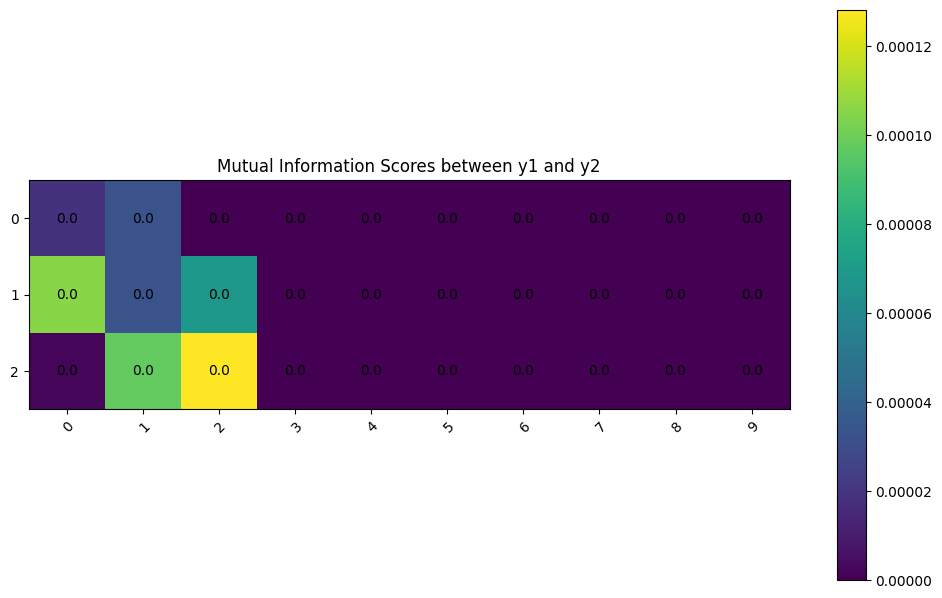

In [ ]:
from sklearn.metrics import mutual_info_score


# List unique classes in y1 and y2
classes_y1 = sorted(set(y2))
classes_y2 = sorted(set(y1))

# Compute MI for each pair of y1 and y2
mi_scores = np.zeros((len(classes_y1), len(classes_y2)))
for i, class_y1 in enumerate(classes_y1):
    for j, class_y2 in enumerate(classes_y2):
        mi_scores[i, j] = mutual_info_score([y1[k] == class_y1 for k in range(len(y1))],
                                           [y2[k] == class_y2 for k in range(len(y2))])

# Plot MI scores
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(mi_scores, cmap='viridis')

# Customize ticks
ax.set_xticks(np.arange(len(classes_y2)))
ax.set_yticks(np.arange(len(classes_y1)))
ax.set_xticklabels(classes_y2)
ax.set_yticklabels(classes_y1)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(classes_y1)):
    for j in range(len(classes_y2)):
        text = ax.text(j, i, round(mi_scores[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_title("Mutual Information Scores between y1 and y2")
fig.tight_layout()
plt.colorbar(im, ax=ax)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import entropy

# Compute entropies
entropy_y1 = entropy(np.unique(y1, return_counts=True)[1])
entropy_y2 = entropy(np.unique(y2, return_counts=True)[1])

# Create joint distribution
joint_distribution = np.histogram2d(y1, y2, bins=(np.unique(y1), np.unique(y2)))[0]
joint_entropy = entropy(joint_distribution.flatten())

# Compute Interaction Information
interaction_information = entropy_y1 + entropy_y2 - joint_entropy

print(f"Interaction Information between y1 and y2: {interaction_information}")

Interaction Information between y1 and y2: 0.22010120256918642


In [ ]:
#Get row headers
from ucimlrepo import fetch_ucirepo
cardiotocography = fetch_ucirepo(id=193)
hdr_raw = cardiotocography.data.headers
hdr = cardiotocography.data.headers[:-2]
print(hdr.shape)
print(hdr)

(21,)
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency'],
      dtype='object')


# **Exploratory Data Analysis**

In [ ]:
print(np.unique(y1))
print(np.unique(y2))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]


In [ ]:
print(X1_train.shape)
print(np.size(y1_train))
print(X1_test.shape)
print(np.size(y1_test))

print(X2_train.shape)
print(np.size(y2_train))
print(X2_test.shape)
print(np.size(y2_test))

(1488, 21)
1488
(638, 21)
638
(1488, 21)
1488
(638, 21)
638


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/A0_DS397/Computational/CTG.csv")

In [ ]:
df

LB     AC     FM     UC     DL   DS   DP  ASTV  MSTV  ALTV  ...  Max  \
0     120  0.000  0.000  0.000  0.000  0.0  0.0    73   0.5    43  ...  126   
1     132  0.006  0.000  0.006  0.003  0.0  0.0    17   2.1     0  ...  198   
2     133  0.003  0.000  0.008  0.003  0.0  0.0    16   2.1     0  ...  198   
3     134  0.003  0.000  0.008  0.003  0.0  0.0    16   2.4     0  ...  170   
4     132  0.007  0.000  0.008  0.000  0.0  0.0    16   2.4     0  ...  170   
...   ...    ...    ...    ...    ...  ...  ...   ...   ...   ...  ...  ...   
2121  140  0.000  0.000  0.007  0.000  0.0  0.0    79   0.2    25  ...  177   
2122  140  0.001  0.000  0.007  0.000  0.0  0.0    78   0.4    22  ...  169   
2123  140  0.001  0.000  0.007  0.000  0.0  0.0    79   0.4    20  ...  170   
2124  140  0.001  0.000  0.006  0.000  0.0  0.0    78   0.4    27  ...  169   
2125  142  0.002  0.002  0.008  0.000  0.0  0.0    74   0.4    36  ...  159   

      Nmax  Nzeros  Mode  Mean  Median  Variance  Tendency  CLASS  NSP  
0        2       0   120   137     121        73         1      9    2  
1        6       1   141   136     140        12         0      6    1  
2        5       1   141   135     138        13         0      6    1  
3       11       0   137   134     137        13         1      6    1  
4        9       0   137   136     138        11         1      2    1  
...    ...     ...   ...   ...     ...       ...       ...    ...  ...  
2121     4       0   153   150     152         2         0      5    2  
2122     6       0   152   148     151         3         1      5    2  
2123     5       0   153   148     152         4         1      5    2  
2124     6       0   152   147     151         4         1      5    2  
2125     2       1   145   143     145         1         0      1    1  

[2126 rows x 23 columns]

In [ ]:
print(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')


In [ ]:
df.shape

(2126, 23)

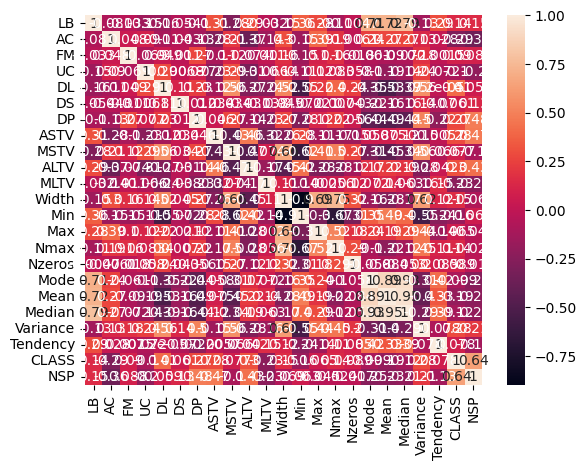

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot= True)
plt.rcParams['figure.figsize']= (14,10)
plt.show()

<ipython-input-24-720e5b4acc68>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['ASTV'], order=order, palette=palette)


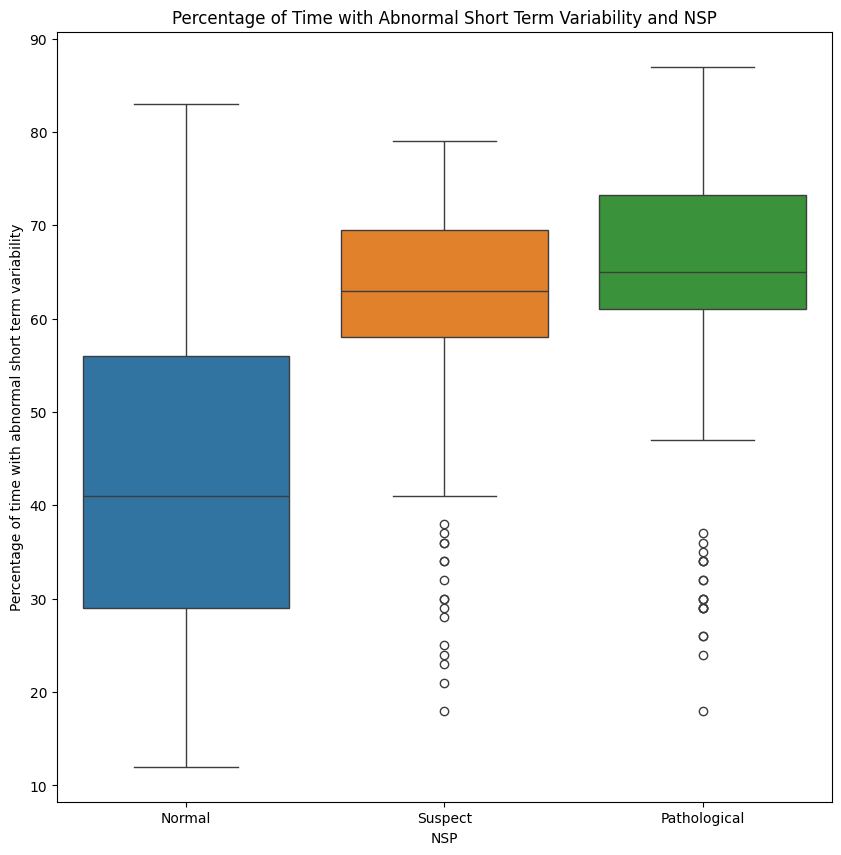

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}

# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['ASTV'], order=order, palette=palette)

# # Add a horizontal line at y=57
# plt.axhline(y=57, color='y', linestyle='-', label='y = 57')

# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Percentage of time with abnormal short term variability')
plt.title('Percentage of Time with Abnormal Short Term Variability and NSP')

# Show the plot
plt.show()

<ipython-input-23-935fc2330db6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['UC'], order=order, palette=palette)


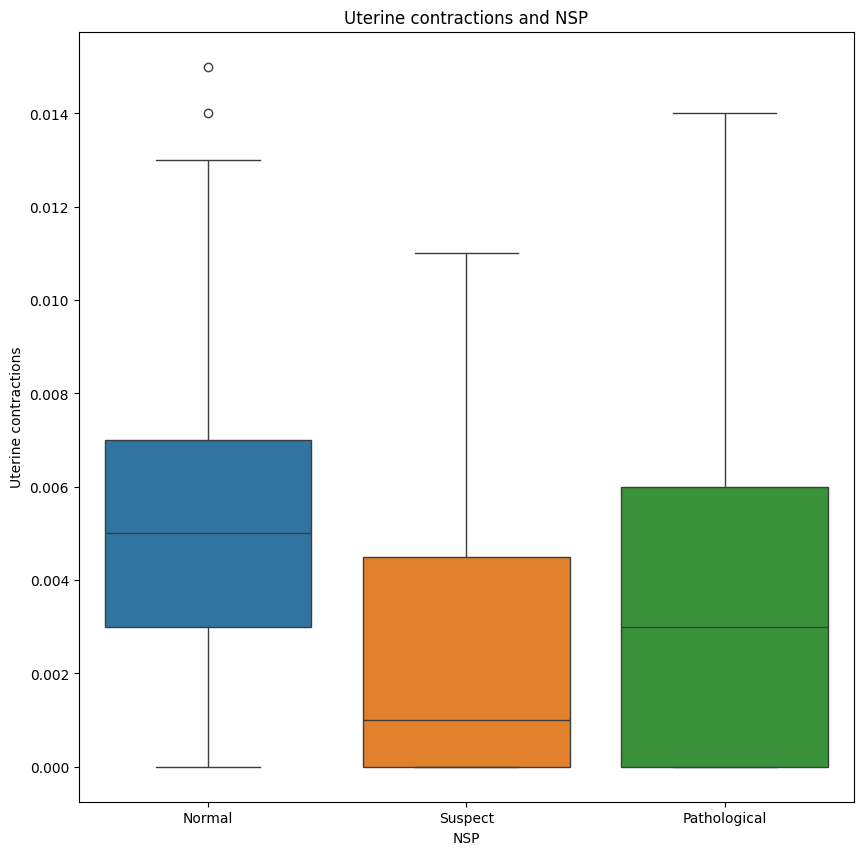

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}

# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['UC'], order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Uterine contractions')
plt.title('Uterine contractions and NSP')

# Show the plot
plt.show()


<ipython-input-22-6211264c59dd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['ALTV'], order=order, palette=palette)


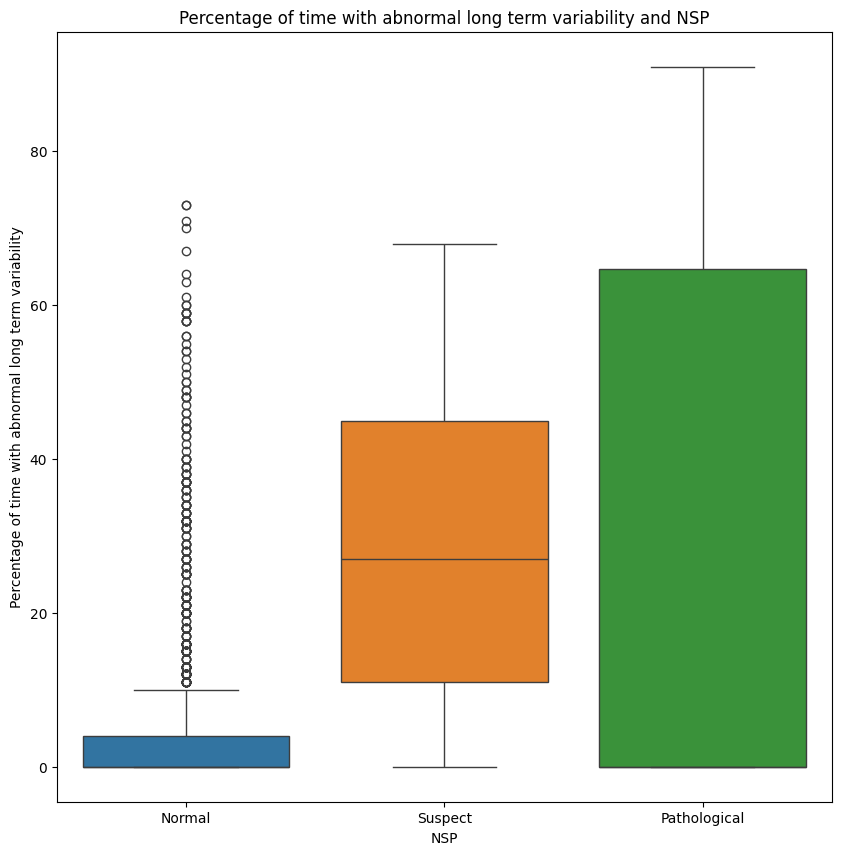

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['ALTV'], order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Percentage of time with abnormal long term variability')
plt.title('Percentage of time with abnormal long term variability and NSP')

# Show the plot
plt.show()

<ipython-input-20-06b1412cc20a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['MSTV'], order=order, palette=palette)


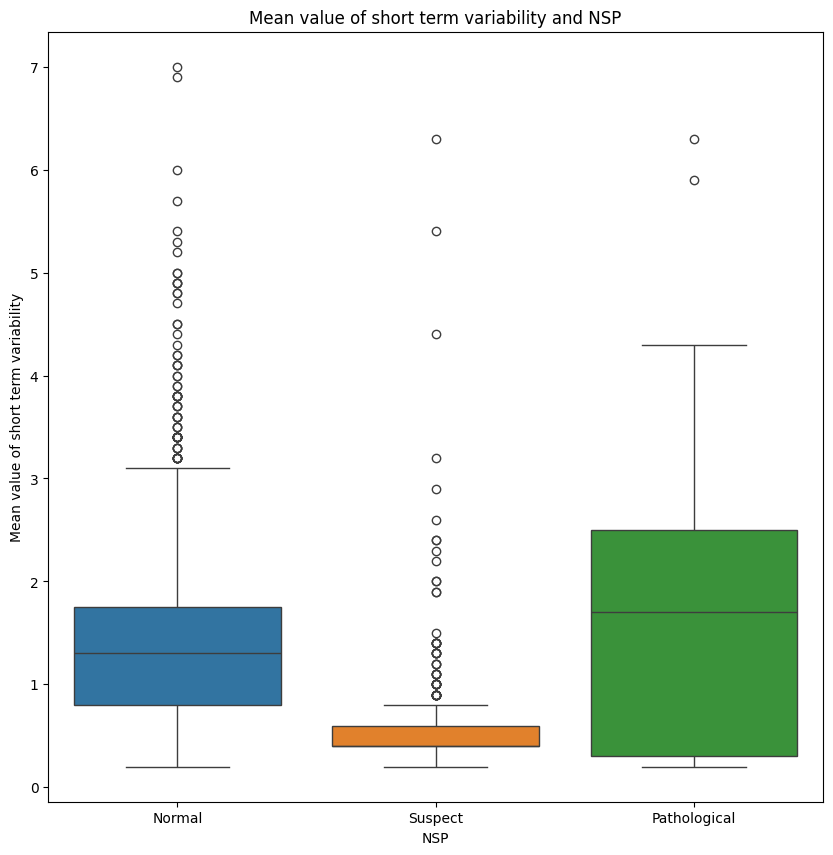

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['MSTV'], order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Mean value of short term variability')
plt.title('Mean value of short term variability and NSP')

# Show the plot
plt.show()

<ipython-input-16-52ca34633294>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['AC'],order=order, palette=palette)


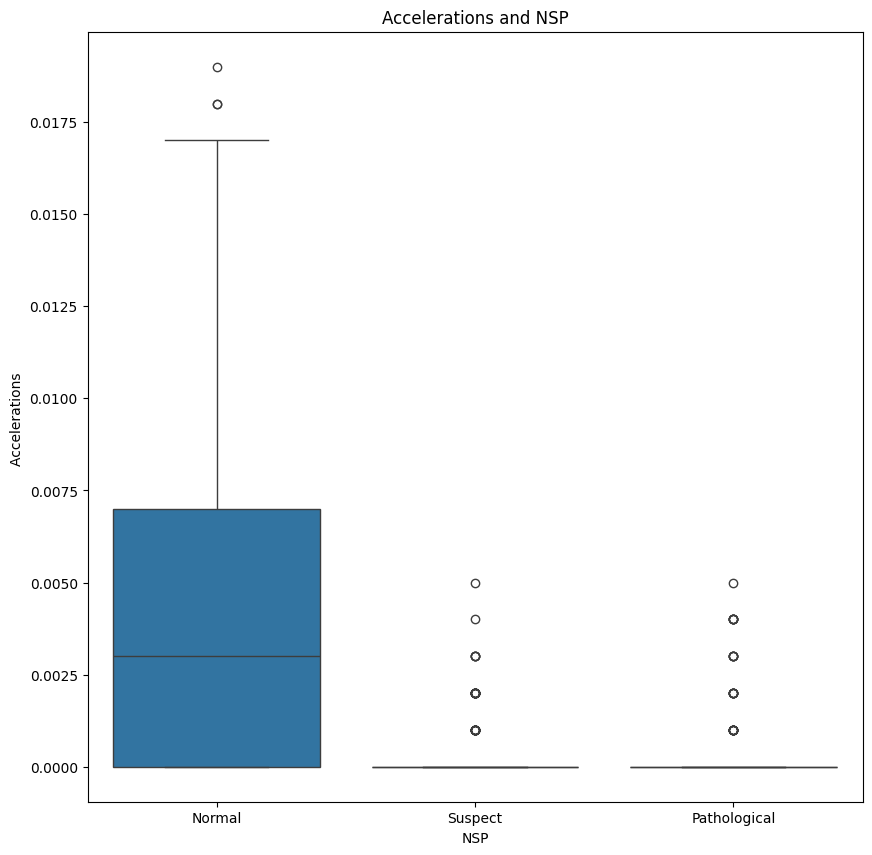

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['AC'],order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Accelerations ')
plt.title('Accelerations and NSP')

# Show the plot
plt.show()

<ipython-input-19-d49788238354>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['FM'],order=order, palette=palette)


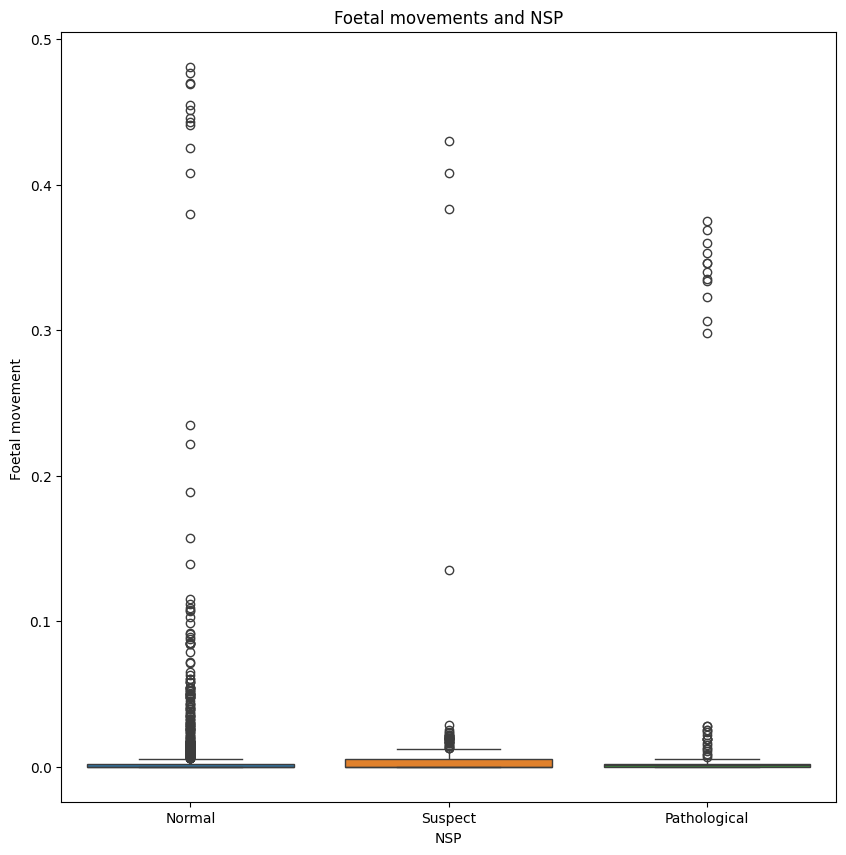

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['FM'],order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Foetal movement ')
plt.title('Foetal movements and NSP')

# Show the plot
plt.show()

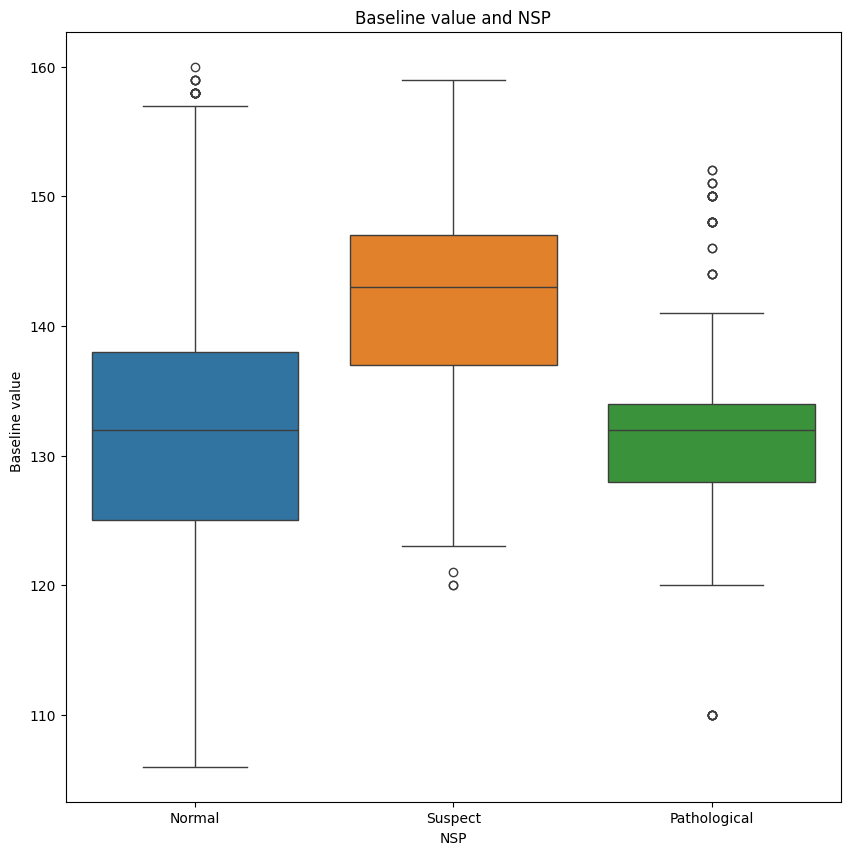

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['LB'],order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Baseline value  ')
plt.title('Baseline value and NSP')

# Show the plot
plt.show()

<ipython-input-15-ca49abd2cf5f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['LB'], order=order, palette=palette)


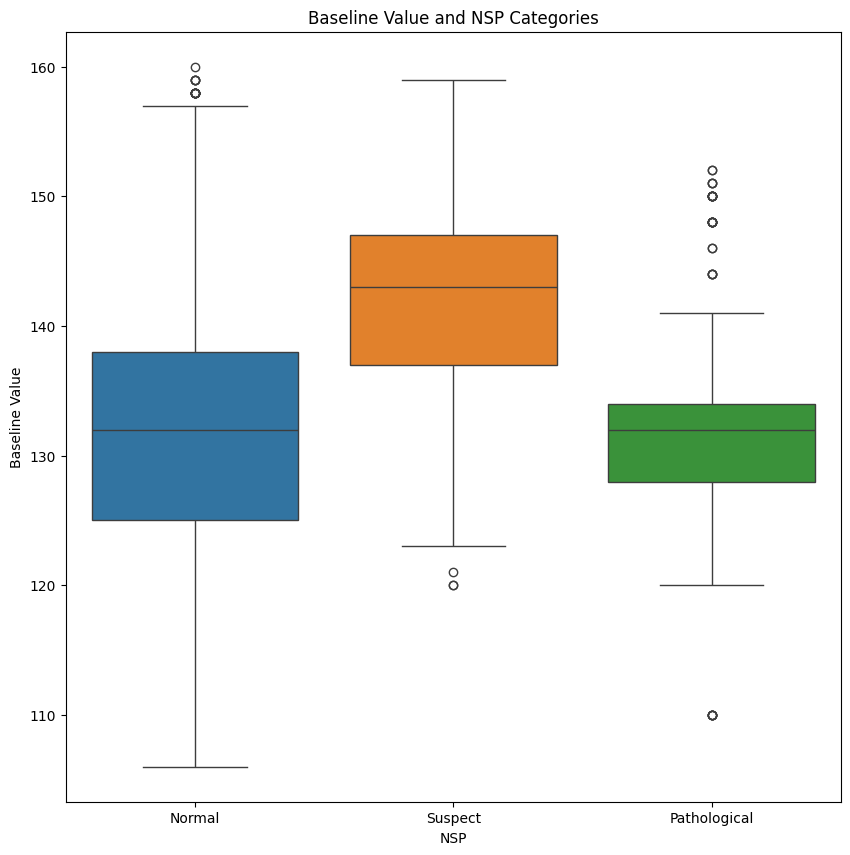

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}

# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['LB'], order=order, palette=palette)

# Set axis labels and plot title
plt.xlabel('NSP')
plt.ylabel('Baseline Value')
plt.title('Baseline Value and NSP Categories')

# Display the plot
plt.show()


<ipython-input-18-ef6efaa2d328>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['DP'], order=order, palette=palette)


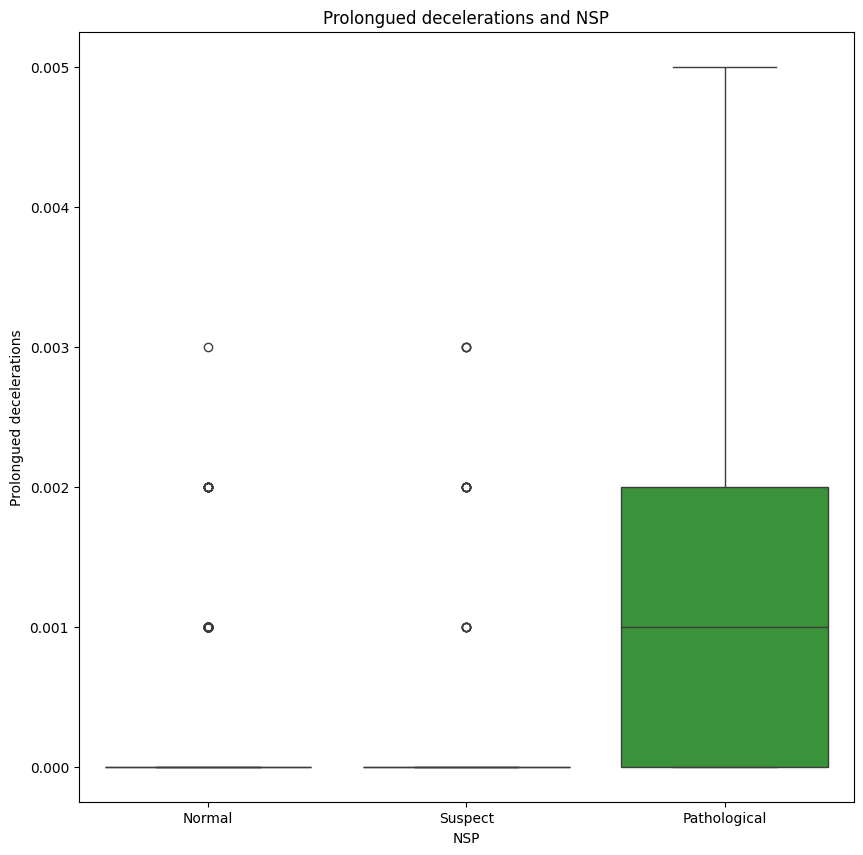

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['DP'], order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Prolongued decelerations')
plt.title('Prolongued decelerations and NSP')

# Show the plot
plt.show()

<ipython-input-17-bcad7a39ac33>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NSP_mapped'], y=df['Mean'],order=order, palette=palette)


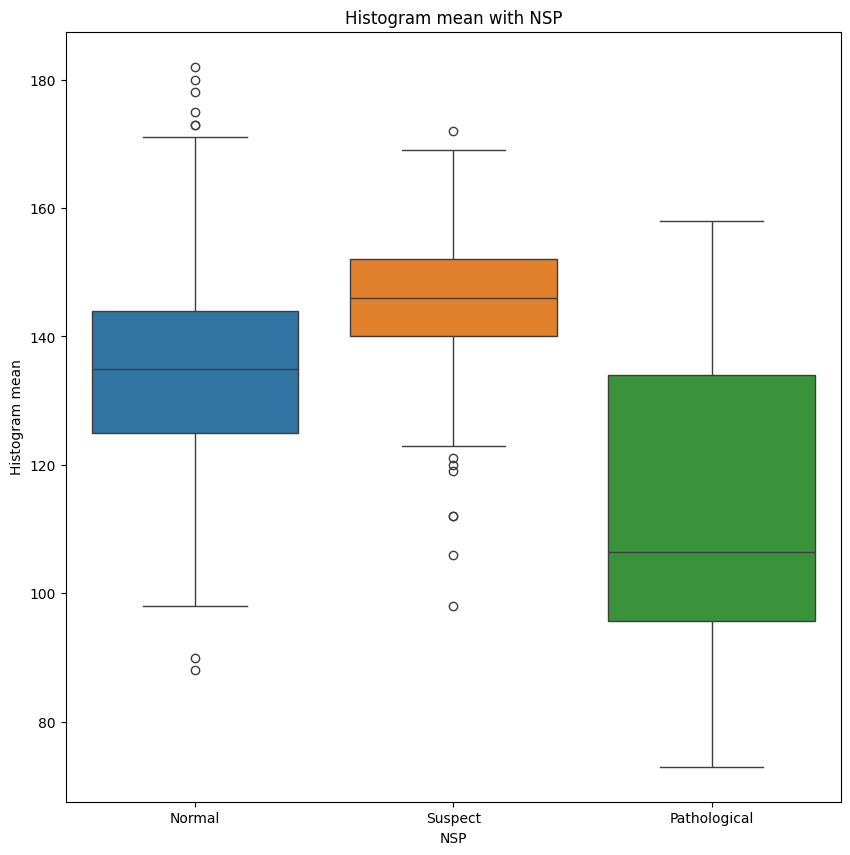

In [ ]:
# Define a dictionary to map original values to custom labels
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Map the values in the 'NSP' column to the custom labels
df['NSP_mapped'] = df['NSP'].map(label_map)

# Define the order and colors for the boxplot
order = ['Normal', 'Suspect', 'Pathological']
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}


# Create the box plot with the mapped values
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['NSP_mapped'], y=df['Mean'],order=order, palette=palette)



# Set y-axis label and title
plt.xlabel('NSP')
plt.ylabel('Histogram mean')
plt.title('Histogram mean with NSP')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Baseline Value with classes')

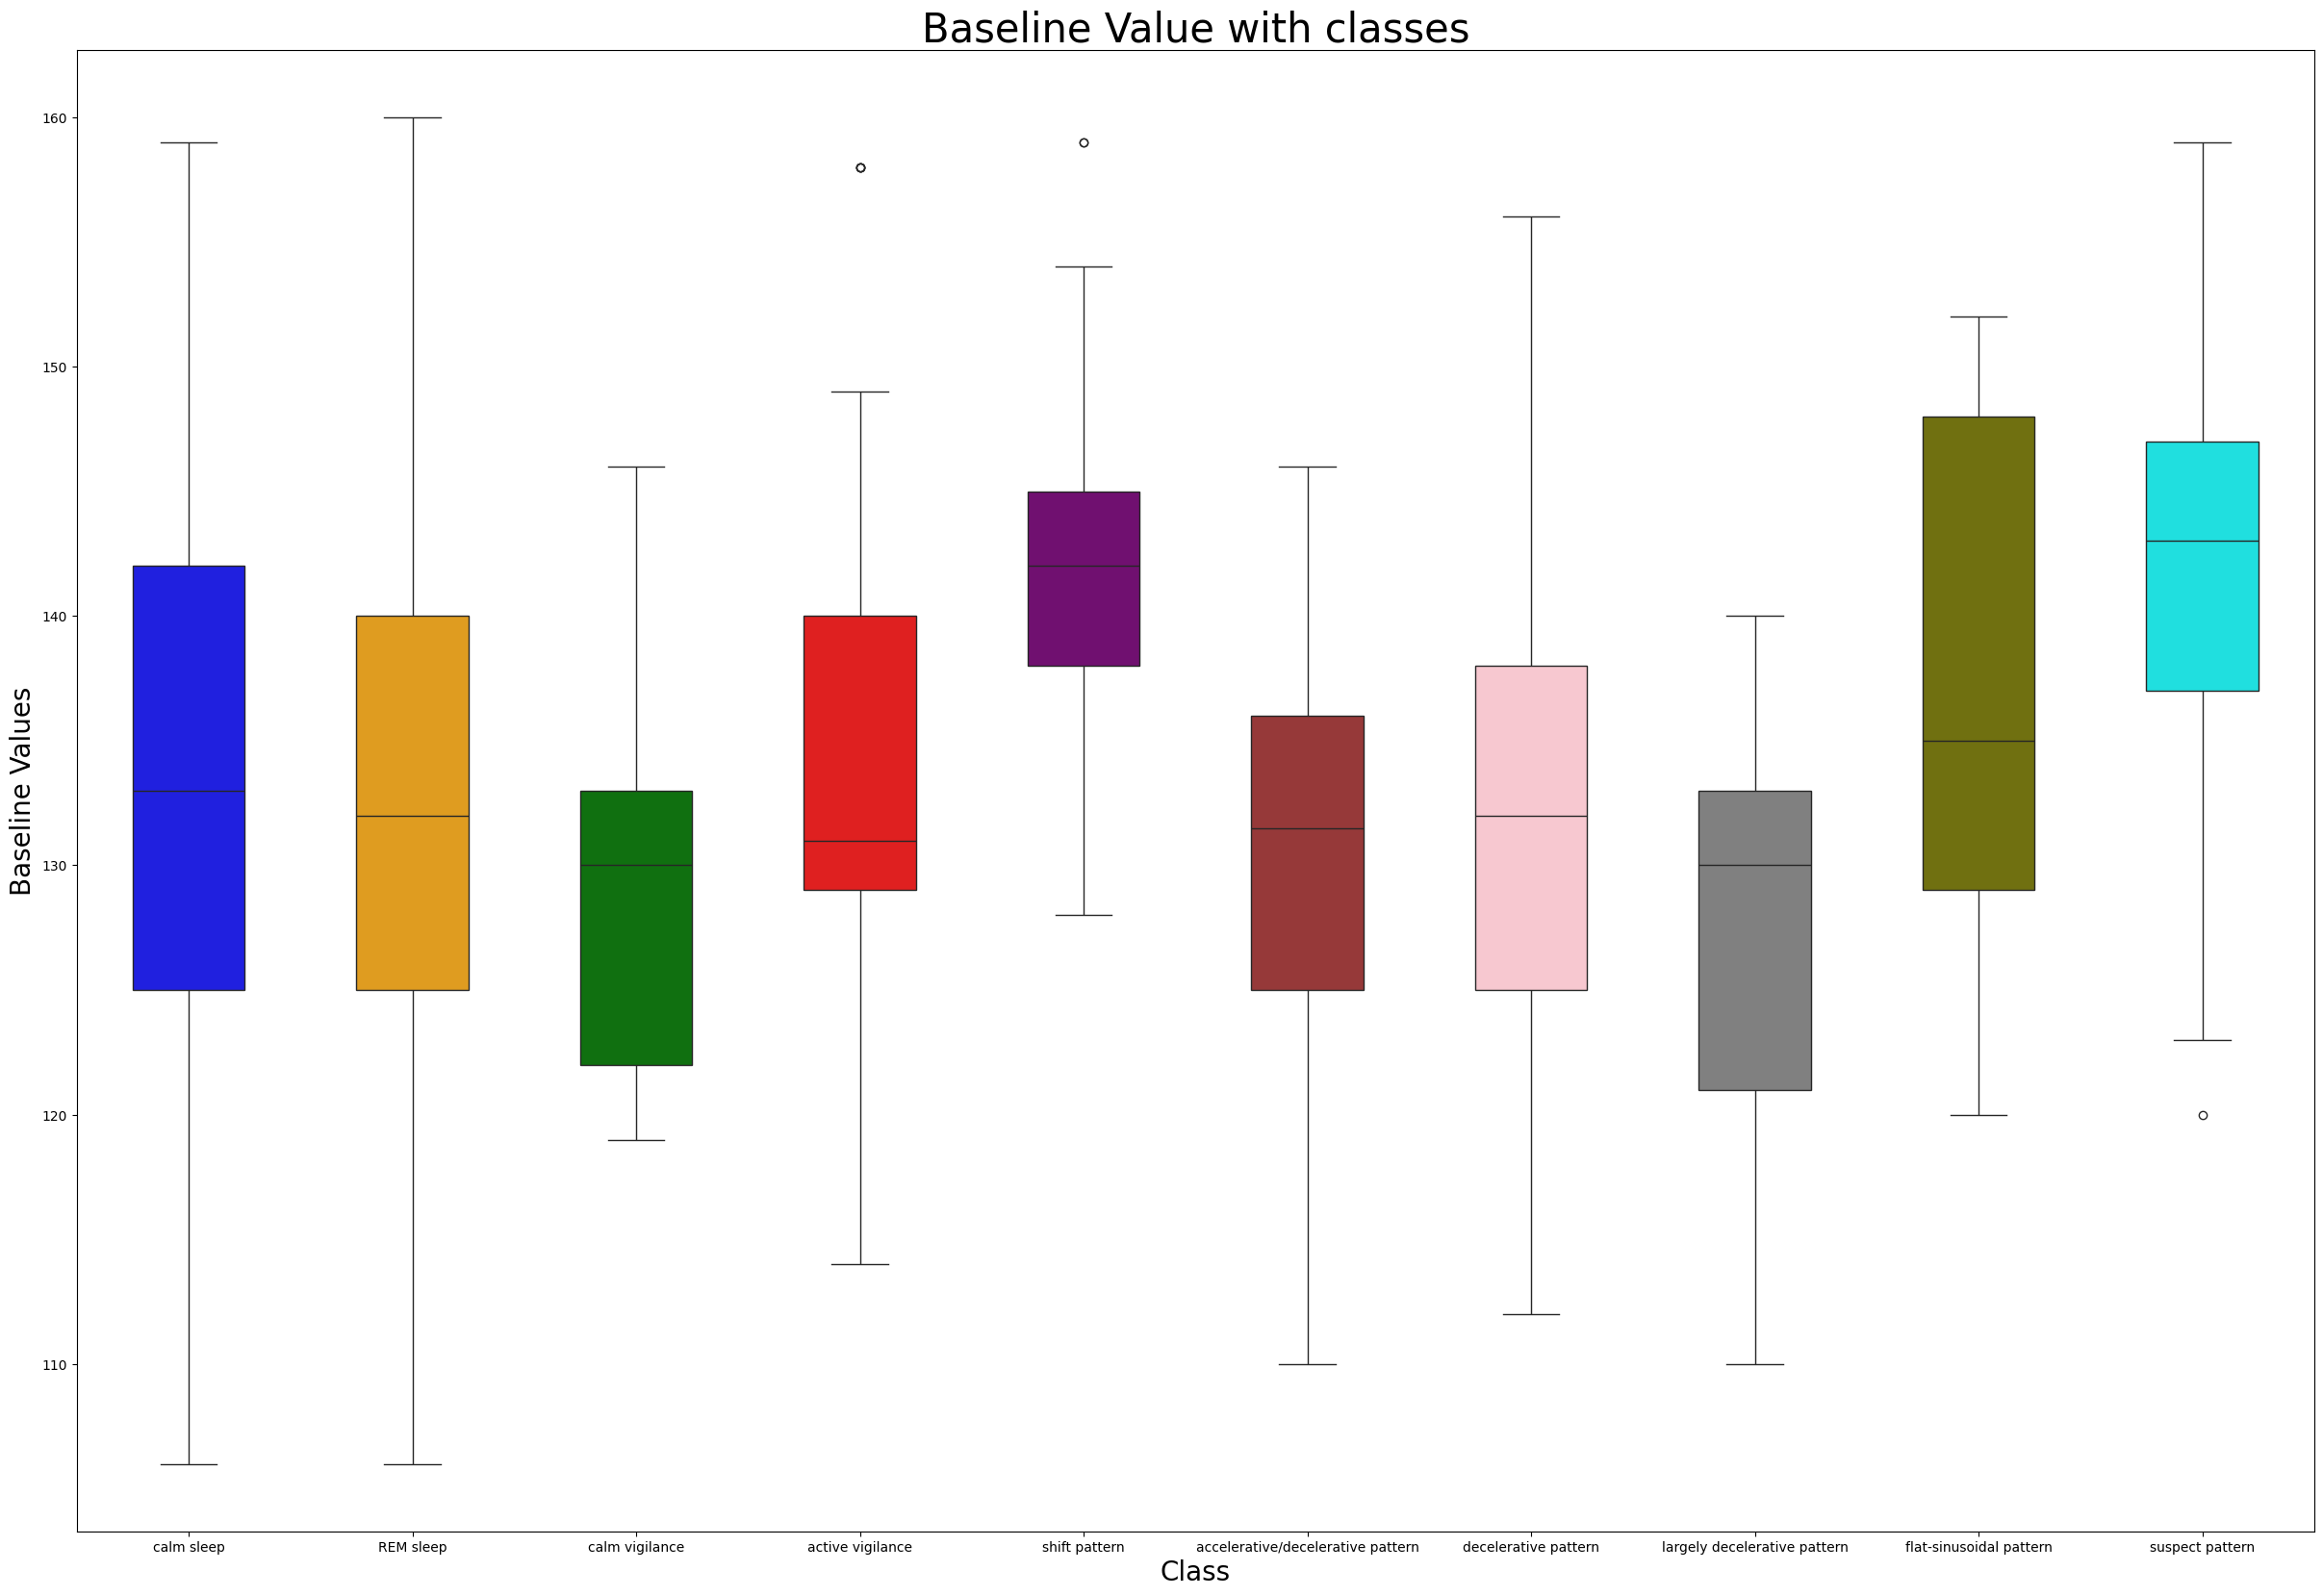

In [ ]:
label_map_class = {1: 'calm sleep', 2: 'REM sleep', 3: 'calm vigilance', 4:'active vigilance', 5:'shift pattern',6:'accelerative/decelerative pattern' ,7:'decelerative pattern',8:'largely decelerative pattern', 9:'flat-sinusoidal pattern', 10:'suspect pattern'}

# Map the values in the 'NSP' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

order = [
    'calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
    'shift pattern', 'accelerative/decelerative pattern', 'decelerative pattern',
    'largely decelerative pattern', 'flat-sinusoidal pattern', 'suspect pattern'
]
palette = {
    'calm sleep': 'blue',
    'REM sleep': 'orange',
    'calm vigilance': 'green',
    'active vigilance': 'red',
    'shift pattern': 'purple',
    'accelerative/decelerative pattern': 'brown',
    'decelerative pattern': 'pink',
    'largely decelerative pattern': 'gray',
    'flat-sinusoidal pattern': 'olive',
    'suspect pattern': 'cyan'
}

# Create the box plot with the mapped values
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['CLASS_mapped'], y=df['LB'],order=order, palette=palette, width= 0.5)

plt.xlabel('Class',fontsize= 20)
plt.ylabel('Baseline Values',fontsize= 20)
plt.title('Baseline Value with classes',fontsize= 30)


Text(0.5, 1.0, 'Acceleration with classes')

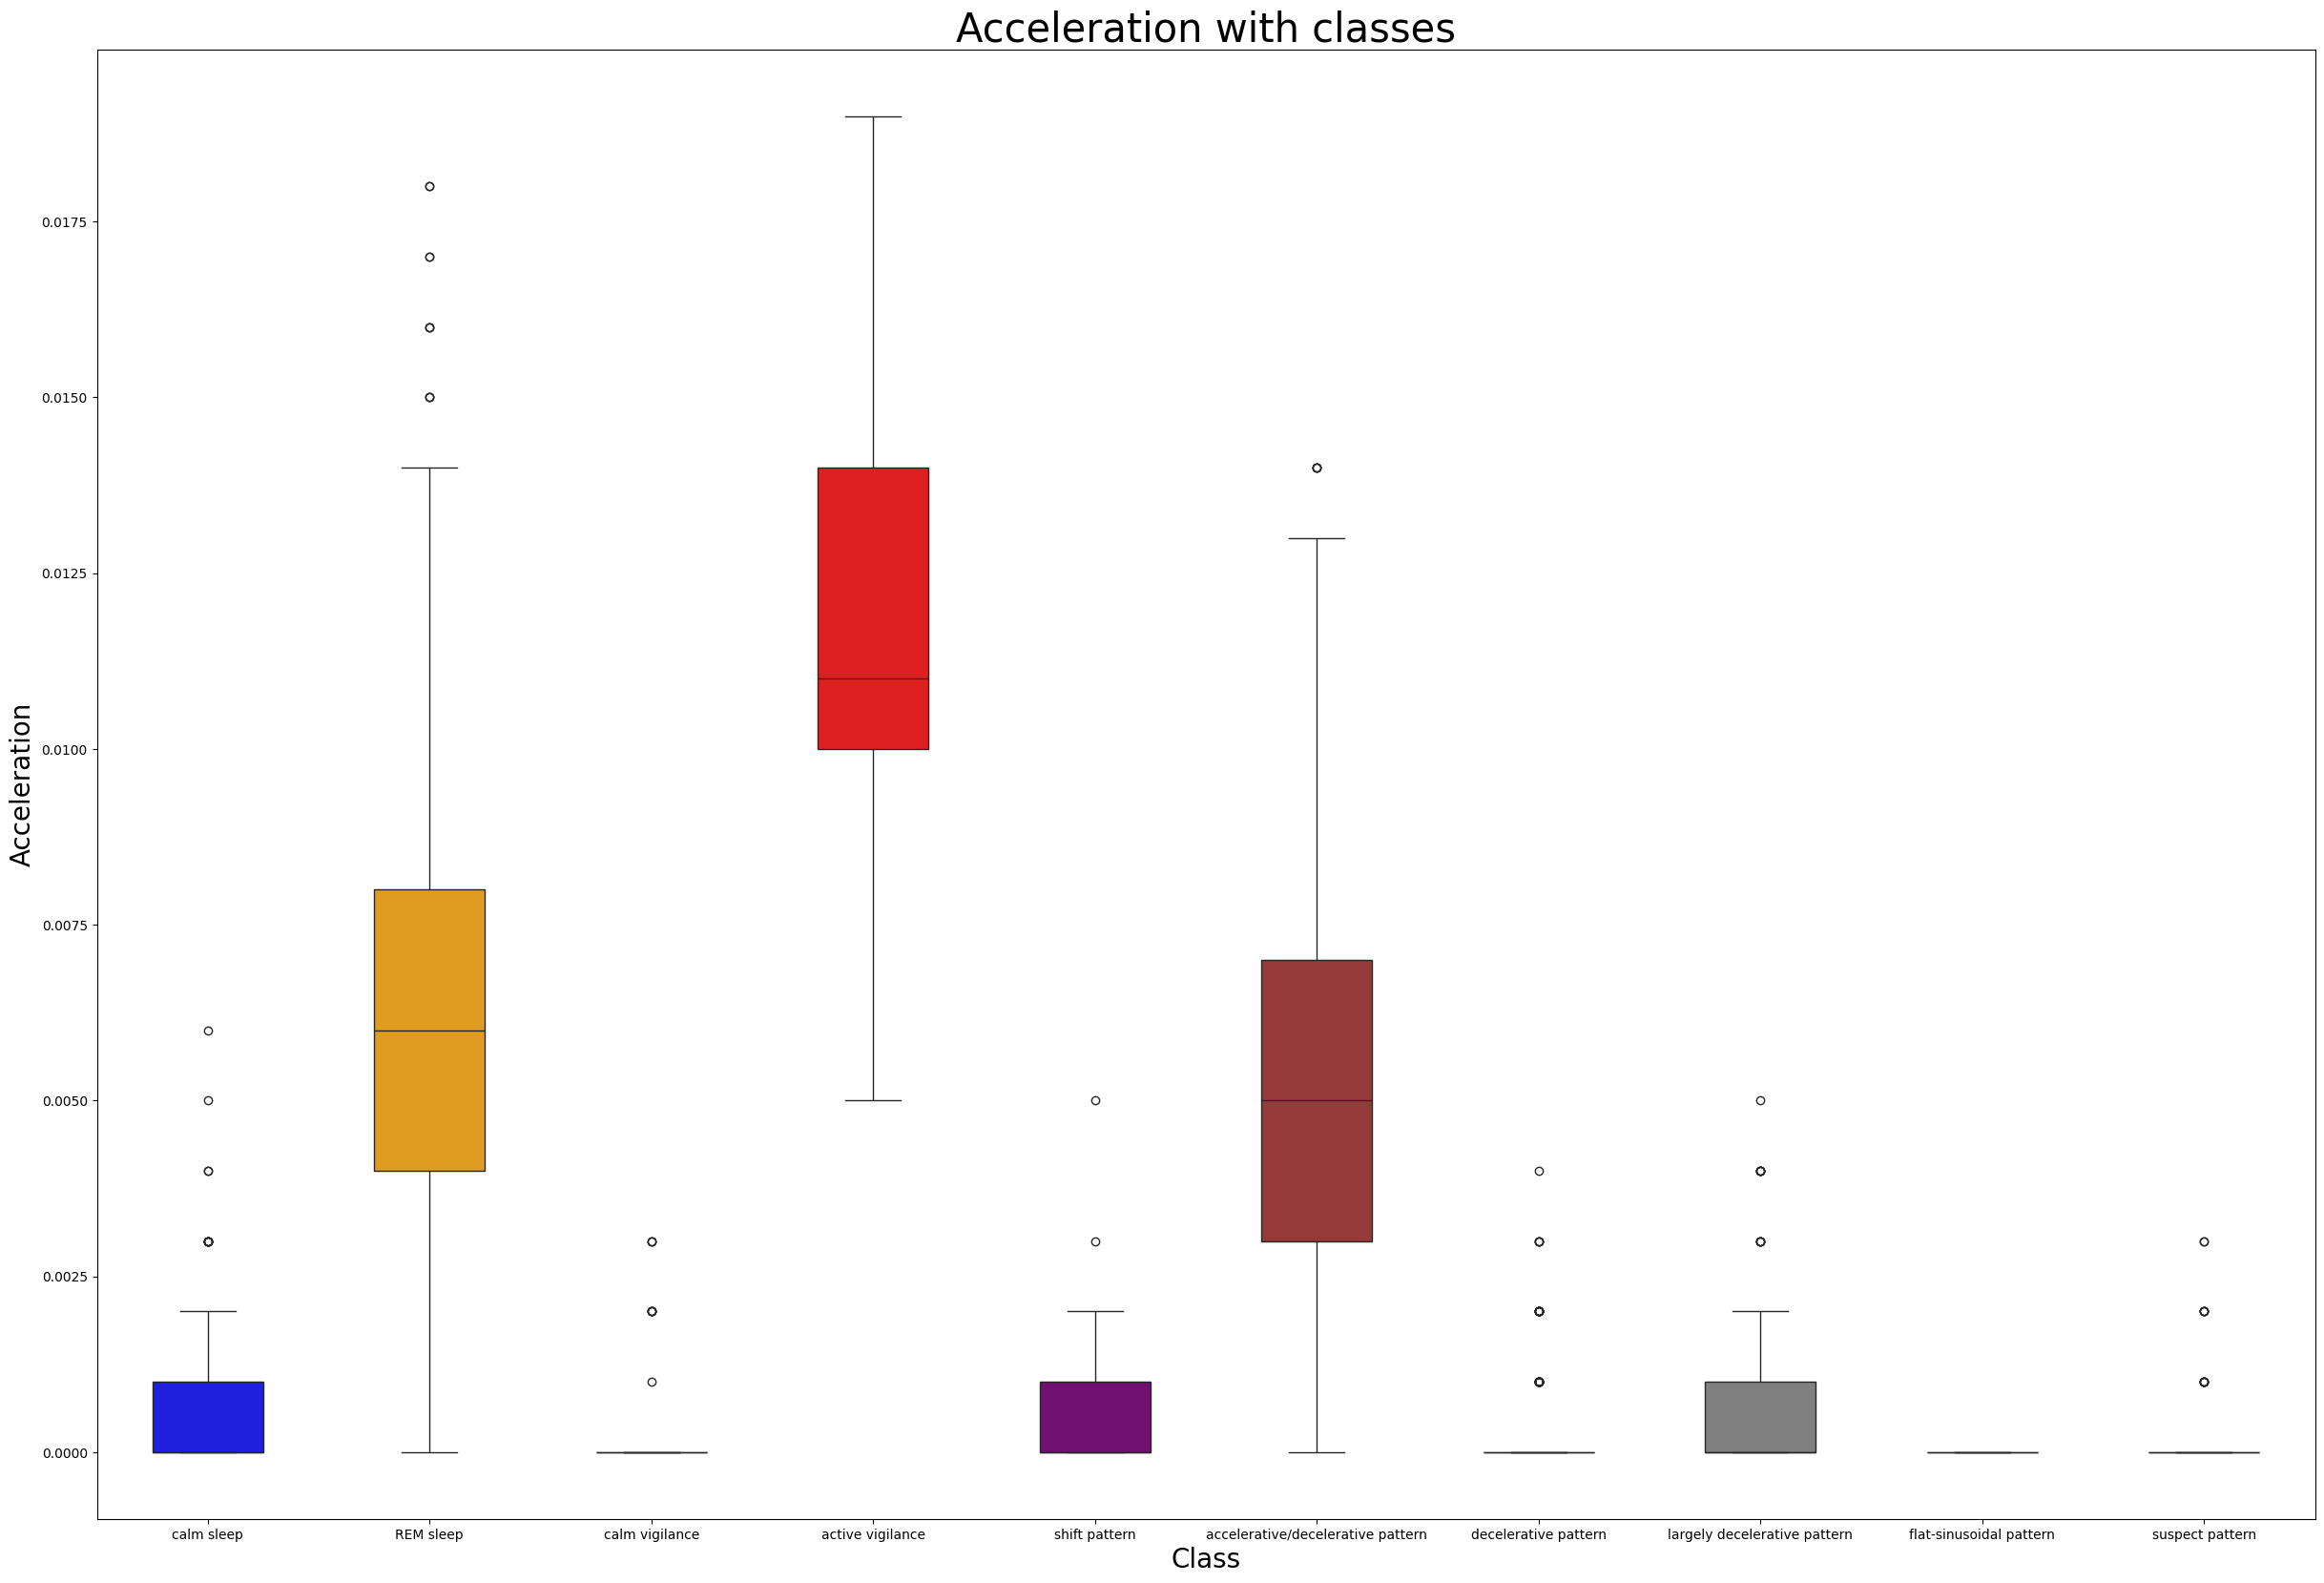

In [ ]:
label_map_class = {1: 'calm sleep', 2: 'REM sleep', 3: 'calm vigilance', 4:'active vigilance', 5:'shift pattern',6:'accelerative/decelerative pattern' ,7:'decelerative pattern',8:'largely decelerative pattern', 9:'flat-sinusoidal pattern', 10:'suspect pattern'}

# Map the values in the 'NSP' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

order = [
    'calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
    'shift pattern', 'accelerative/decelerative pattern', 'decelerative pattern',
    'largely decelerative pattern', 'flat-sinusoidal pattern', 'suspect pattern'
]
palette = {
    'calm sleep': 'blue',
    'REM sleep': 'orange',
    'calm vigilance': 'green',
    'active vigilance': 'red',
    'shift pattern': 'purple',
    'accelerative/decelerative pattern': 'brown',
    'decelerative pattern': 'pink',
    'largely decelerative pattern': 'gray',
    'flat-sinusoidal pattern': 'olive',
    'suspect pattern': 'cyan'
}

# Create the box plot with the mapped values
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['CLASS_mapped'], y=df['AC'], order=order, palette=palette, width=0.5)

plt.xlabel('Class',fontsize= 20)
plt.ylabel('Acceleration',fontsize= 20)
plt.title('Acceleration with classes', fontsize= 30)


Text(0.5, 1.0, 'Percentage of time with abnormal short term variability with classes')

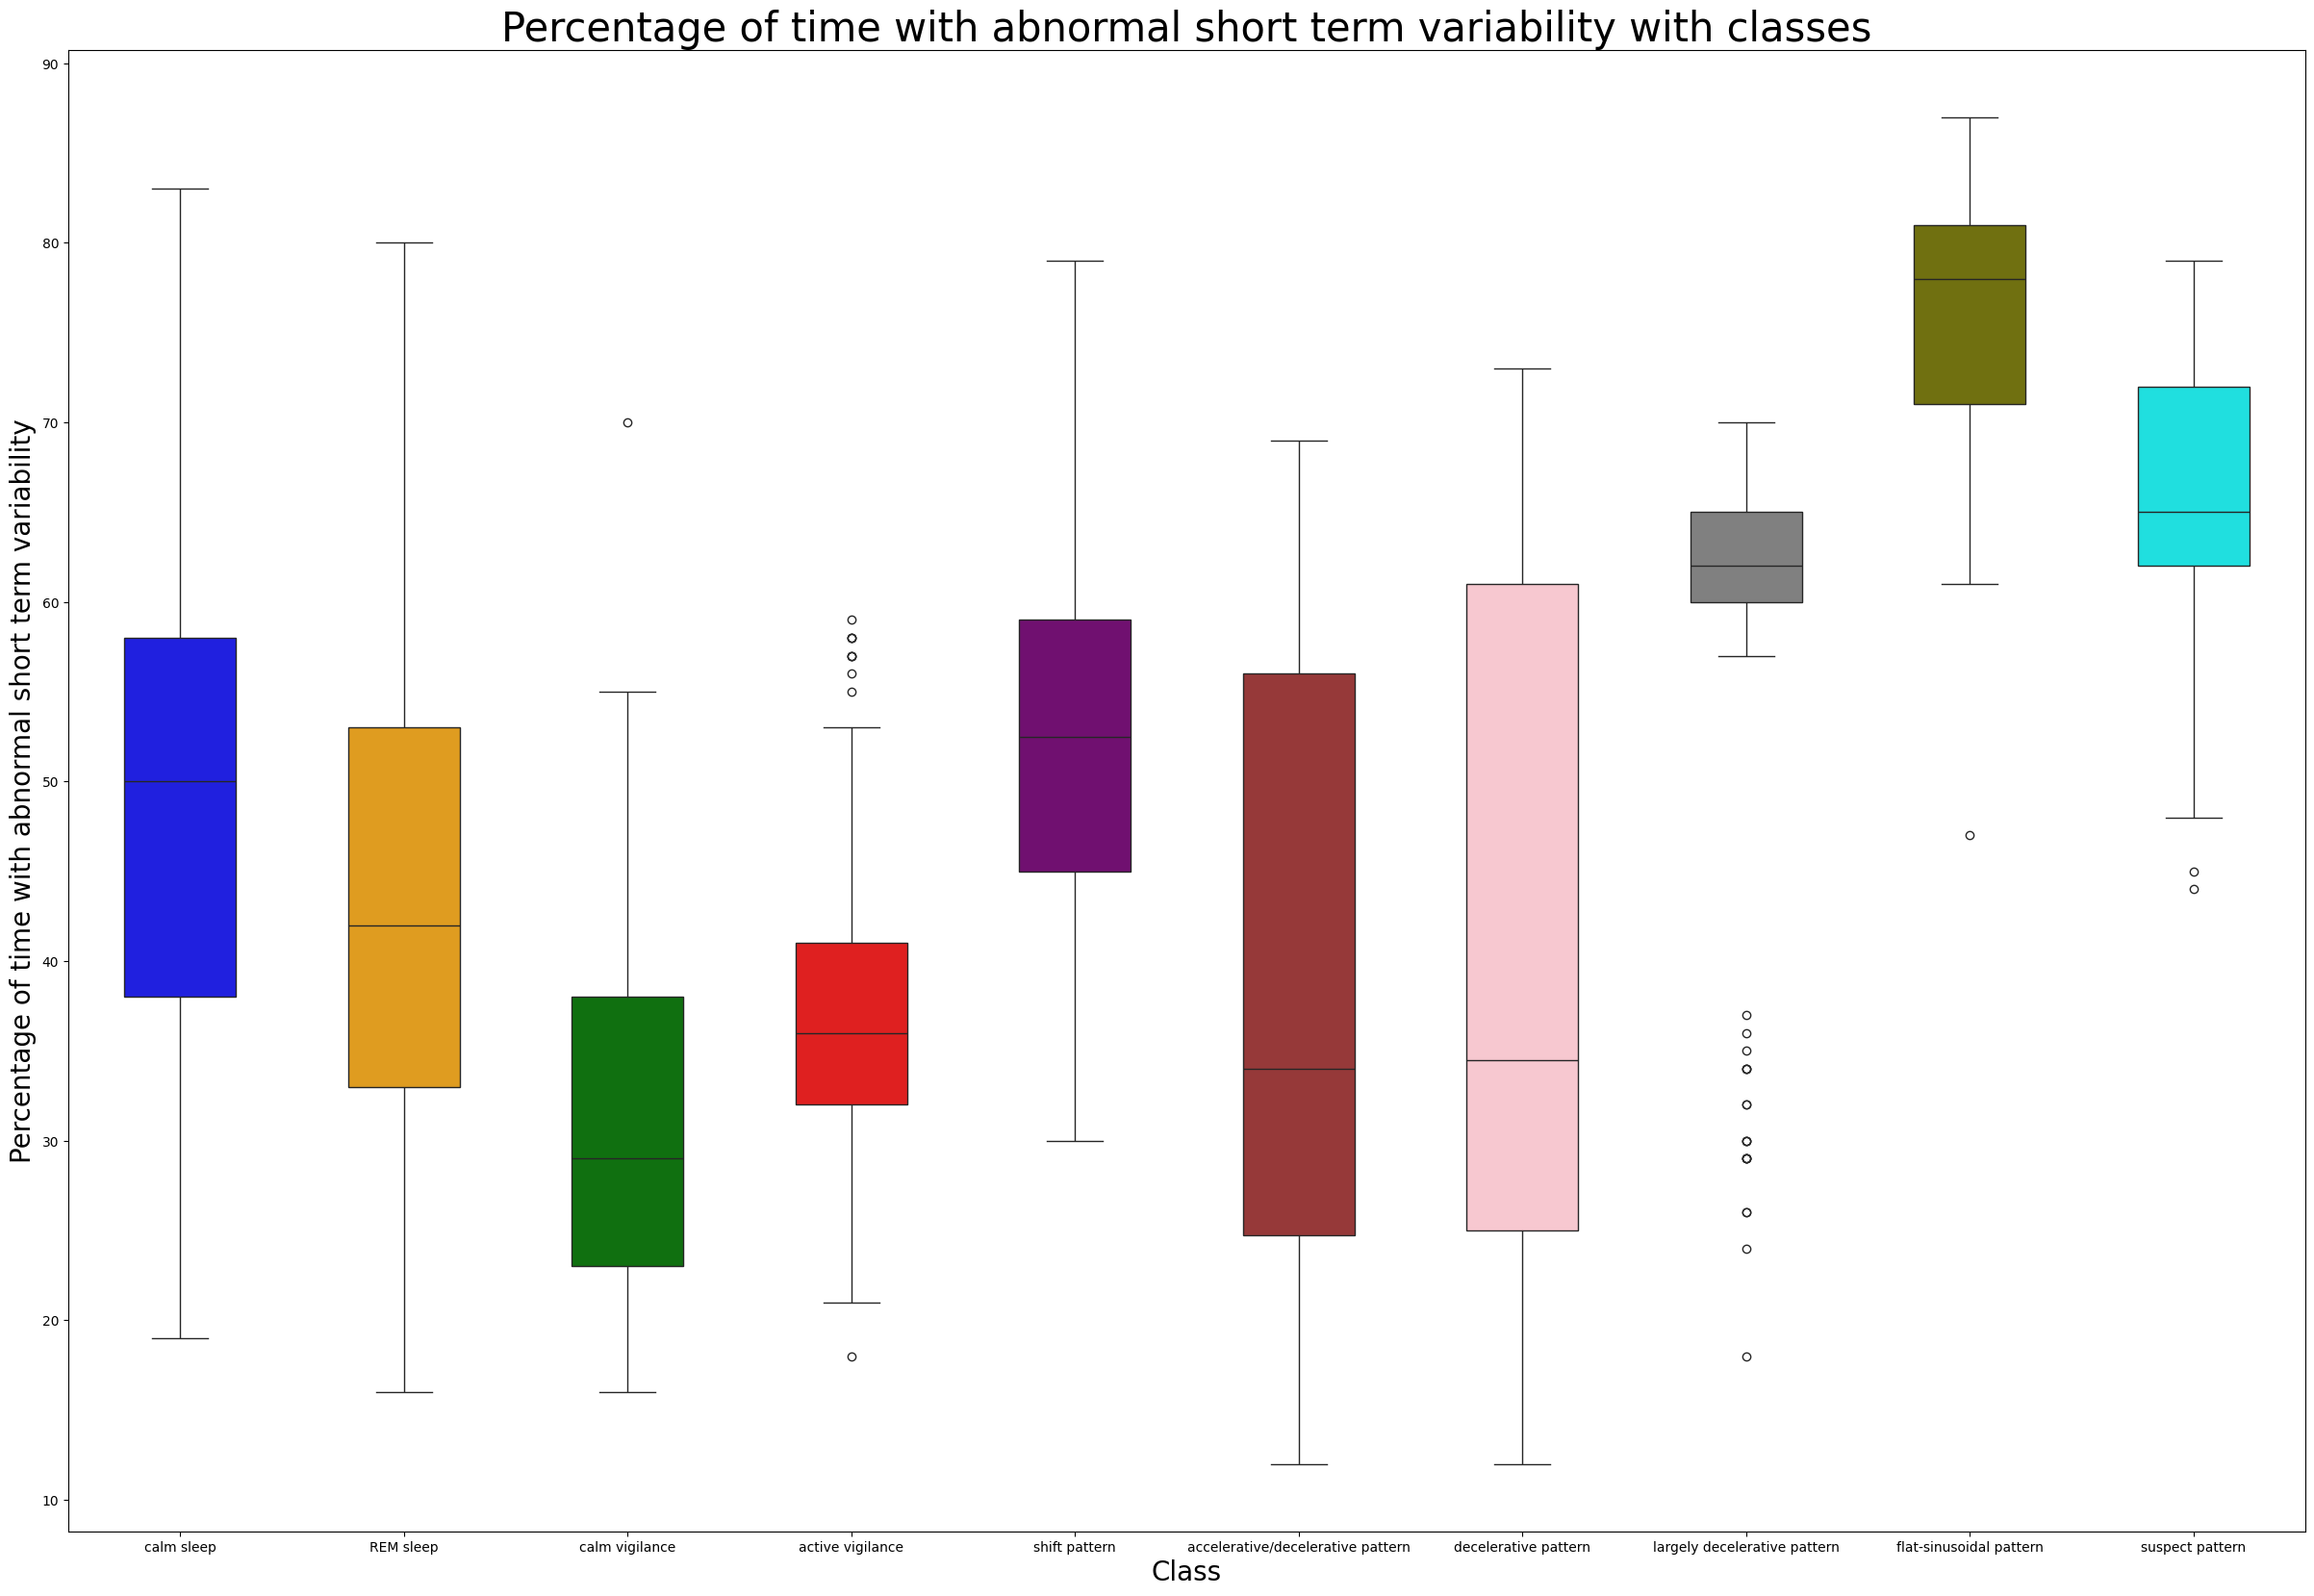

In [ ]:
label_map_class = {1: 'calm sleep', 2: 'REM sleep', 3: 'calm vigilance', 4:'active vigilance', 5:'shift pattern',6:'accelerative/decelerative pattern' ,7:'decelerative pattern',8:'largely decelerative pattern', 9:'flat-sinusoidal pattern', 10:'suspect pattern'}

# Map the values in the 'NSP' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

order = [
    'calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
    'shift pattern', 'accelerative/decelerative pattern', 'decelerative pattern',
    'largely decelerative pattern', 'flat-sinusoidal pattern', 'suspect pattern'
]
palette = {
    'calm sleep': 'blue',
    'REM sleep': 'orange',
    'calm vigilance': 'green',
    'active vigilance': 'red',
    'shift pattern': 'purple',
    'accelerative/decelerative pattern': 'brown',
    'decelerative pattern': 'pink',
    'largely decelerative pattern': 'gray',
    'flat-sinusoidal pattern': 'olive',
    'suspect pattern': 'cyan'
}


# Create the box plot with the mapped values
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['CLASS_mapped'], y=df['ASTV'],order=order, palette=palette, width=0.5)

plt.xlabel('Class',fontsize= 20)
plt.ylabel('Percentage of time with abnormal short term variability',fontsize= 20)
plt.title('Percentage of time with abnormal short term variability with classes',fontsize= 30)

Text(0.5, 1.0, 'Percentage of time with abnormal long term variability with classes')

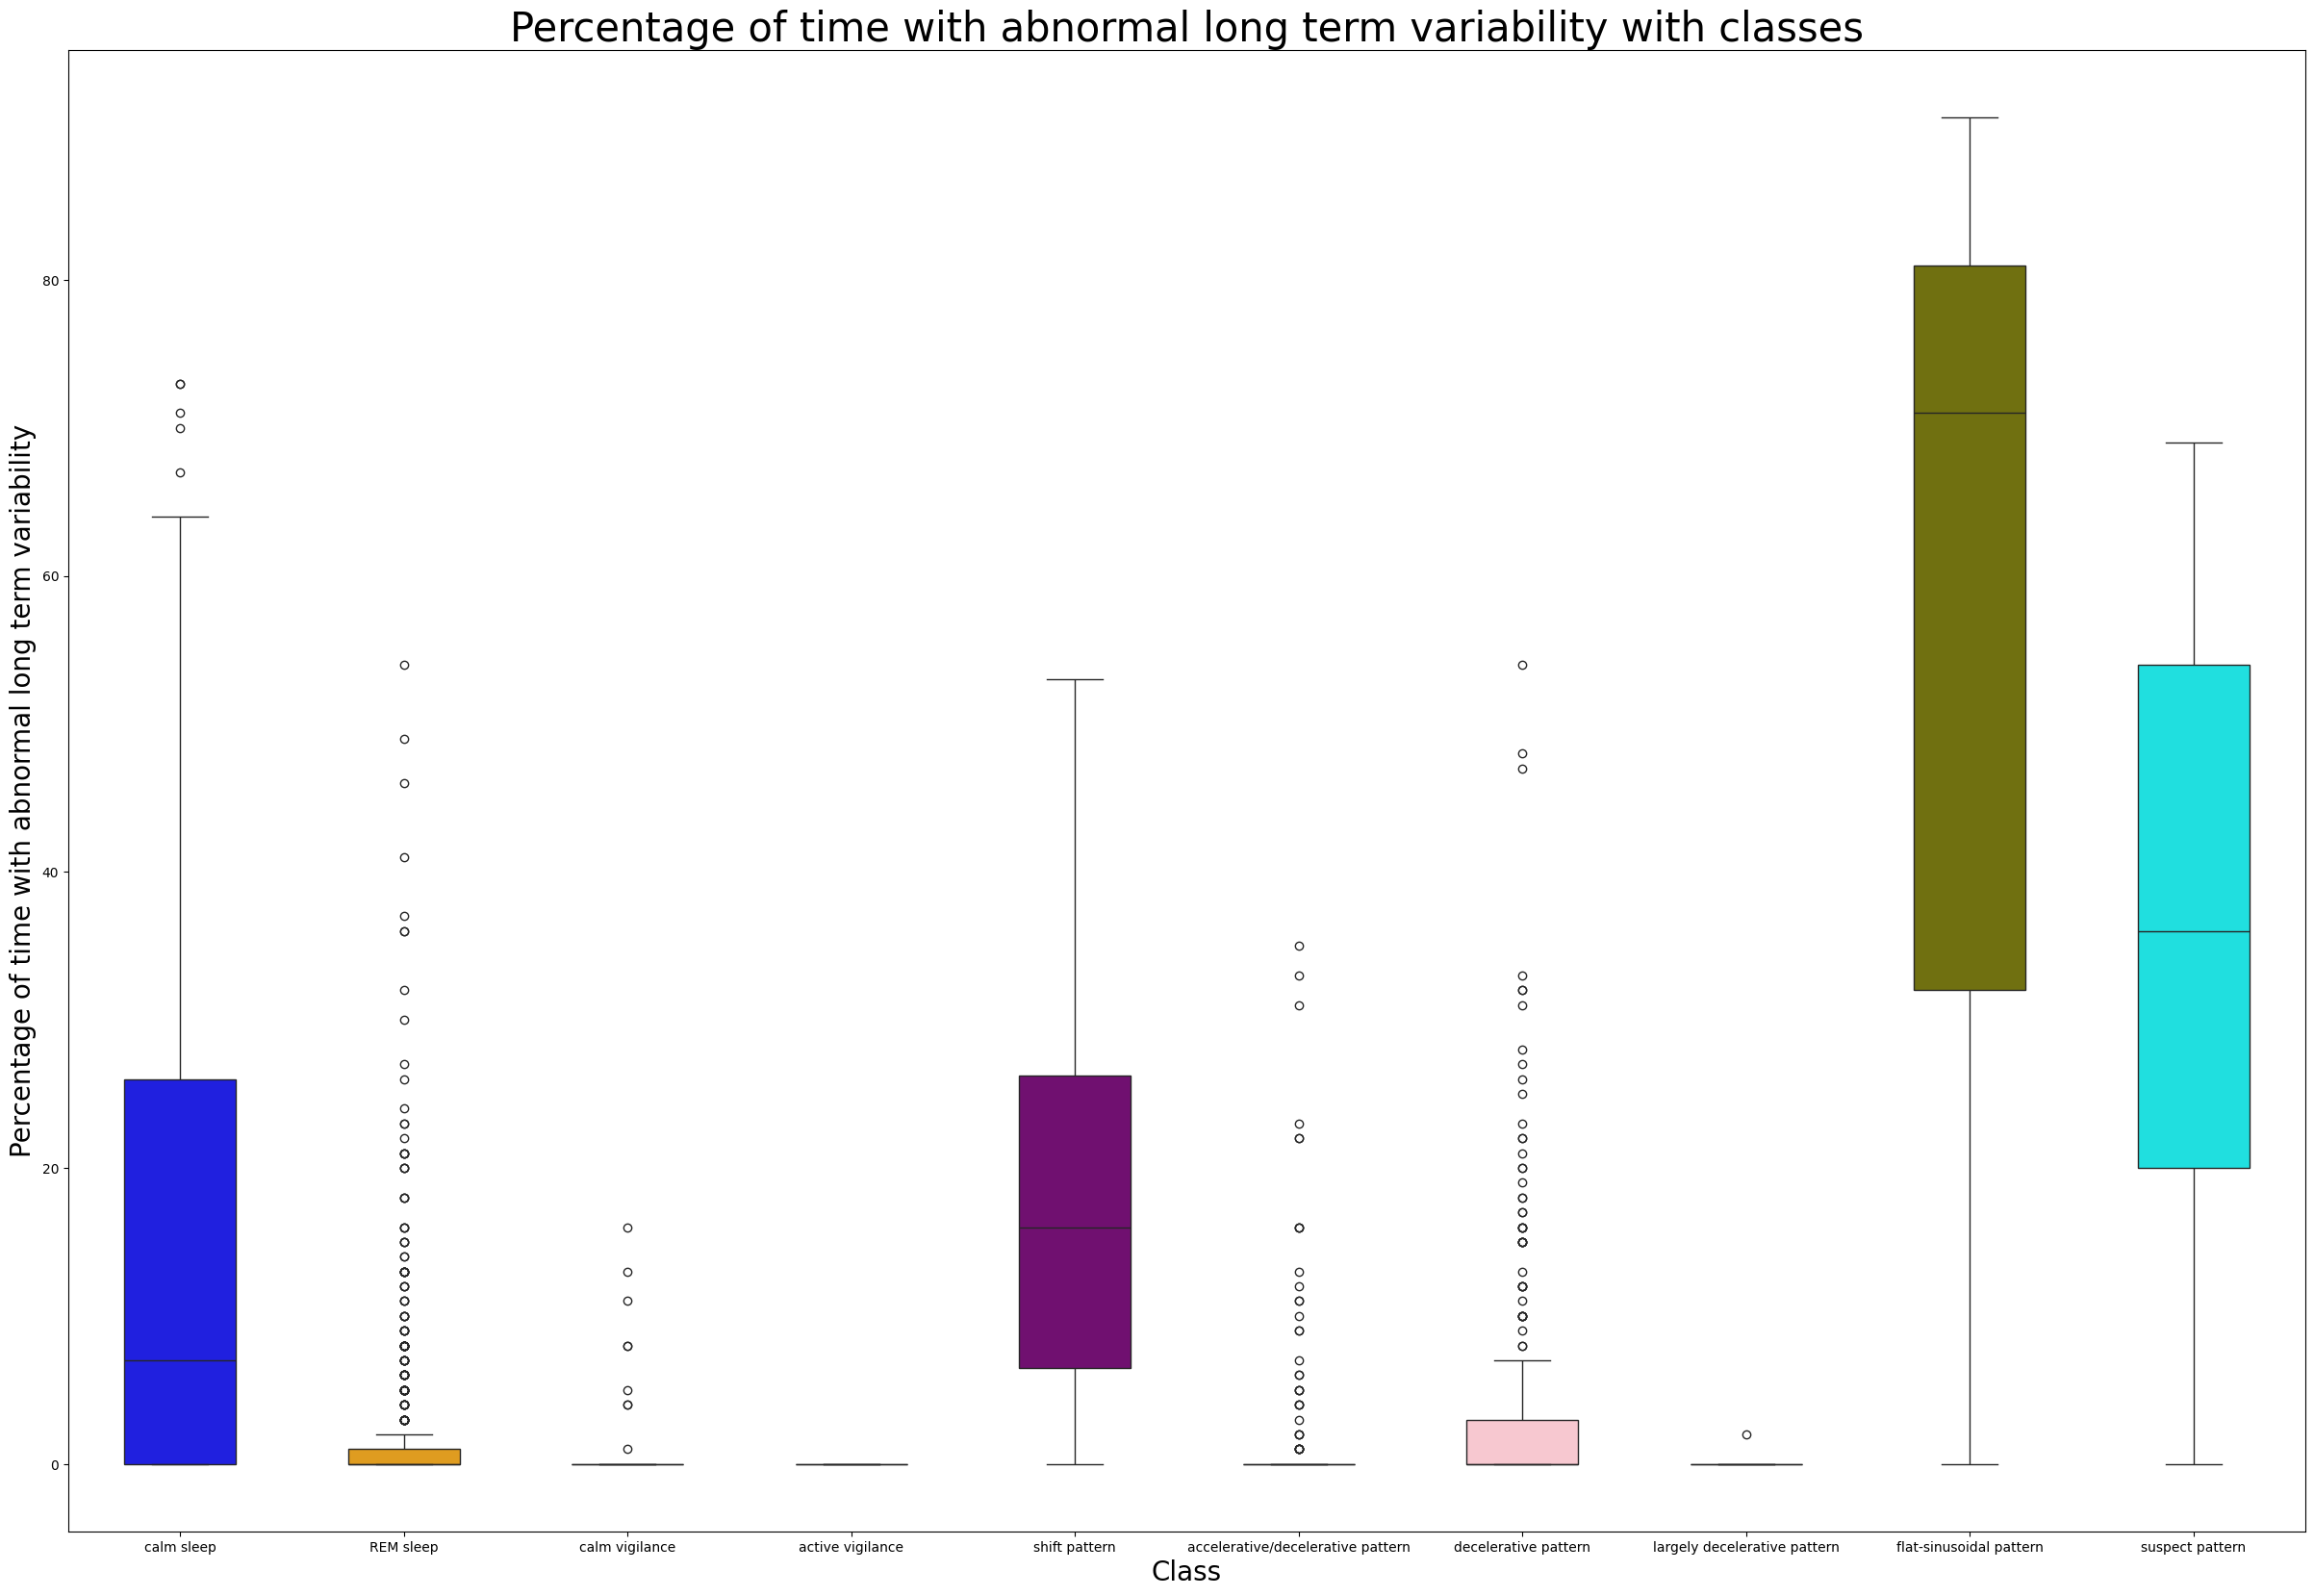

In [ ]:
label_map_class = {1: 'calm sleep', 2: 'REM sleep', 3: 'calm vigilance', 4:'active vigilance', 5:'shift pattern',6:'accelerative/decelerative pattern' ,7:'decelerative pattern',8:'largely decelerative pattern', 9:'flat-sinusoidal pattern', 10:'suspect pattern'}

# Map the values in the 'NSP' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)


order = [
    'calm sleep', 'REM sleep', 'calm vigilance', 'active vigilance',
    'shift pattern', 'accelerative/decelerative pattern', 'decelerative pattern',
    'largely decelerative pattern', 'flat-sinusoidal pattern', 'suspect pattern'
]
palette = {
    'calm sleep': 'blue',
    'REM sleep': 'orange',
    'calm vigilance': 'green',
    'active vigilance': 'red',
    'shift pattern': 'purple',
    'accelerative/decelerative pattern': 'brown',
    'decelerative pattern': 'pink',
    'largely decelerative pattern': 'gray',
    'flat-sinusoidal pattern': 'olive',
    'suspect pattern': 'cyan'
}

# Create the box plot with the mapped values
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['CLASS_mapped'], y=df['ALTV'],order=order,palette=palette, width=0.5)

plt.xlabel('Class',fontsize= 20)
plt.ylabel('Percentage of time with abnormal long term variability',fontsize= 20)
plt.title('Percentage of time with abnormal long term variability with classes',fontsize= 30)


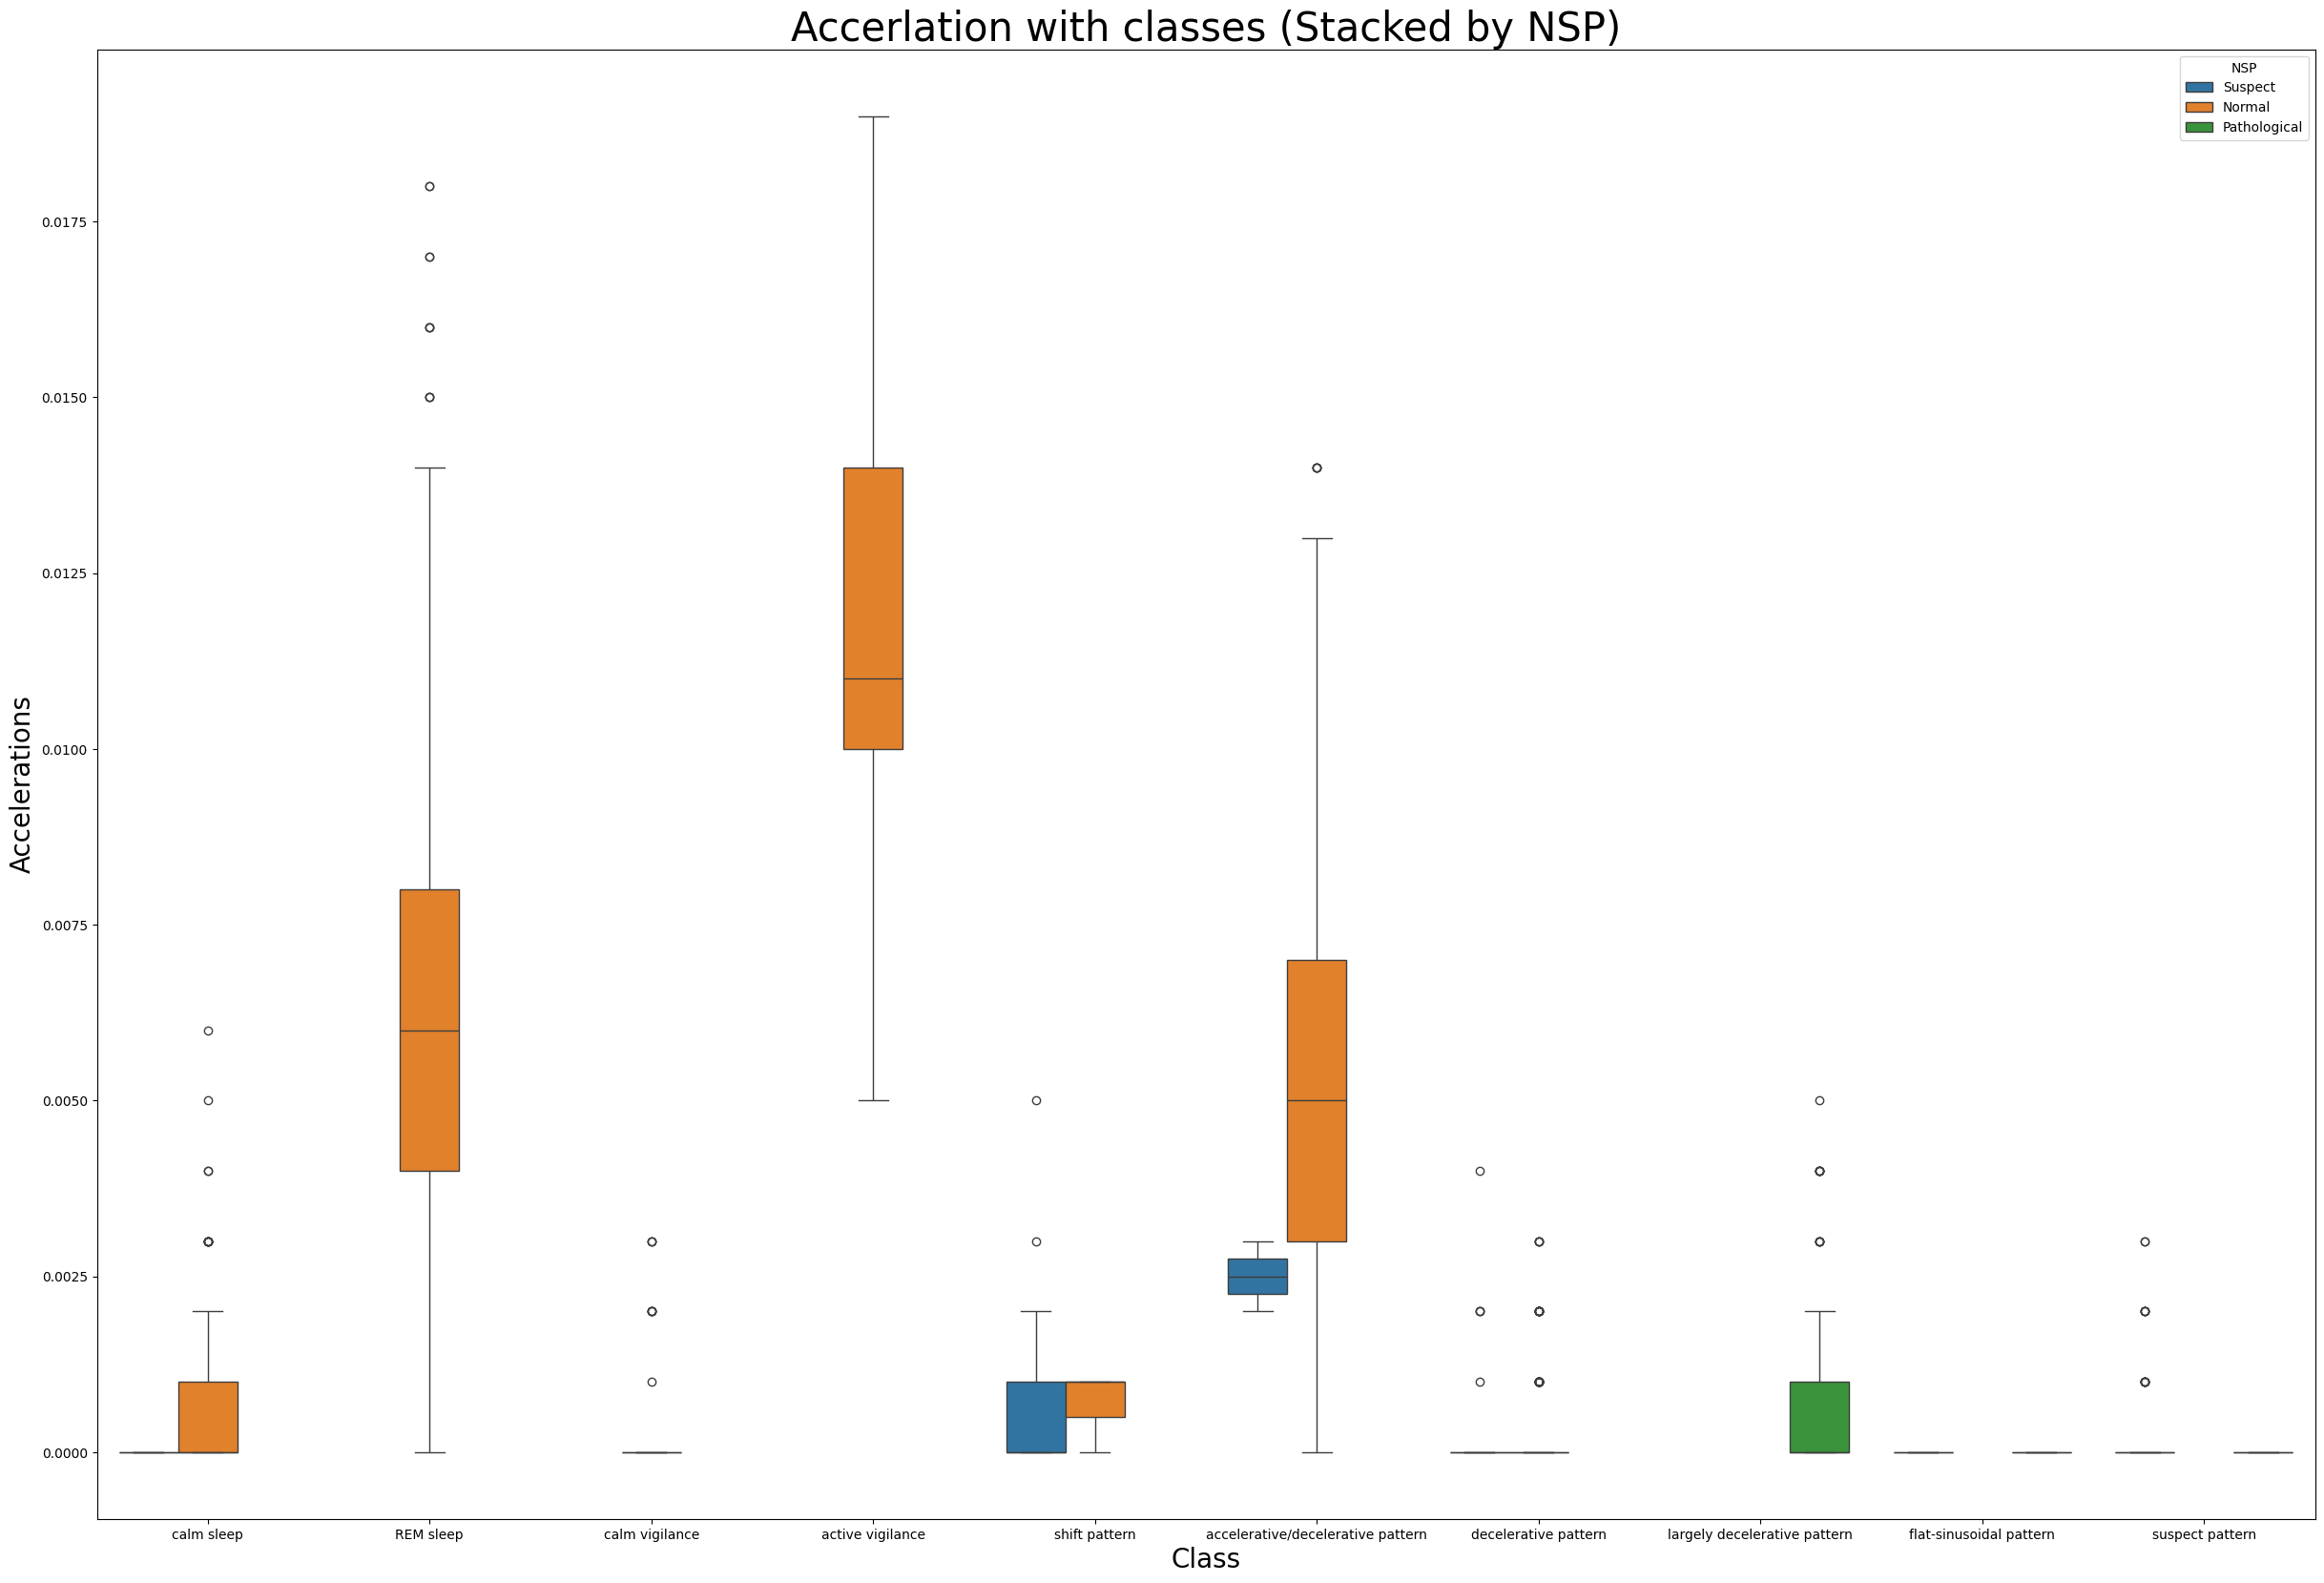

In [ ]:
# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='AC', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Accelerations',fontsize=20)
plt.legend(title='NSP')
plt.title('Accerlation with classes (Stacked by NSP)', fontsize=30)

# Show the plot
plt.show()


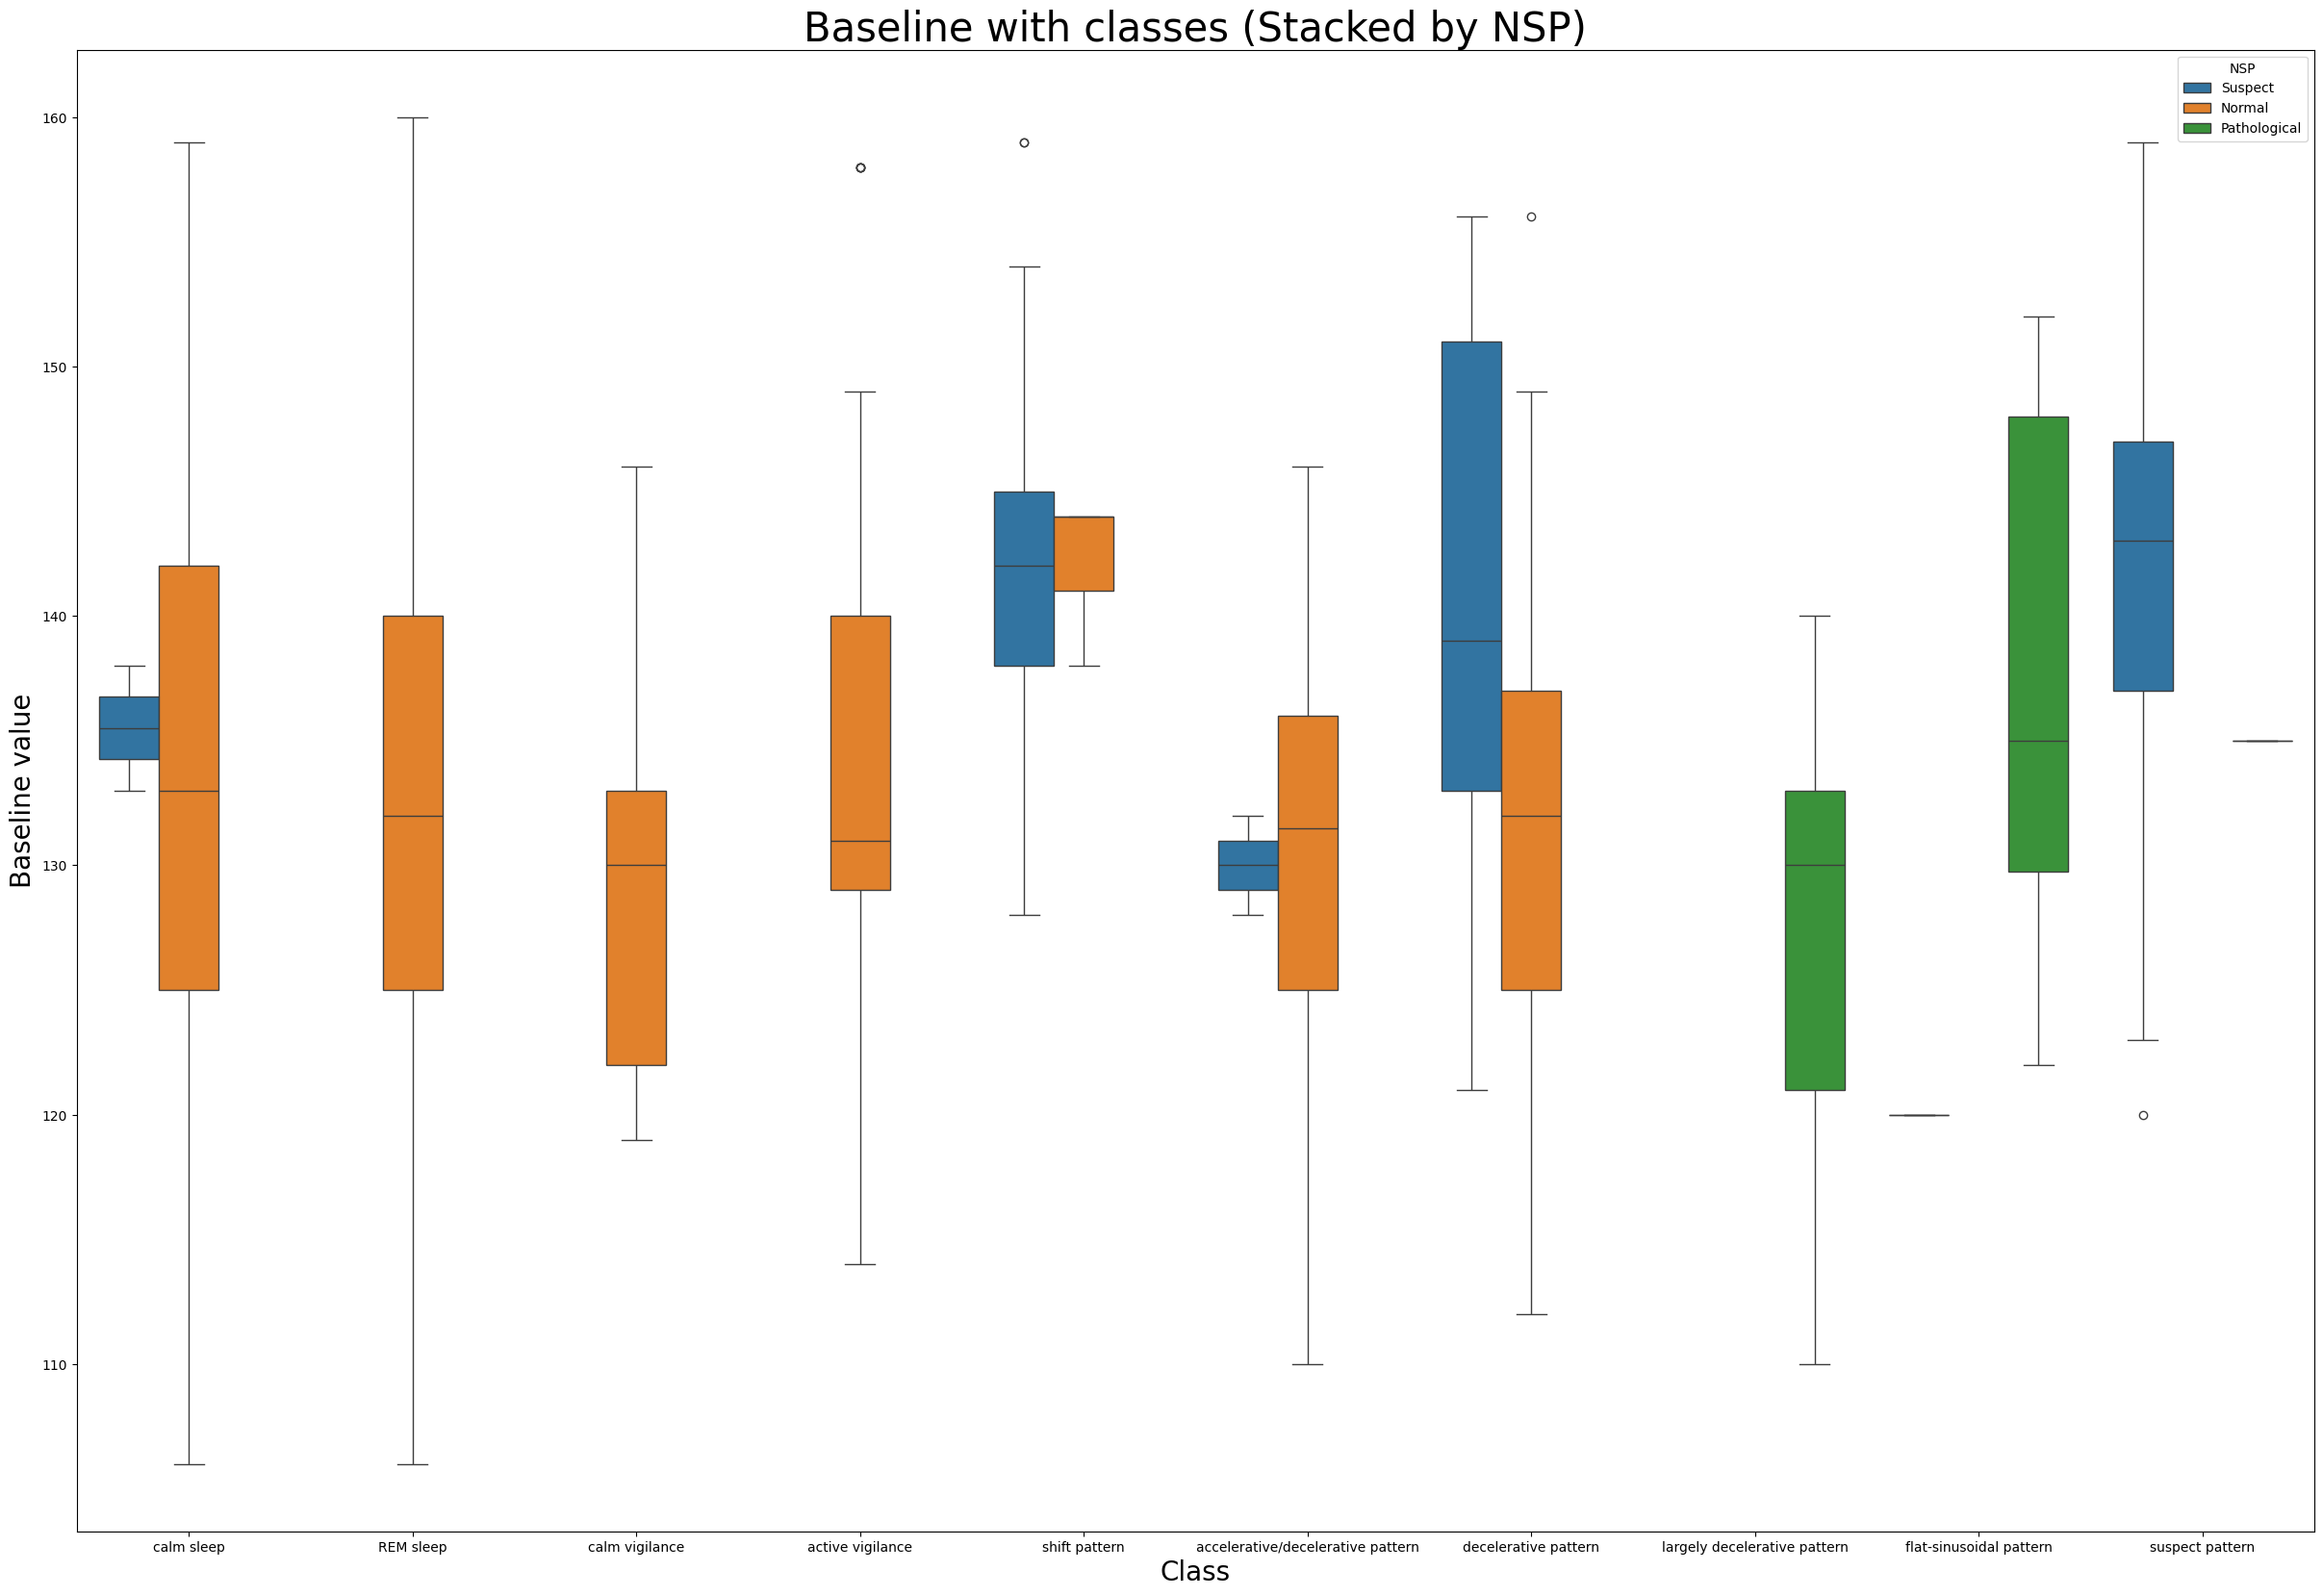

In [ ]:
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='LB', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Baseline value',fontsize=20)
plt.legend(title='NSP')
plt.title('Baseline with classes (Stacked by NSP)' ,fontsize=30)

# Show the plot
plt.show()

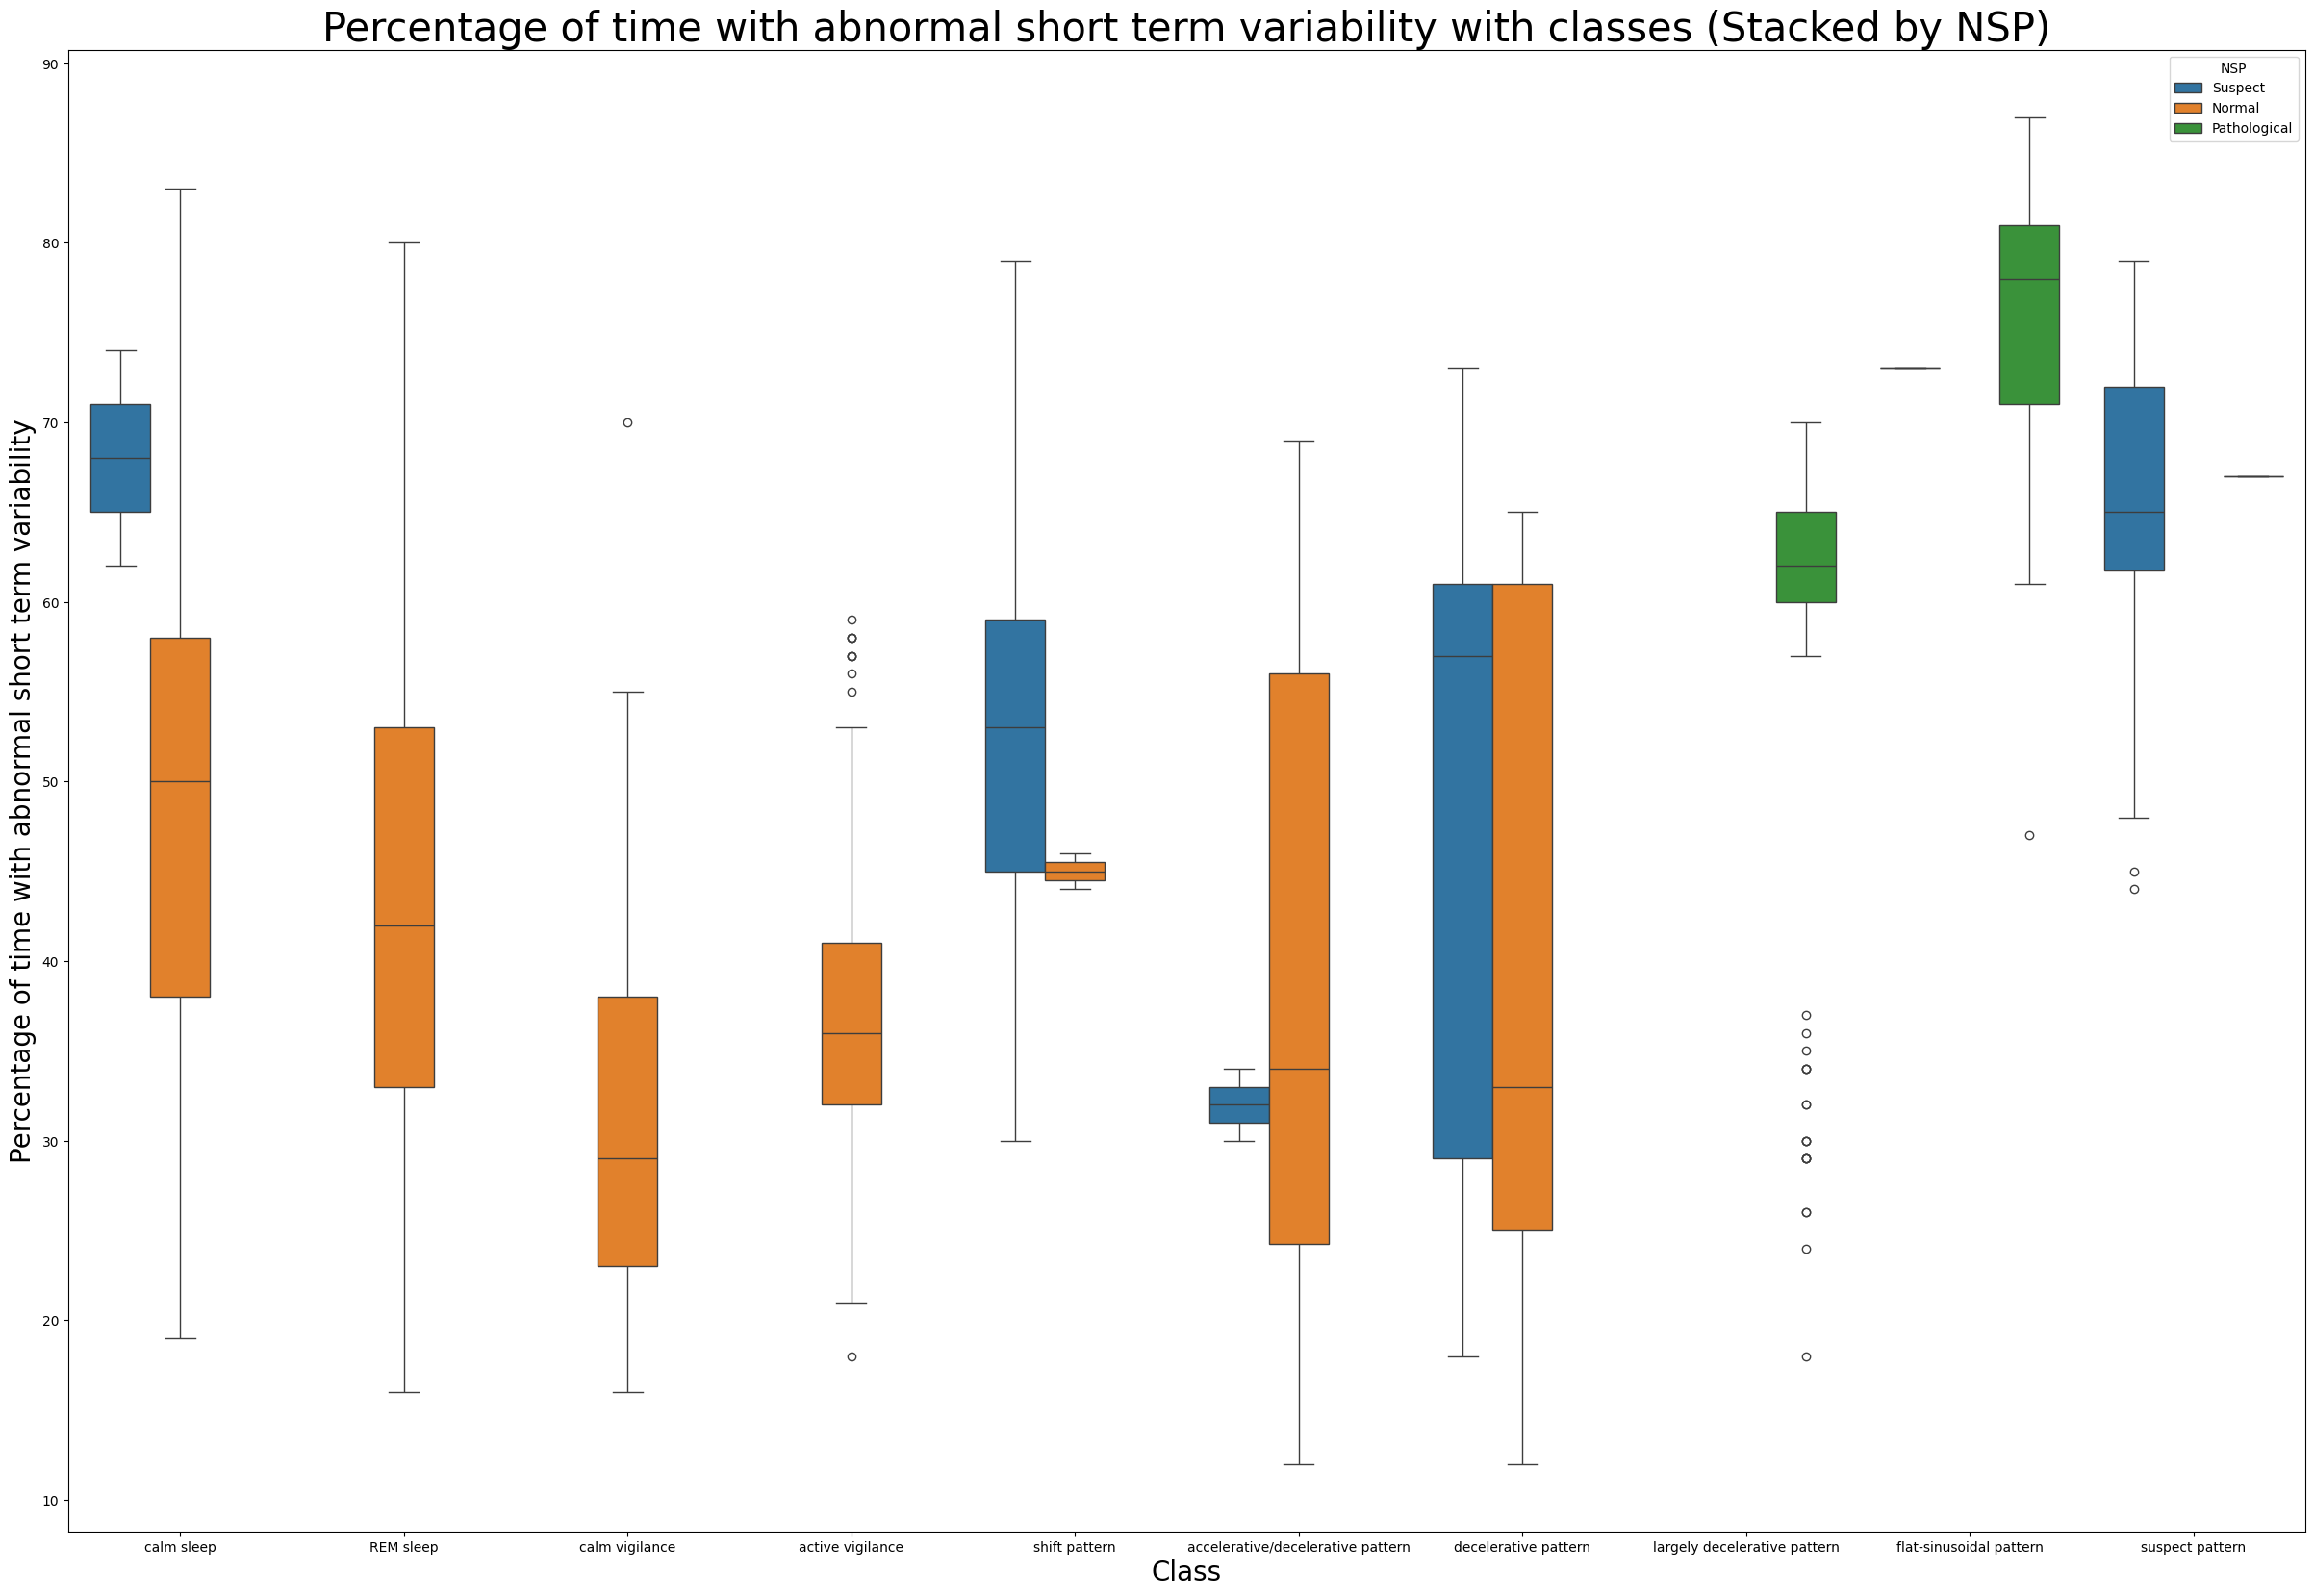

In [ ]:
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='ASTV', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Percentage of time with abnormal short term variability',fontsize=20)
plt.legend(title='NSP')
plt.title('Percentage of time with abnormal short term variability with classes (Stacked by NSP)',fontsize=30)

# Show the plot
plt.show()


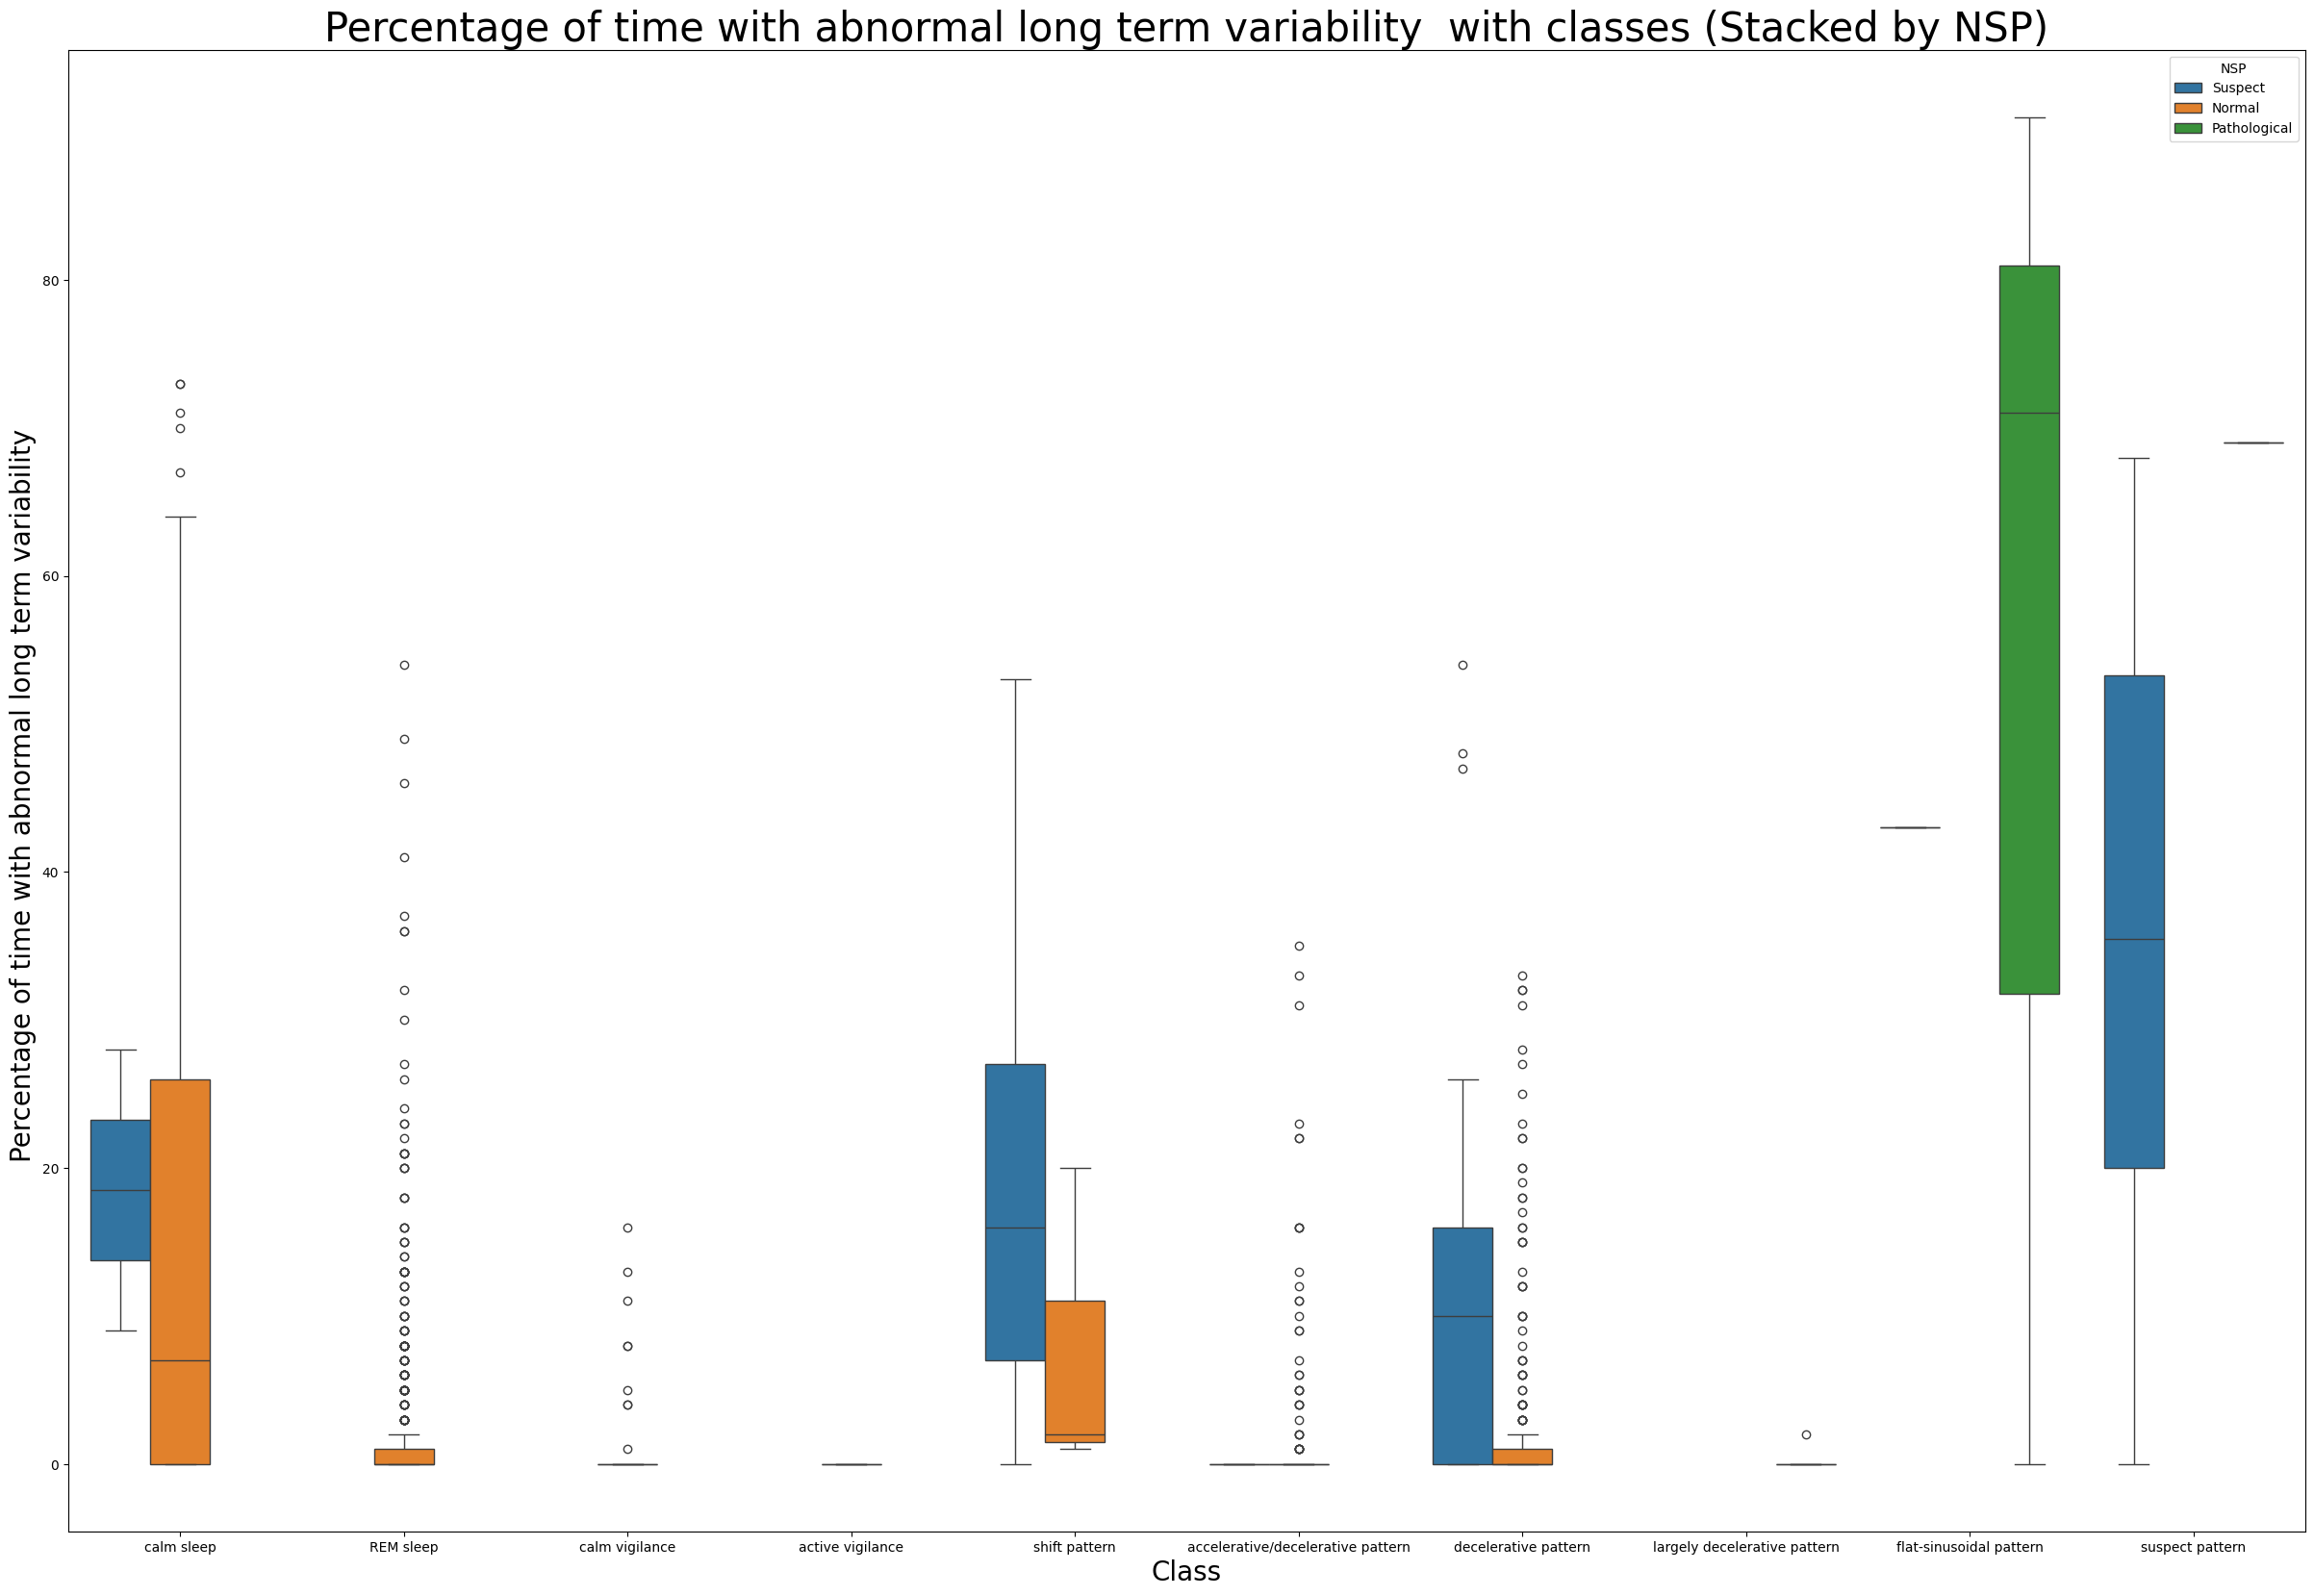

In [ ]:
# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='ALTV', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Percentage of time with abnormal long term variability ',fontsize=20)
plt.legend(title='NSP')
plt.title('Percentage of time with abnormal long term variability  with classes (Stacked by NSP)',fontsize=30)

# Show the plot
plt.show()

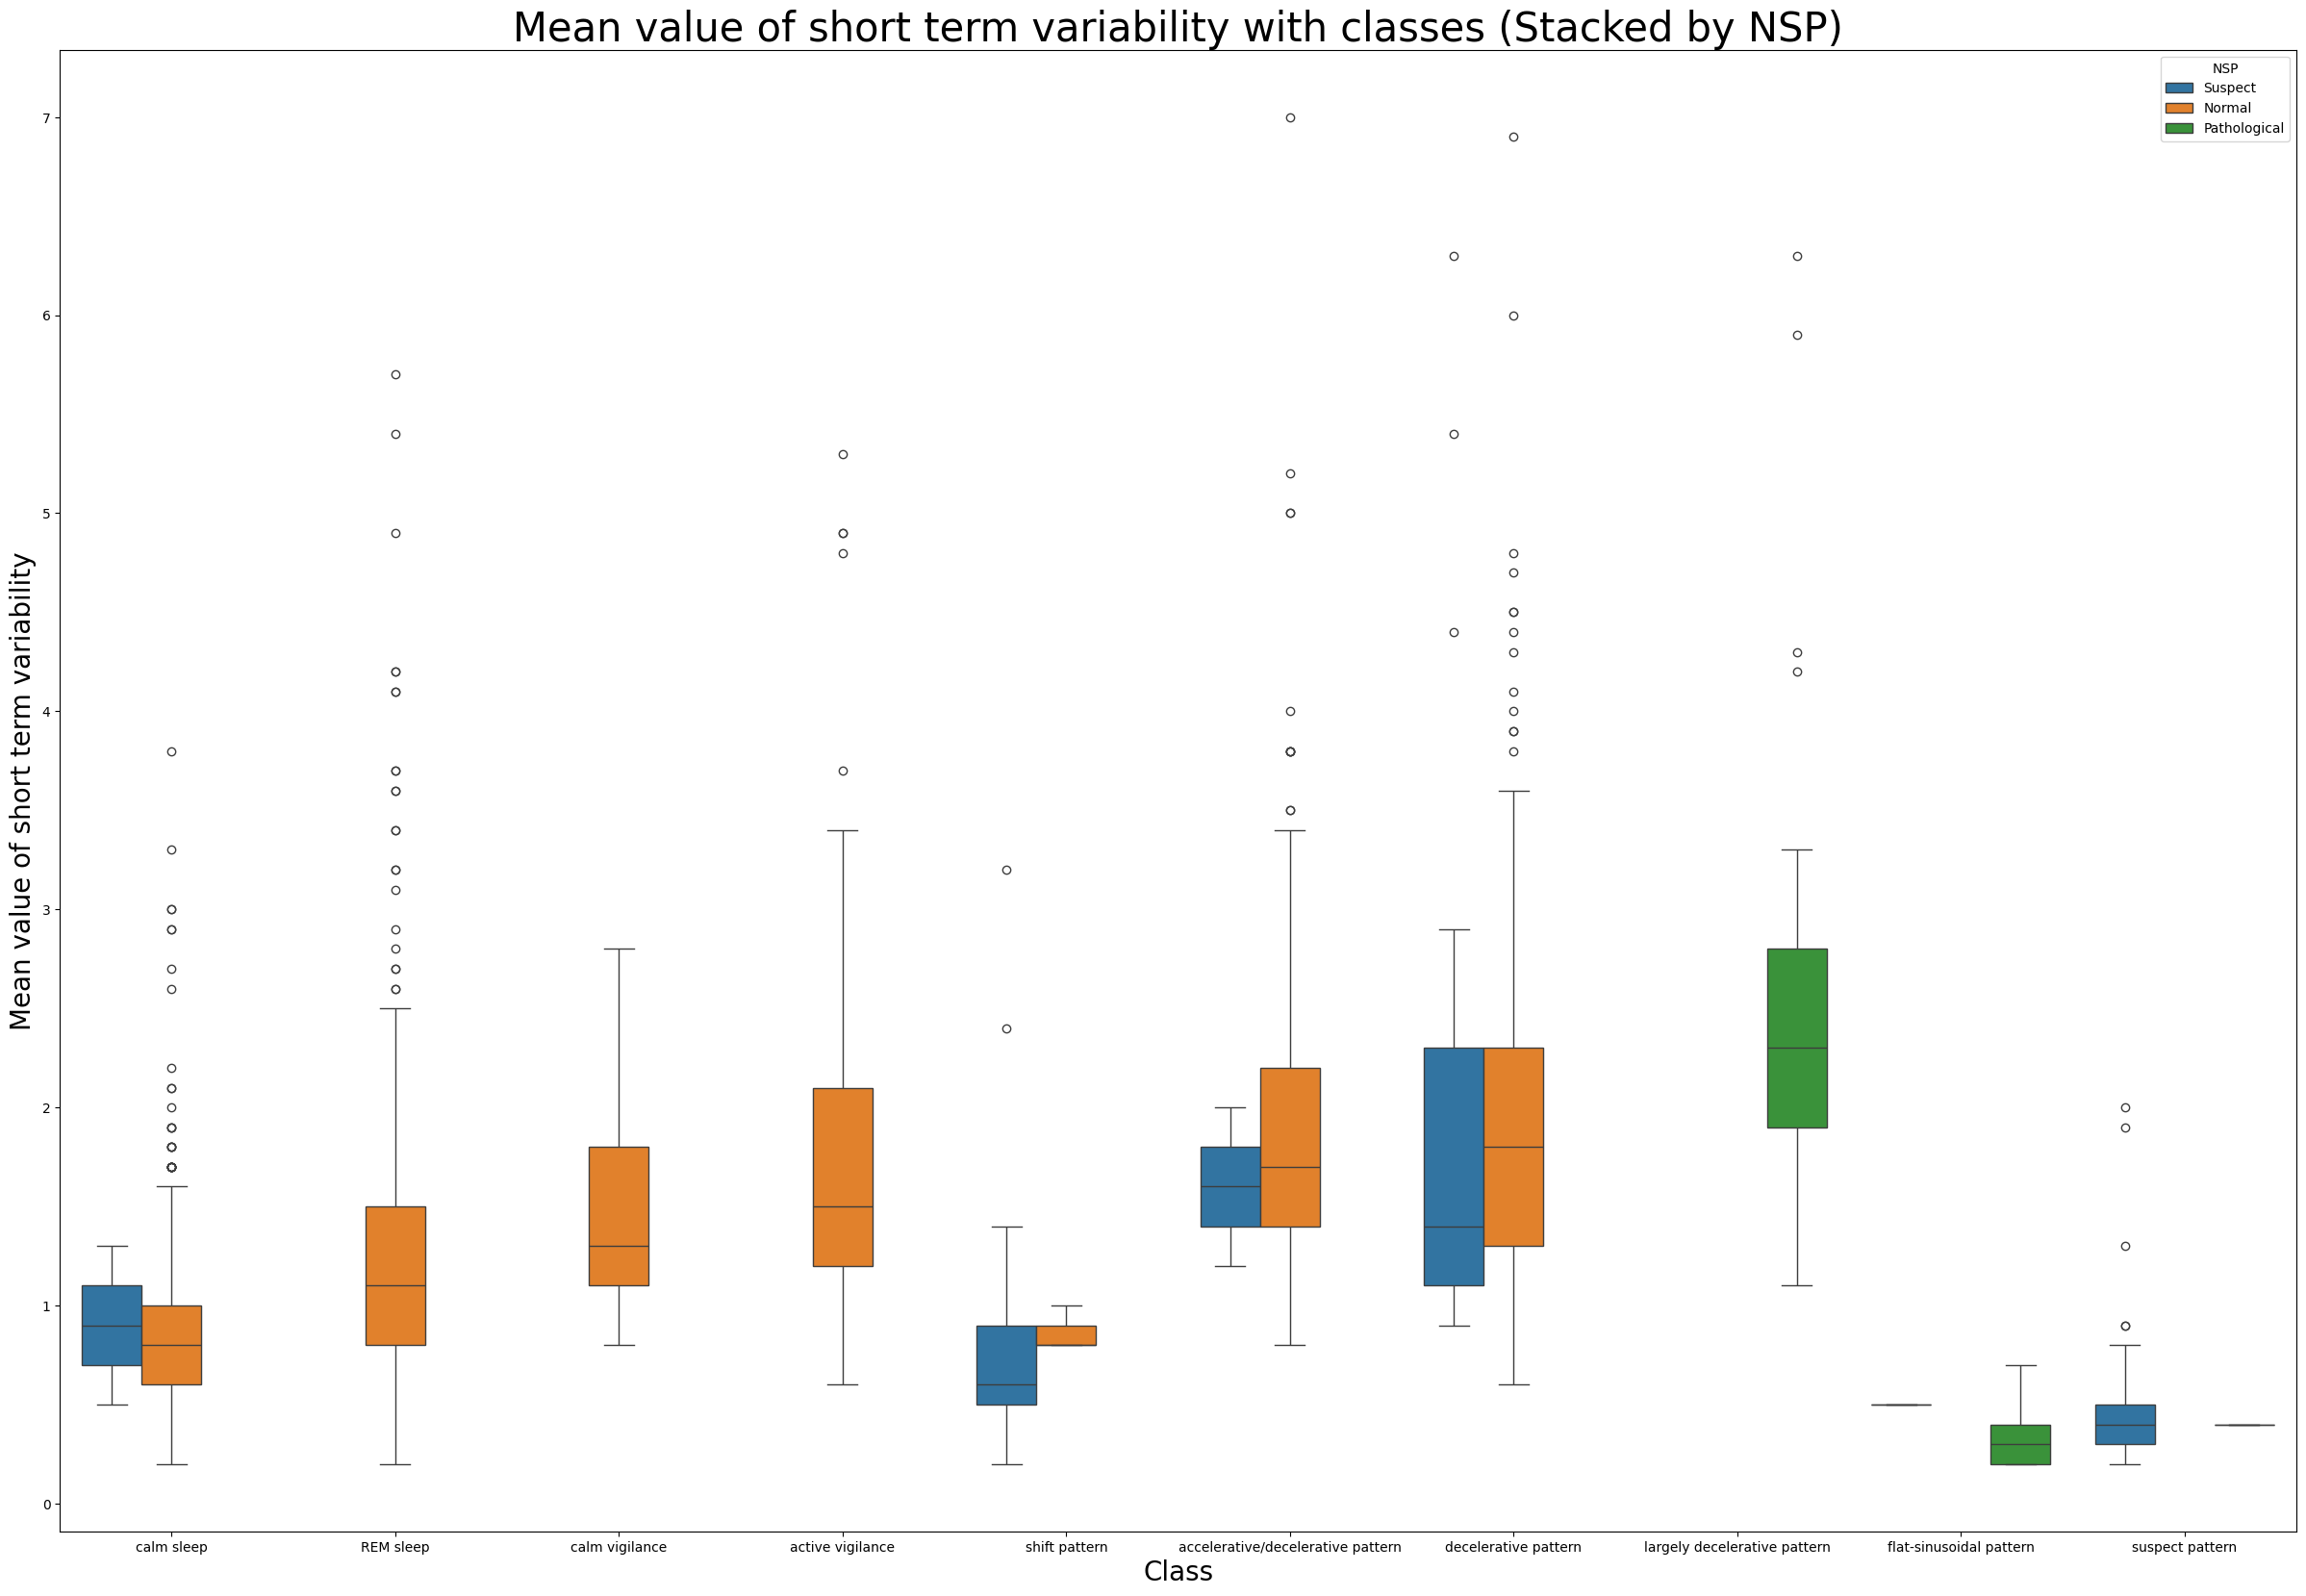

In [ ]:
# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='MSTV', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Mean value of short term variability',fontsize=20)
plt.legend(title='NSP')
plt.title('Mean value of short term variability with classes (Stacked by NSP)',fontsize=30)

# Show the plot
plt.show()

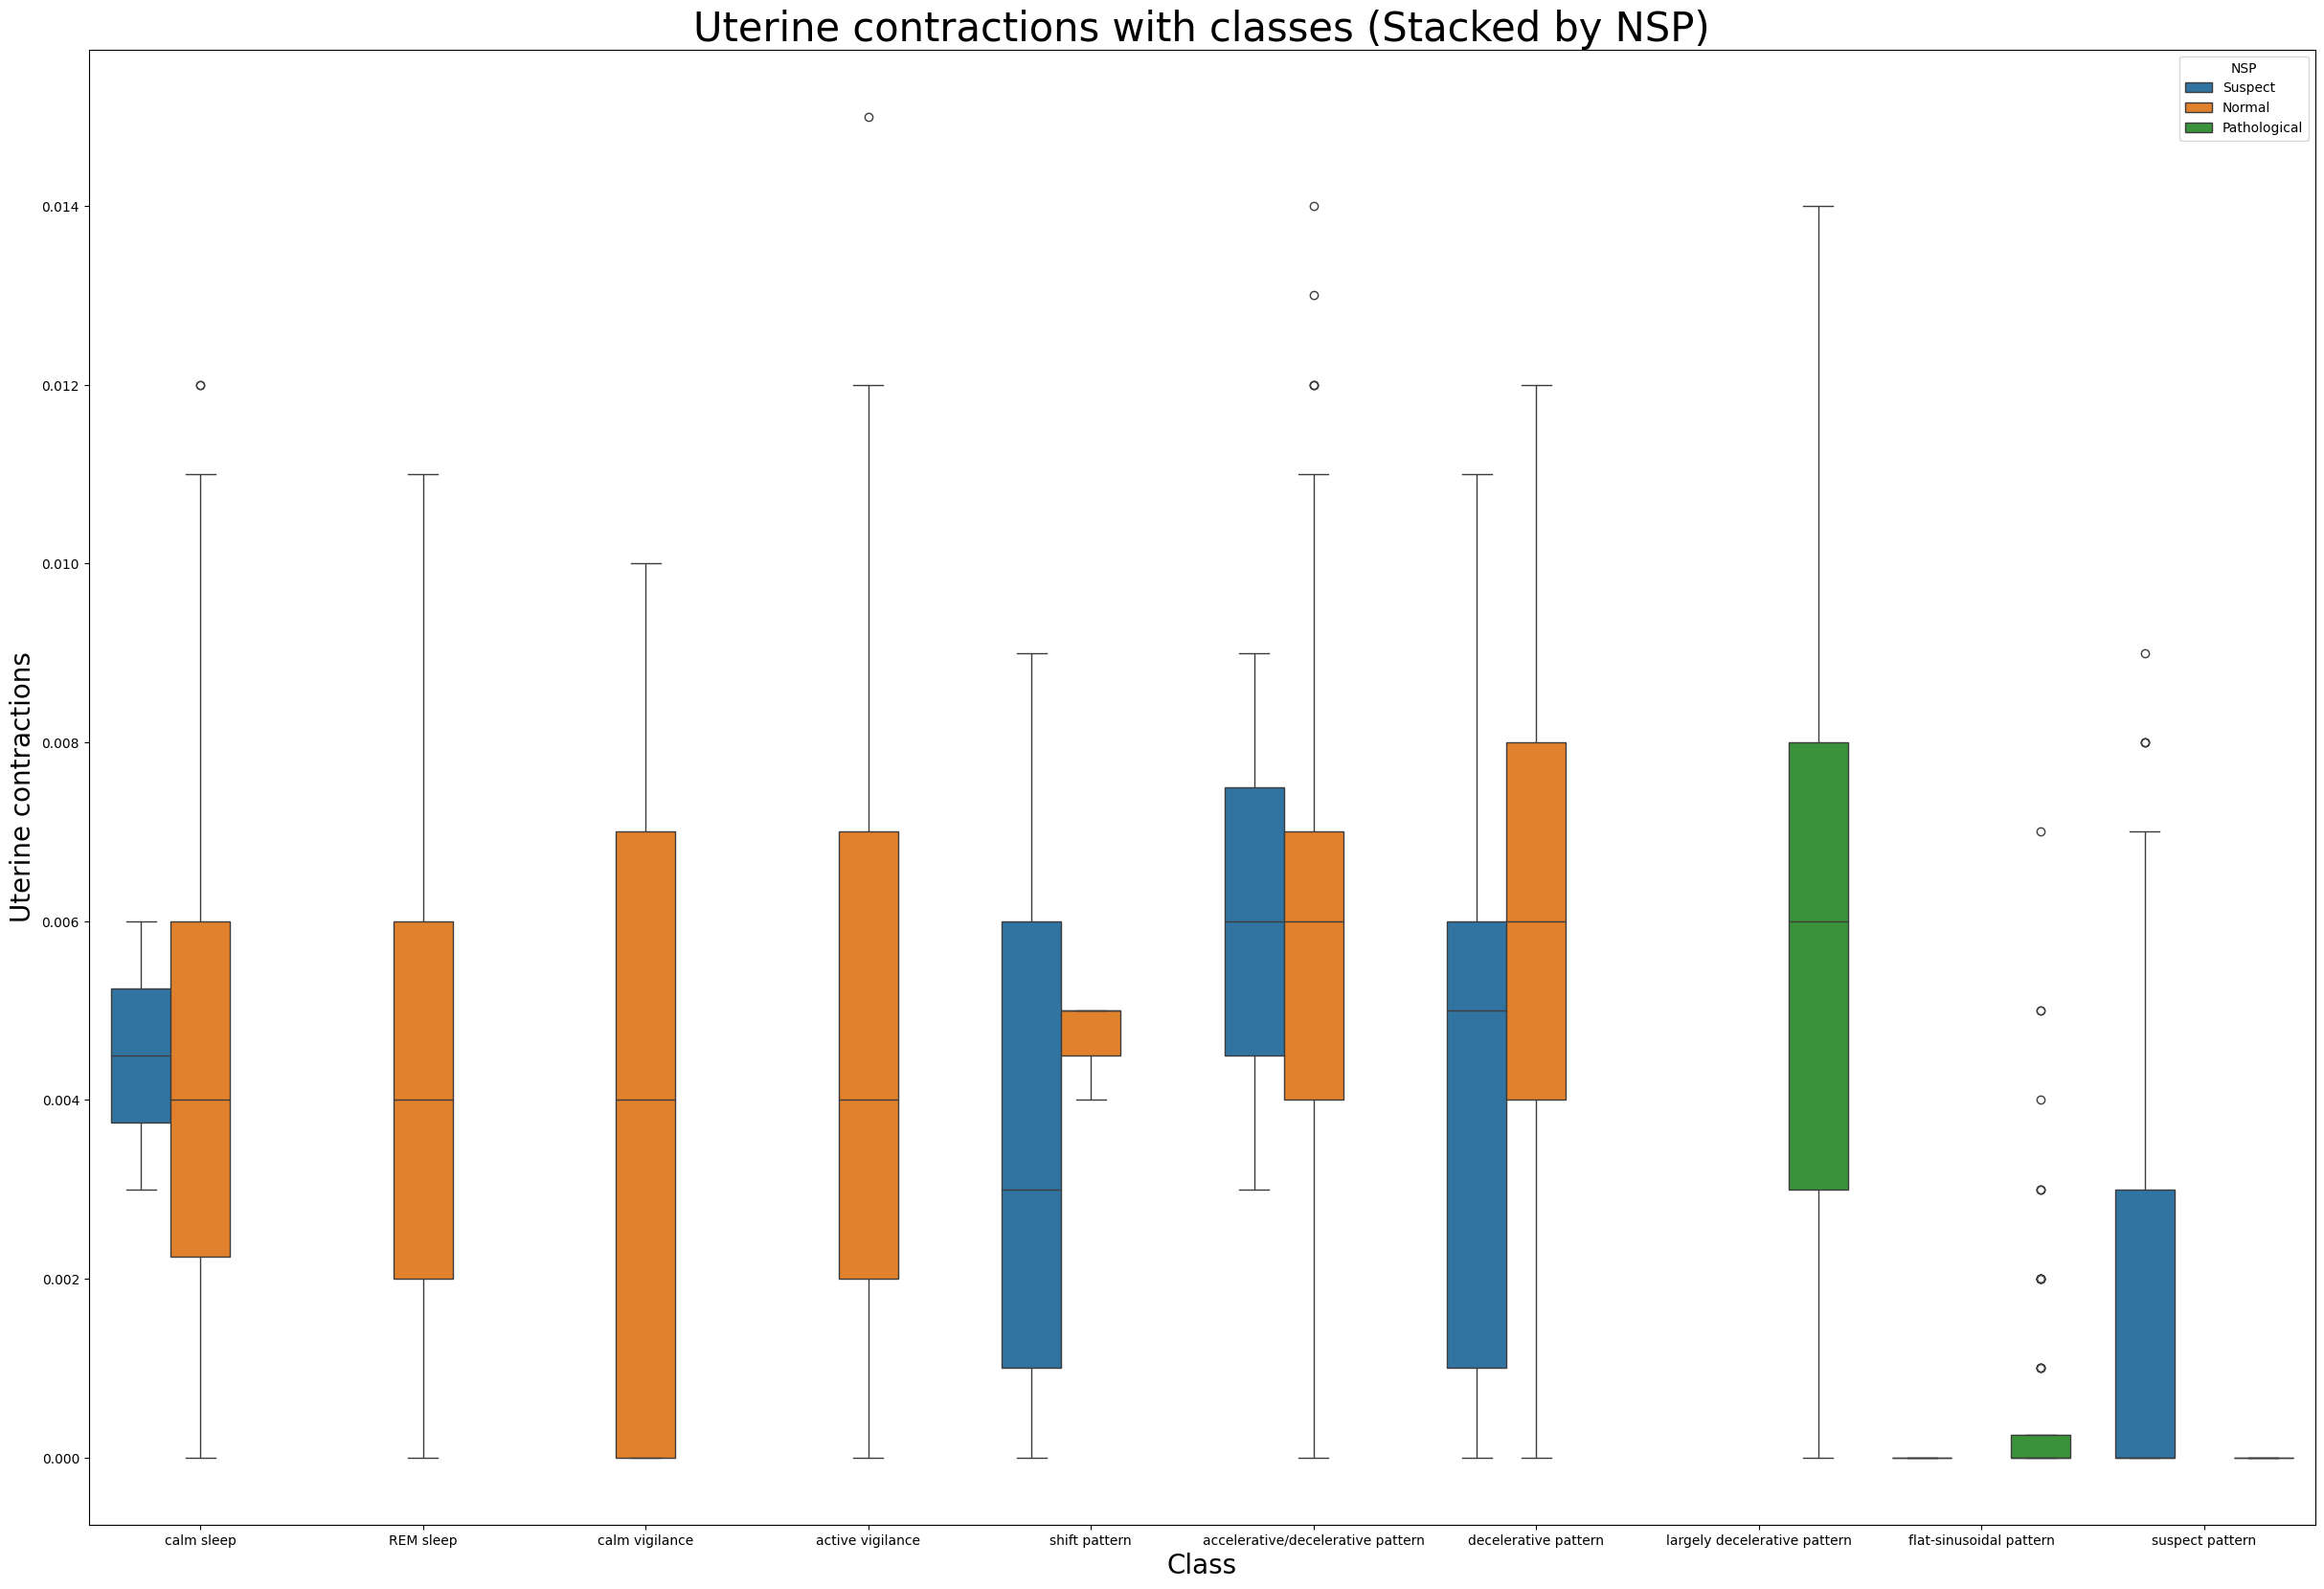

In [ ]:
# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

class_order = [label_map_class[i] for i in range(1, 11)]

# Create the box plot with the mapped values and hue for stacked boxplot
plt.figure(figsize=(30, 20))
sns.boxplot(x='CLASS_mapped', y='UC', hue='NSP_mapped', data=df, order=class_order)

# Set plot labels and title
plt.xlabel('Class',fontsize=20)
plt.ylabel('Uterine contractions',fontsize=20)
plt.legend(title='NSP')
plt.title('Uterine contractions with classes (Stacked by NSP)',fontsize=30)

# Show the plot
plt.show()

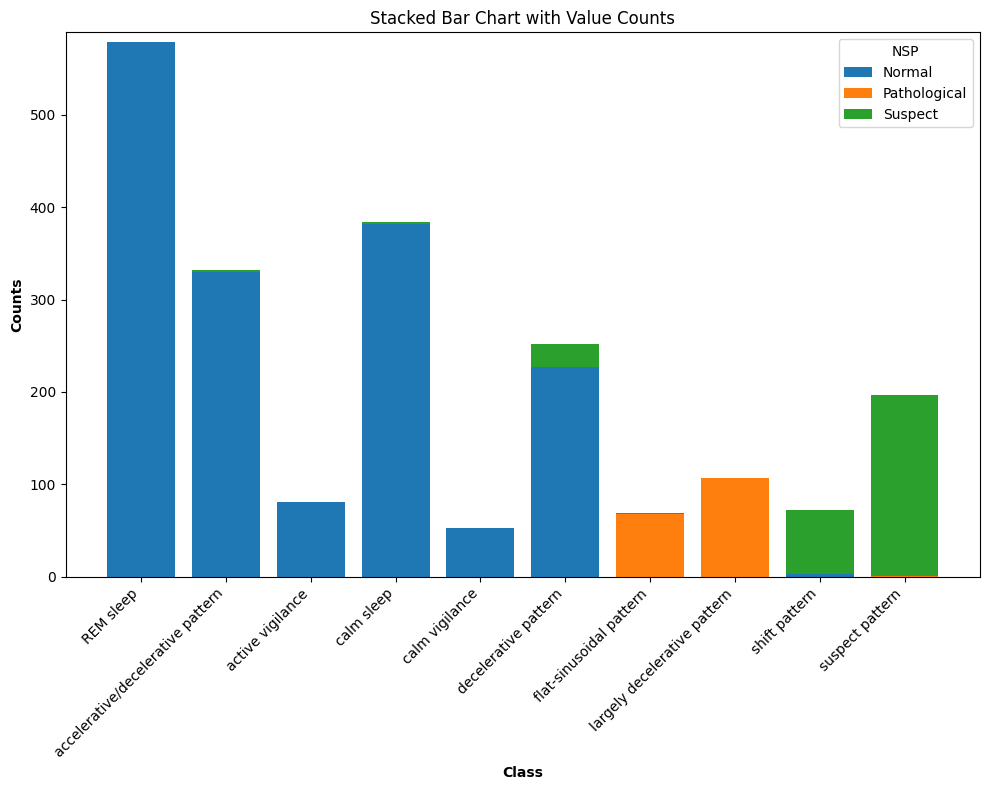

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded

label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

df['NSP_mapped']=df['NSP'].map(label_map)

# Get value counts for each category and subcategory
counts = df.groupby('CLASS_mapped')['NSP_mapped'].value_counts().unstack().fillna(0)

# Define the positions of the bars
r = range(len(counts))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as needed

# Plot each subcategory as a stacked bar
bottom = np.zeros(len(counts))
for subcategory in counts.columns:
    ax.bar(r, counts[subcategory], bottom=bottom, label=subcategory)
    bottom += counts[subcategory]

# Add xticks on the middle of the group bars
ax.set_xlabel('Class', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(counts.index, rotation=45, ha='right')  # Rotate x-ticks if labels are long

# Add y label
ax.set_ylabel('Counts', fontweight='bold')

# Set y-axis limit (you can adjust these limits as needed)
ax.set_ylim(0, bottom.max() + 10)  # Set the upper limit slightly higher than the maximum count

# Set custom y-ticks if needed
#ax.set_yticks(np.arange(0, bottom.max() + 10, step=5))  # Adjust the step as needed

# Add title
ax.set_title('Stacked Bar Chart with Value Counts')

# Create legend
ax.legend(title='NSP')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


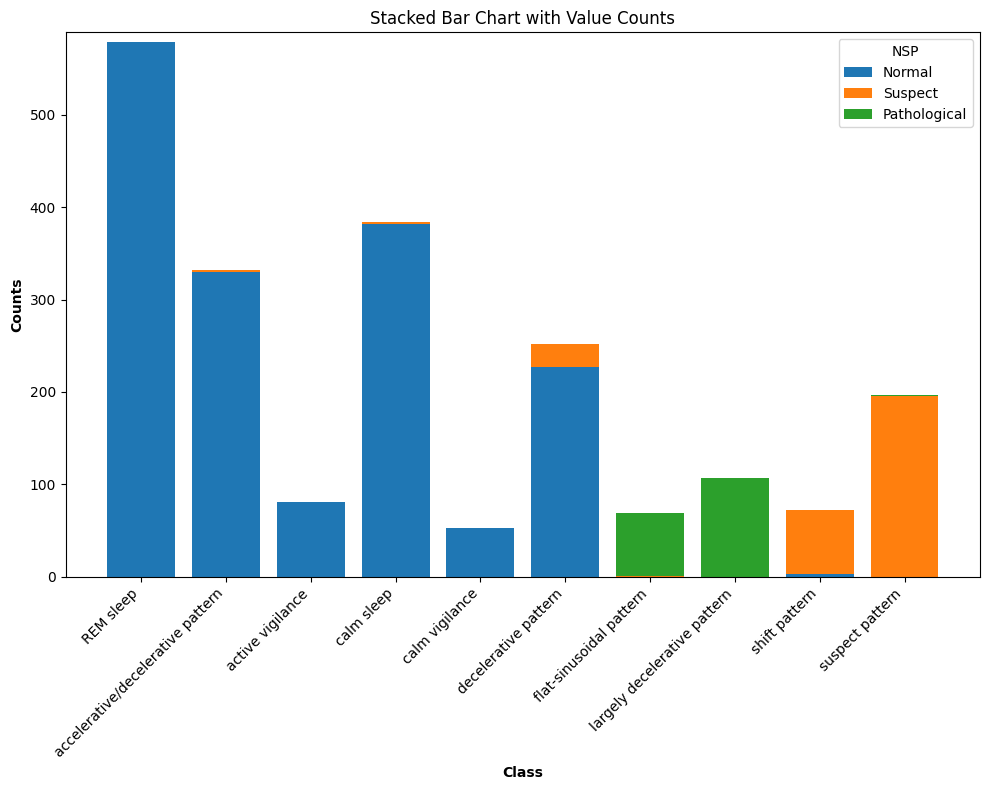

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded

label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}

# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)
df['NSP_mapped'] = df['NSP'].map(label_map)

# Get value counts for each category and subcategory
counts = df.groupby('CLASS_mapped')['NSP_mapped'].value_counts().unstack().fillna(0)

# Ensure the order is Normal, Suspect, Pathological
counts = counts[['Normal', 'Suspect', 'Pathological']]

# Define the positions of the bars
r = range(len(counts))

# Define the colors for each subcategory
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as needed

# Plot each subcategory as a stacked bar
bottom = np.zeros(len(counts))
for subcategory in counts.columns:
    ax.bar(r, counts[subcategory], bottom=bottom, label=subcategory, color=palette[subcategory])
    bottom += counts[subcategory]

# Add xticks on the middle of the group bars
ax.set_xlabel('Class', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(counts.index, rotation=45, ha='right')  # Rotate x-ticks if labels are long

# Add y label
ax.set_ylabel('Counts', fontweight='bold')

# Set y-axis limit (you can adjust these limits as needed)
ax.set_ylim(0, bottom.max() + 10)  # Set the upper limit slightly higher than the maximum count

# Add title
ax.set_title('Stacked Bar Chart with Value Counts')

# Create legend
ax.legend(title='NSP')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


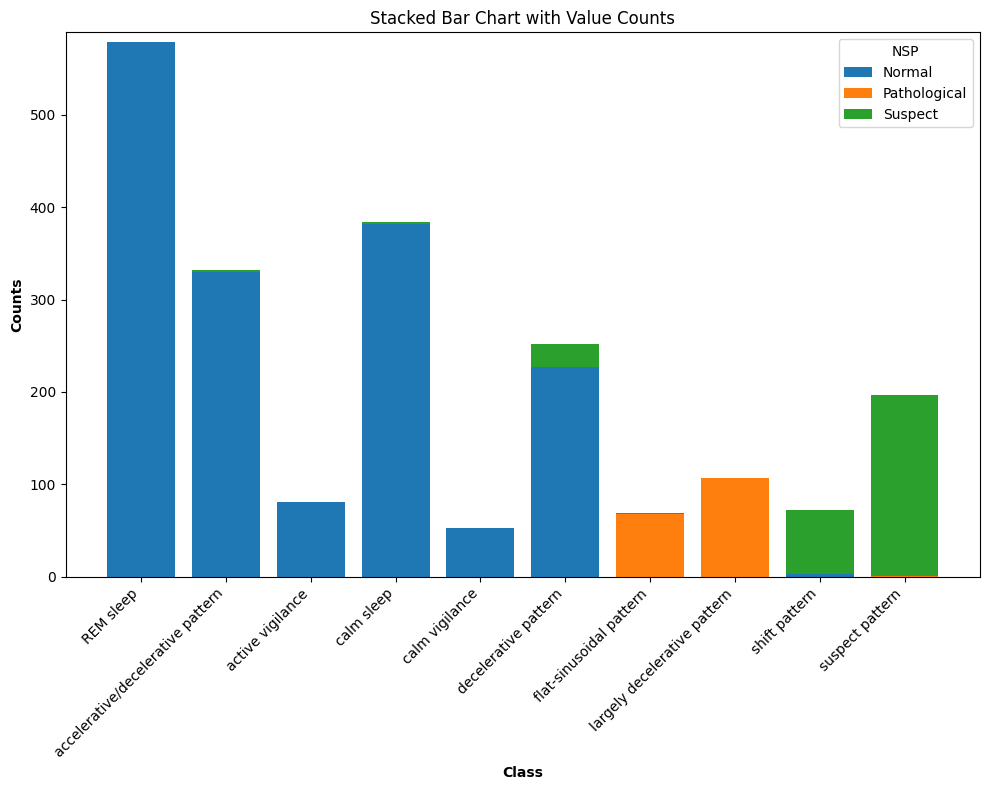

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it's already loaded

# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}
label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}
df['NSP_mapped'] = df['NSP'].map(label_map)

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

# Get value counts for each category and subcategory
counts = df.groupby('CLASS_mapped')['NSP_mapped'].value_counts().unstack().fillna(0)

# Define the positions of the bars
r = range(len(counts))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as needed

# Plot each subcategory as a stacked bar
bottom = np.zeros(len(counts))
for subcategory in counts.columns:
    ax.bar(r, counts[subcategory], bottom=bottom, label=subcategory)
    bottom += counts[subcategory]

# Add xticks on the middle of the group bars
ax.set_xlabel('Class', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(counts.index, rotation=45, ha='right')  # Rotate x-ticks if labels are long

# Add y label
ax.set_ylabel('Counts', fontweight='bold')

# Set y-axis limit (you can adjust these limits as needed)
ax.set_ylim(0, bottom.max() + 10)  # Set the upper limit slightly higher than the maximum count

# Set custom y-ticks if needed
#ax.set_yticks(np.arange(0, bottom.max() + 10, step=5))  # Adjust the step as needed

# Add title
ax.set_title('Stacked Bar Chart with Value Counts')

# Create legend
ax.legend(title='NSP')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


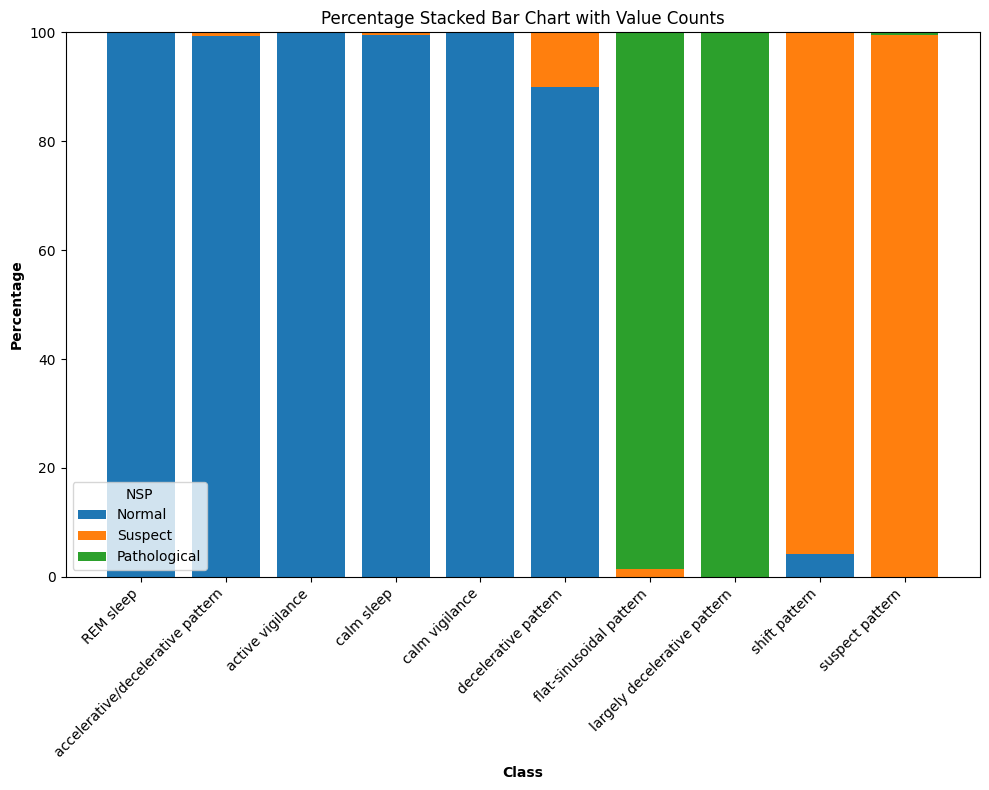

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}
df['NSP_mapped'] = df['NSP'].map(label_map)

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

# Create a function to expand the DataFrame
def expand_df(df, target_count=1000):
    expanded_df = pd.DataFrame()
    for class_value in df['CLASS'].unique():
        class_df = df[df['CLASS'] == class_value]
        repeats = target_count // len(class_df) + 1
        expanded_class_df = pd.concat([class_df] * repeats, ignore_index=True).iloc[:target_count]
        expanded_df = pd.concat([expanded_df, expanded_class_df], ignore_index=True)
    return expanded_df

# Expand the DataFrame to have at least 1000 counts per class
df_expanded = expand_df(df)

# Get value counts for each category and subcategory
counts = df_expanded.groupby('CLASS_mapped')['NSP_mapped'].value_counts().unstack().fillna(0)

# Ensure the order is Normal, Suspect, Pathological
counts = counts[['Normal', 'Suspect', 'Pathological']]

# Normalize the counts to get percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Define the positions of the bars
r = range(len(percentages))

# Define the colors for each subcategory
palette = {'Normal': '#1f77b4', 'Suspect': '#ff7f0e', 'Pathological': '#2ca02c'}

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as needed

# Plot each subcategory as a stacked bar
bottom = np.zeros(len(percentages))
for subcategory in percentages.columns:
    ax.bar(r, percentages[subcategory], bottom=bottom, label=subcategory, color=palette[subcategory])
    bottom += percentages[subcategory]

# Add xticks on the middle of the group bars
ax.set_xlabel('Class', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(percentages.index, rotation=45, ha='right')  # Rotate x-ticks if labels are long

# Add y label
ax.set_ylabel('Percentage', fontweight='bold')

# Set y-axis limit (you can adjust these limits as needed)
ax.set_ylim(0, 100)  # Percentage always ranges from 0 to 100

# Add title
ax.set_title('Percentage Stacked Bar Chart with Value Counts')

# Create legend
ax.legend(title='NSP', loc='lower left')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()


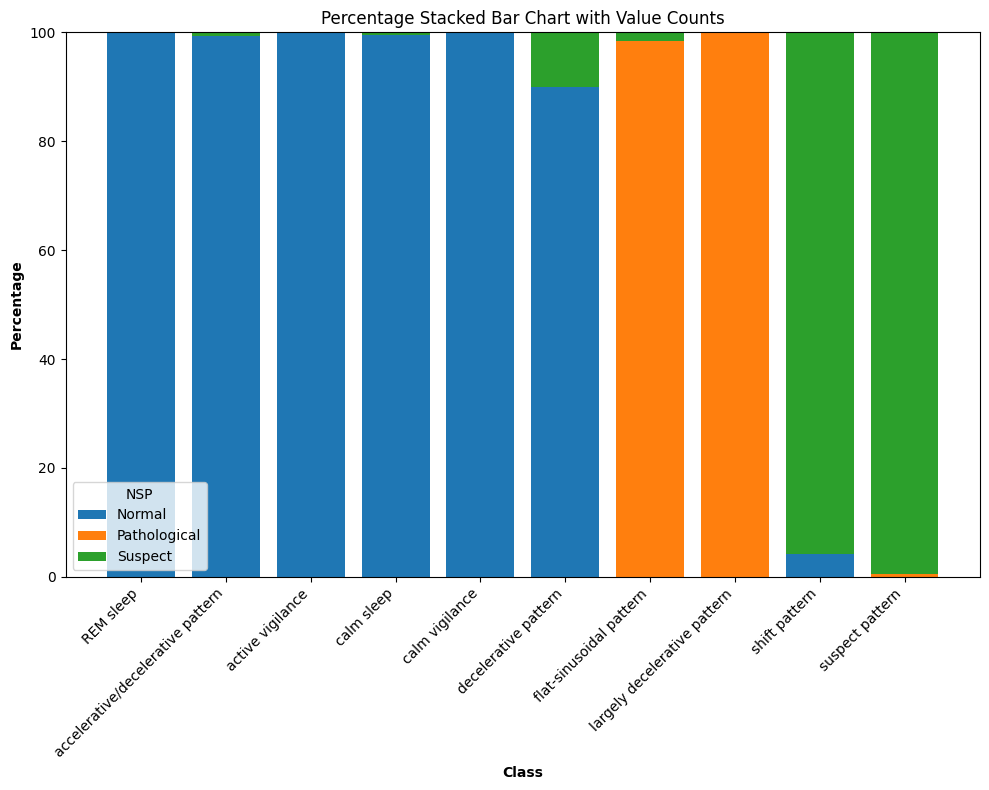

In [ ]:

# Define the label map for 'CLASS' column
label_map_class = {
    1: 'calm sleep',
    2: 'REM sleep',
    3: 'calm vigilance',
    4: 'active vigilance',
    5: 'shift pattern',
    6: 'accelerative/decelerative pattern',
    7: 'decelerative pattern',
    8: 'largely decelerative pattern',
    9: 'flat-sinusoidal pattern',
    10: 'suspect pattern'
}

label_map = {3: 'Pathological', 2: 'Suspect', 1: 'Normal'}
df['NSP_mapped'] = df['NSP'].map(label_map)

# Map the values in the 'CLASS' column to the custom labels
df['CLASS_mapped'] = df['CLASS'].map(label_map_class)

# Create a function to expand the DataFrame
def expand_df(df, target_count=1000):
    expanded_df = pd.DataFrame()
    for class_value in df['CLASS'].unique():
        class_df = df[df['CLASS'] == class_value]
        repeats = target_count // len(class_df) + 1
        expanded_class_df = pd.concat([class_df] * repeats, ignore_index=True).iloc[:target_count]
        expanded_df = pd.concat([expanded_df, expanded_class_df], ignore_index=True)
    return expanded_df

# Expand the DataFrame to have at least 1000 counts per class
df_expanded = expand_df(df)

# Get value counts for each category and subcategory
counts = df_expanded.groupby('CLASS_mapped')['NSP_mapped'].value_counts().unstack().fillna(0)

# Normalize the counts to get percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Define the positions of the bars
r = range(len(percentages))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figsize as needed

# Plot each subcategory as a stacked bar
bottom = np.zeros(len(percentages))
for subcategory in percentages.columns:
    ax.bar(r, percentages[subcategory], bottom=bottom, label=subcategory)
    bottom += percentages[subcategory]

# Add xticks on the middle of the group bars
ax.set_xlabel('Class', fontweight='bold')
ax.set_xticks(r)
ax.set_xticklabels(percentages.index, rotation=45, ha='right')  # Rotate x-ticks if labels are long

# Add y label
ax.set_ylabel('Percentage', fontweight='bold')

# Set y-axis limit (you can adjust these limits as needed)
ax.set_ylim(0, 100)  # Percentage always ranges from 0 to 100

# Add title
ax.set_title('Percentage Stacked Bar Chart with Value Counts')

# Create legend
ax.legend(title='NSP',loc='lower left')

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [ ]:
# sns.pairplot(df)
# plt.show()

<Axes: xlabel='UC', ylabel='AC'>

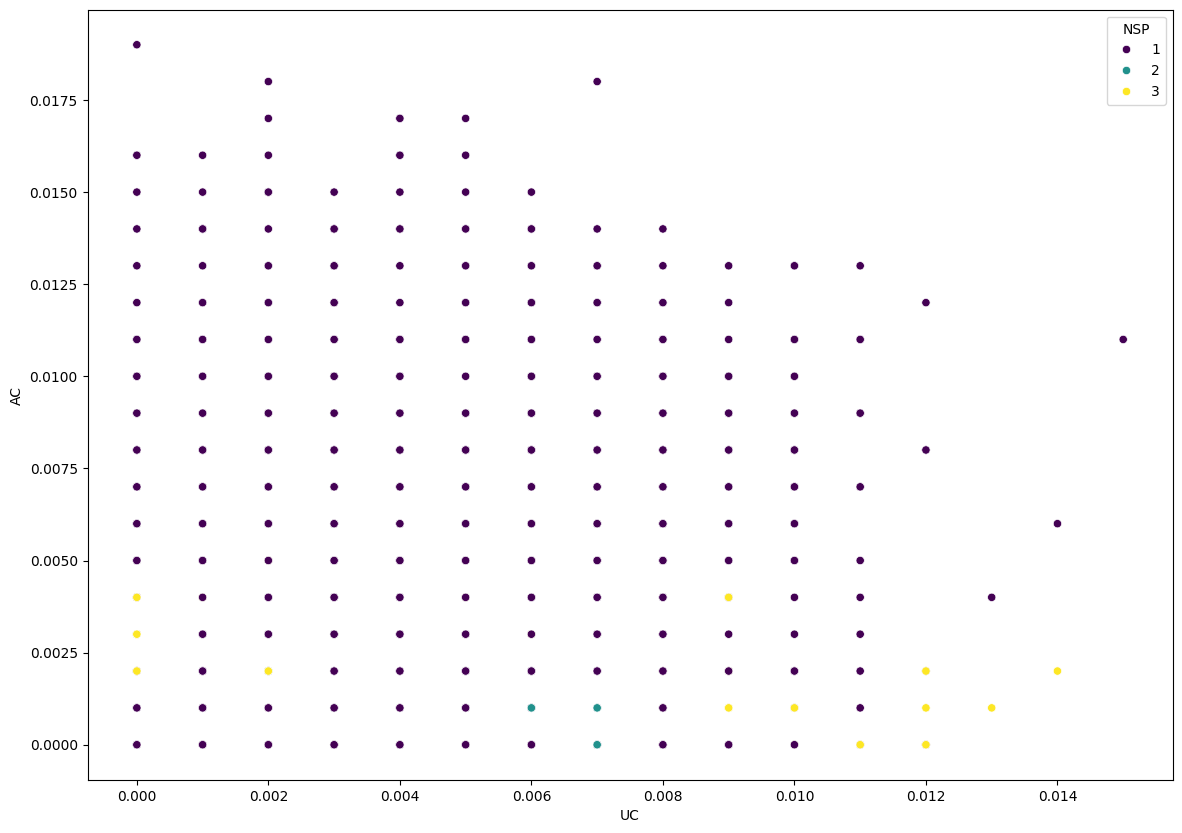

In [ ]:
sns.scatterplot(data=df, x='UC', y='AC', hue='NSP', palette='viridis')

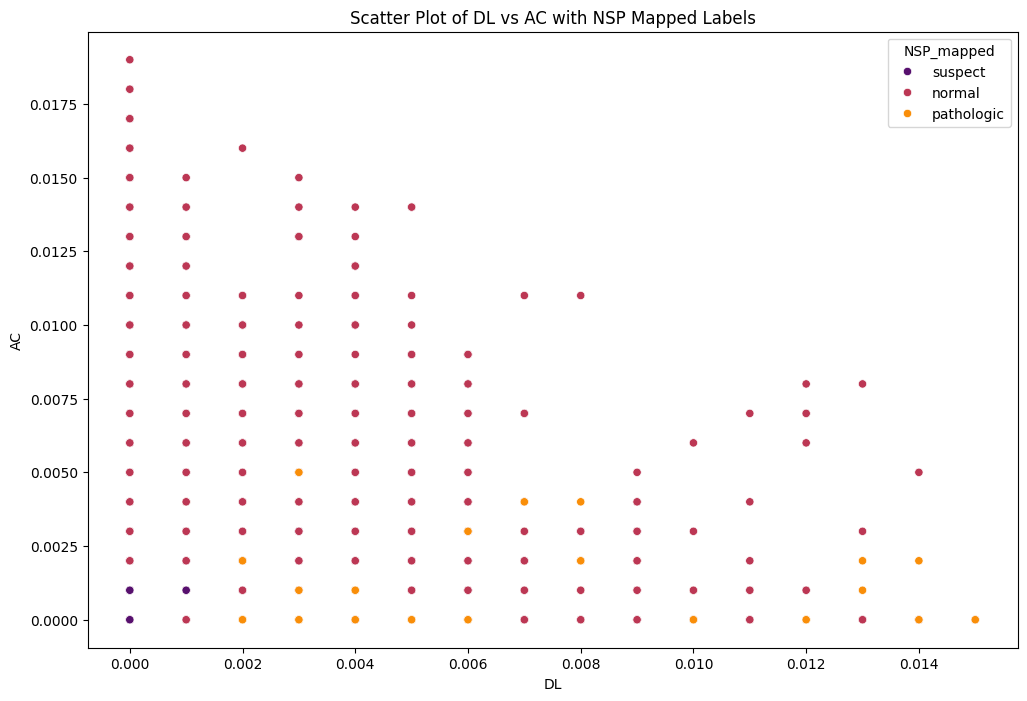

In [ ]:
# Define the mapping for NSP
nsp_map = {1: 'normal', 2: 'suspect', 3: 'pathologic'}

# Create a new column with the mapped values
df['NSP_mapped'] = df['NSP'].map(nsp_map)

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create the scatter plot using the new column for hue
sns.scatterplot(data=df, x='DL', y='AC', hue='NSP_mapped', palette='inferno')

# Add labels and title
plt.xlabel('DL')
plt.ylabel('AC')
plt.title('Scatter Plot of DL vs AC with NSP Mapped Labels')

# Show the plot
plt.show()


<Axes: xlabel='FM', ylabel='DL'>

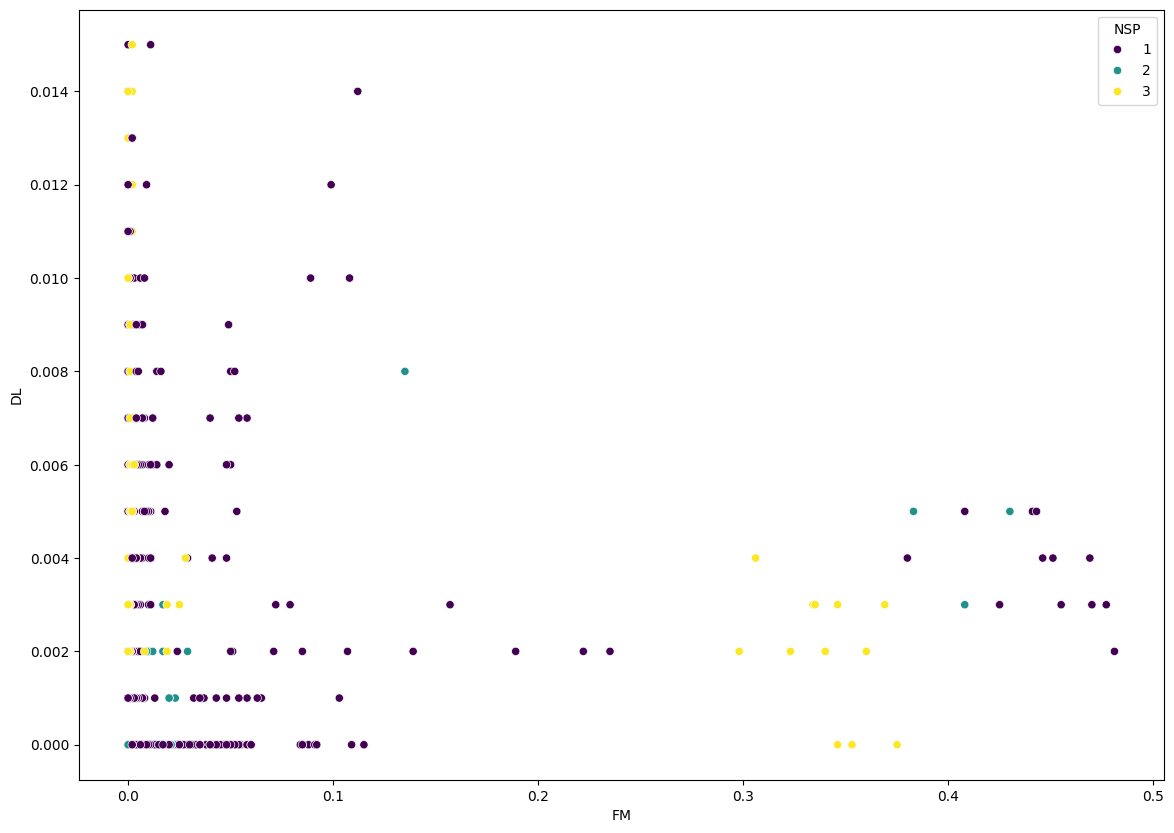

In [ ]:
sns.scatterplot(data=df, x='FM', y='DL', hue='NSP', palette='viridis')

<Axes: xlabel='FM', ylabel='AC'>

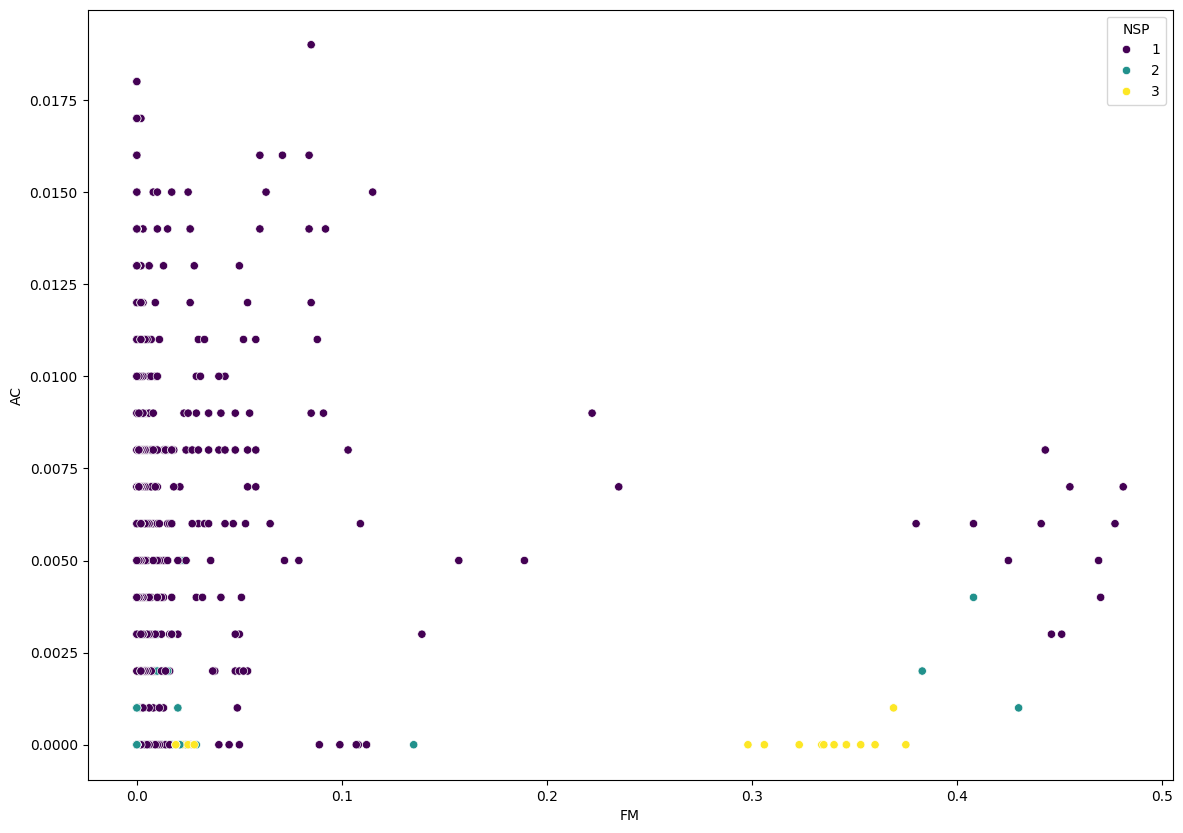

In [ ]:
sns.scatterplot(data=df, x='FM', y='AC', hue='NSP', palette='viridis')

<Axes: xlabel='UC', ylabel='AC'>

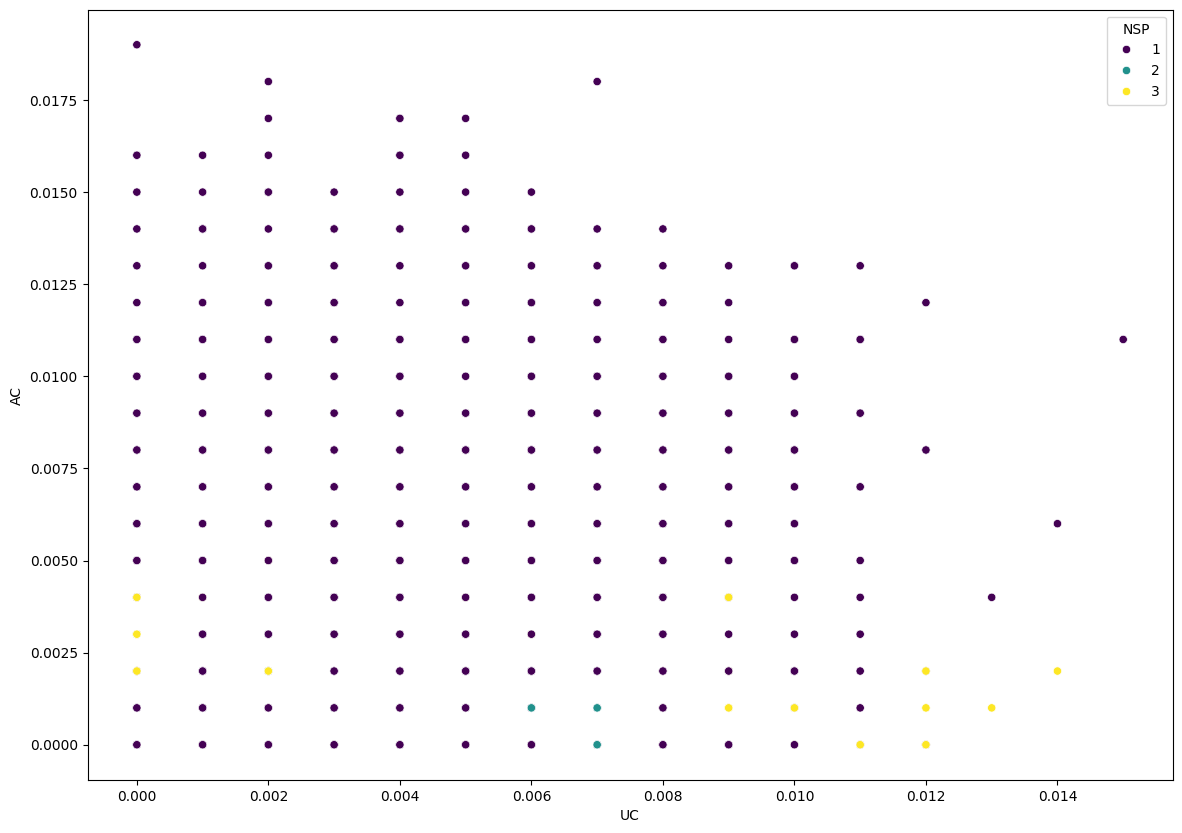

In [ ]:
sns.scatterplot(data=df, x='UC', y='AC', hue='NSP', palette='viridis')

# **Dimensionality Reduction**

In [ ]:
#@title Retrieve train test split data
filepath = "/content/drive/MyDrive/A0_DS397/Computational"

X1_train = pd.read_csv(f"{filepath}/X1_train.csv")
X1_test = pd.read_csv(f"{filepath}/X1_test.csv")
y1_train = pd.read_csv(f"{filepath}/y1_train.csv")
y1_test = pd.read_csv(f"{filepath}/y1_test.csv")

X2_train = pd.read_csv(f"{filepath}/X2_train.csv")
X2_test = pd.read_csv(f"{filepath}/X2_test.csv")
y2_train = pd.read_csv(f"{filepath}/y2_train.csv")
y2_test = pd.read_csv(f"{filepath}/y2_test.csv")


In [ ]:
#@title Fix Labels
y1_train = y1_train-1
y1_test = y1_test-1
y2_train = y2_train-1
y2_test = y2_test-1

# Convert y dataframes into list of integers
y1_train = y1_train['0'].tolist()
y1_train = [int(x) for x in y1_train]

y1_test = y1_test['0'].tolist()
y1_test = [int(x) for x in y1_test]

y2_train = y2_train['0'].tolist()

y2_test = y2_test['0'].tolist()

y1 = np.r_[y1_train,y1_test]
y2 = np.r_[y2_train,y2_test]

## **Principal Component Analysis**

In [ ]:
# Concatenate the DataFrames along the rows
combined_Xdata = pd.concat([X1_train, X1_test])

# Write the combined DataFrame to a new CSV file
combined_Xdata.to_csv('combined_X_data.csv', index=False)

# Read the combined CSV file into a pandas DataFrame
X_data = pd.read_csv('combined_X_data.csv')

# Get the shape of the DataFrame
shape = X_data.shape

# Print the shape
print("Shape of combined_file.csv:", shape)

Shape of combined_file.csv: (2126, 21)


In [ ]:
# Normalize the data

X_data_mean = np.mean(X_data, axis=0)
X_data_std = np.std(X_data, axis=0)
X_data_scaled = (X_data - X_data_mean) / X_data_std

N = X_data_scaled.shape[0]

In [ ]:
# Compute the covariance matrix
C = np.dot(X_data_scaled.T, X_data_scaled) / N
# print("Covariance Matrix:")
# print(C)

In [ ]:
# Compute the eigenvalues and eigenvectors of the covariance matrix

eigvals, eigvecs = np.linalg.eig(C)
# print("Eigenvectors (each column):")
# print(eigvecs)
# print("Eigenvalues (each element):")
# print(eigvals)

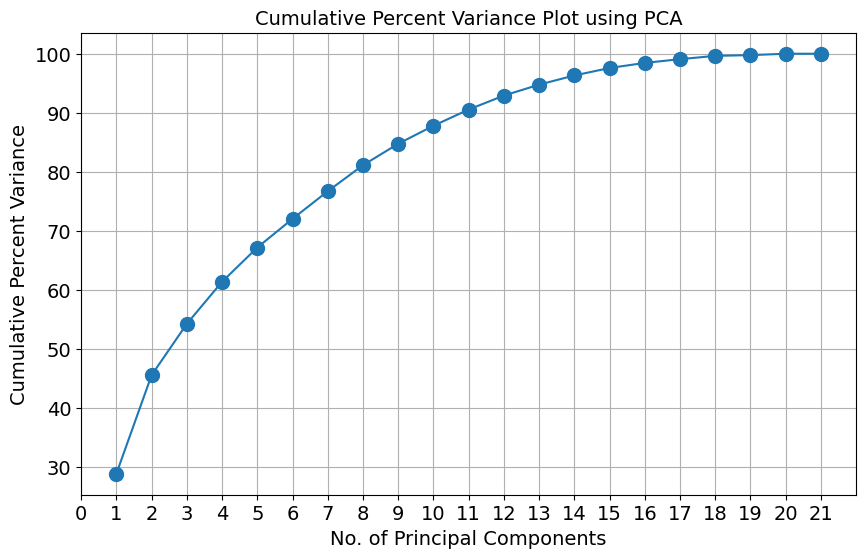

1 6.058351206530137 28.8492914596673
2 3.5077794874092985 45.55300330447347
3 1.824322608178272 54.2402538196081
4 1.4967190126386496 61.36748721312547
5 1.218359009832087 67.16919678375444
6 1.020172373386999 72.02716046654967
7 0.9817712587988849 76.70226169892533
8 0.9265324651799602 81.11432105692514
9 0.7624280600704533 84.74493086678442
10 0.6402045501790167 87.79352396287499
11 0.577284045426913 90.54249560776505
12 0.4973145902166028 92.91066032308221
13 0.38850286890600466 94.76067398453938
14 0.3270315649938634 96.31796715117682
15 0.2654307817579092 97.58192325478592
16 0.1808172647705779 98.44295784893153
17 0.13314732616475722 99.07699273543037
18 0.11752809665913021 99.63665033856908
19 0.026789135239289986 99.76421764923235
20 0.04951429366121104 100.00000000000004
21 6.786862210831619e-16 100.00000000000004


In [ ]:
# Solve the Cumulative Percent Variance (CPV)

cpv = np.cumsum(eigvals) / np.sum(eigvals) * 100
plt.figure(figsize=(10, 6))
plt.plot(range(1,len(eigvals)+1),cpv,'o-', markersize=10)
plt.title('Cumulative Percent Variance Plot using PCA', fontsize=14)
# plt.xlabel('No. of eigenvalues')
plt.xlabel('No. of Principal Components', fontsize=14)
plt.ylabel('Cumulative Percent Variance', fontsize=14)
plt.xticks(np.arange(0, len(eigvals)+1, 1), fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

for i, (eigval, cpv) in zip(range(1, len(eigvals) + 1), zip(eigvals, cpv)):
    print(i, eigval, cpv)

In [ ]:
class PCAScatterPlot2D:
    def __init__(self, data, x_label='PC 1', y_label='PC 2', title='Scatter Plot of PCA Data'):
        self.data = data
        self.x_label = x_label
        self.y_label = y_label
        self.title = title

    def plot(self):
        plt.figure(figsize=(8, 6))
        for nsp_val, color in target_names.items():
            subset = self.data[self.data['NSP'] == nsp_val]
            plt.scatter(subset['PC 1'], subset['PC 2'], label=color)

        plt.xlabel(self.x_label, fontsize=14)
        plt.ylabel(self.y_label, fontsize=14)
        plt.title(self.title)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend()
        plt.show()

In [ ]:
# Project only using the first 2 principal components (eigenvectors)
scores = X_data_scaled @ eigvecs[:,:2]      #. Y = XP

print(scores)

             0         1
0    -5.245096 -0.227815
1    -0.407879 -0.441143
2    -0.756882 -1.948893
3    -1.656119 -1.095215
4    -2.826408 -1.047433
...        ...       ...
2121 -1.314371 -0.318560
2122 -0.669805 -1.094643
2123  0.148962  1.595190
2124 -1.505207 -0.876956
2125  0.273175  1.540309

[2126 rows x 2 columns]


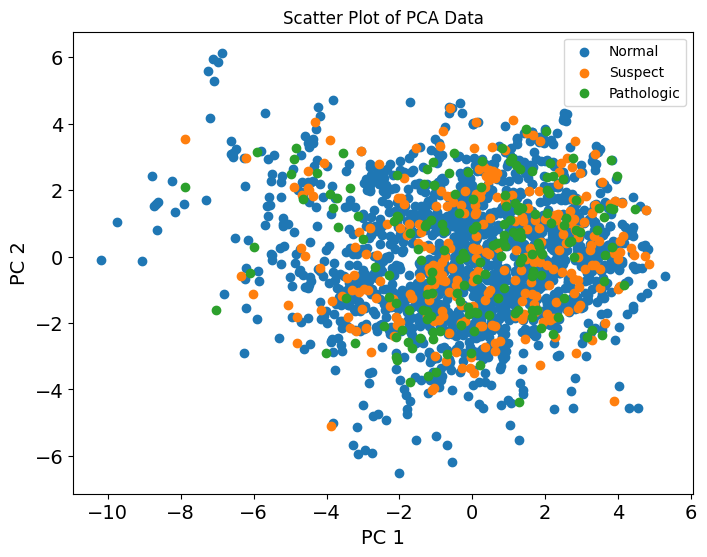

In [ ]:
# Project only using the first 2 principal components (eigenvectors)
scores = X_data_scaled @ eigvecs[:,:2]      #. Y = XP

# Visualize the PC scores
pca = pd.DataFrame(np.hstack((scores, y2.reshape(-1,1))))
pca.columns = columns=['PC 1', 'PC 2', 'NSP']

#target_names = {'Normal': 0, 'Suspect': 1, 'Pathologic': 2}
target_names = {0:'Normal', 1:'Suspect', 2:'Pathologic'}

scatter_plot = PCAScatterPlot2D(pca)
scatter_plot.plot()

# plt.xlabel('PC 1', fontsize=14)
# plt.ylabel('PC 2', fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.show()

## **T-SNE**

In [ ]:
# Concatenate the DataFrames along the rows
combined_Xdata = np.r_[X2_train, X2_test]
combined_y2data = np.r_[y2_train, y2_test]

# # Write the combined DataFrame to a new CSV file
# combined_Xdata.to_csv('combined_X_data.csv', index=False)
# combined_y2data.to_csv('combined_y2_data.csv', index=False)

# # Read the combined CSV file into a pandas DataFrame
# X_data = pd.read_csv('combined_X_data.csv')
# y2_data = pd.read_csv('combined_y2_data.csv')

# # Get the shape of the DataFrame
# shape_X_data = X_data.shape
# shape_y2_data = y2_data.shape

# # Print the shape
# print("Shape of combined_X_data.csv:", shape_X_data)
# print("Shape of combined_y2_data.csv:", shape_y2_data)

In [ ]:
class tSNEScatterPlot3D:
    def __init__(self, data, x_label='t-SNE 1', y_label='t-SNE 2', z_label='t-SNE 3', title='Scatter Plot of t-SNE Data'):
        self.data = data
        self.x_label = x_label
        self.y_label = y_label
        self.z_label = z_label
        self.title = title

    def plot(self):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')

        for nsp_val, color in target_names.items():
            subset = self.data[self.data['NSP'] == nsp_val]
            ax.scatter(subset['t-SNE 1'], subset['t-SNE 2'], subset['t-SNE 3'], label=color)

        ax.set_xlabel(self.x_label)
        ax.set_ylabel(self.y_label)
        ax.set_zlabel(self.z_label)
        ax.set_title(self.title)
        plt.legend()
        plt.show()

# **Model Training and Testing: Artificial Neural Network (ANN)**

In [ ]:
#@title Retrieve train test split data
filepath = "/content/drive/MyDrive/A0_DS397/Computational"

X1_train = pd.read_csv(f"{filepath}/X1_train.csv")
X1_test = pd.read_csv(f"{filepath}/X1_test.csv")
y1_train = pd.read_csv(f"{filepath}/y1_train.csv")
y1_test = pd.read_csv(f"{filepath}/y1_test.csv")

X2_train = pd.read_csv(f"{filepath}/X2_train.csv")
X2_test = pd.read_csv(f"{filepath}/X2_test.csv")
y2_train = pd.read_csv(f"{filepath}/y2_train.csv")
y2_test = pd.read_csv(f"{filepath}/y2_test.csv")


## Model KPCA Layer with ANN

In [ ]:
#@title Normalize the Data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_distances

# For this we only need to normalized the features data
scalerX = StandardScaler()
X2train_scaled = scalerX.fit_transform(X2_train)
X2test_scaled = scalerX.transform(X2_test)

In [ ]:
#@title Kernel PCA

# Define the kernel function
def kernel_func(x1, x2, kw):
    return np.exp(-pairwise_distances(x1, x2, metric='sqeuclidean') / kw ** 2)

# Perform Kernel PCA
def kernel_pca(X_train_scaled, X_test_scaled, n_components=200, kw=10):
    N_train = X_train_scaled.shape[0]
    N_test = X_test_scaled.shape[0]

    K_train = kernel_func(X_train_scaled, X_train_scaled, kw)

    U_train = np.ones((N_train, N_train)) / N_train
    K_train_cent = K_train - U_train @ K_train - K_train @ U_train + U_train @ K_train @ U_train

    eigvals, eigvecs = np.linalg.eig(K_train_cent / N_train)
    idx = (-eigvals).argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    eigvals = np.real(eigvals); eigvecs = np.real(eigvecs)

    P = eigvecs[:, :n_components] @ np.diag(eigvals[:n_components] ** -0.5)
    X_train_pca = K_train_cent @ P

    K_test = kernel_func(X_test_scaled, X_train_scaled, kw)
    U_test = np.ones((N_test, N_train)) / N_train
    K_test_cent = K_test - U_test @ K_train - K_test @ U_train + U_test @ K_train @ U_train
    X_test_pca = K_test_cent @ P

    return X_train_pca, X_test_pca, eigvals, eigvecs

X2_train_pca, X2_test_pca, eigvals, eigvecs = kernel_pca(X2train_scaled, X2test_scaled)

print(f"Shape of Training Data {X2_train_pca.shape}")
print(f"Shape of Testing Data {X2_test_pca.shape}")

Shape of Training Data (1488, 200)
Shape of Testing Data (638, 200)


In [ ]:
#@title Train Neural Network for Target 2 with KPCA as input layer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.losses import categorical_focal_crossentropy
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

# Convert labels to one-hot encoding
y2_train_categorical = to_categorical(y2_train)
y2_test_categorical = to_categorical(y2_test)


# Define the model
model_kpca = Sequential()
model_kpca.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), input_dim=X2_train_pca.shape[1], activation='relu'))
model_kpca.add(layers.Dropout(0.1))
model_kpca.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_kpca.add(layers.Dropout(0.1))
model_kpca.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_kpca.add(layers.Dropout(0.1))
model_kpca.add(Dense(y2_train_categorical.shape[1], activation='softmax'))

# Compile the model
model_kpca.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_kpca = model_kpca.fit(X2_train_pca, y2_train_categorical, epochs=500, batch_size=100, validation_data=(X2_test_pca, y2_test_categorical))

# Evaluate the model
train_loss, train_accuracy = model_kpca.evaluate(X2_train_pca, y2_train_categorical)
test_loss, test_accuracy = model_kpca.evaluate(X2_test_pca, y2_test_categorical)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/500
15/15 [==============================] - 2s 33ms/step - loss: 2.5398 - accuracy: 0.5780 - val_loss: 2.1165 - val_accuracy: 0.7821
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 1.9515 - accuracy: 0.8065 - val_loss: 1.7150 - val_accuracy: 0.8464
Epoch 3/500
15/15 [==============================] - 0s 6ms/step - loss: 1.6003 - accuracy: 0.8535 - val_loss: 1.4682 - val_accuracy: 0.8589
Epoch 4/500
15/15 [==============================] - 0s 7ms/step - loss: 1.4118 - accuracy: 0.8642 - val_loss: 1.3023 - val_accuracy: 0.8762
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 1.2632 - accuracy: 0.8730 - val_loss: 1.1776 - val_accuracy: 0.8856
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 1.1371 - accuracy: 0.8925 - val_loss: 1.0801 - val_accuracy: 0.8950
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 1.0386 - accuracy: 0.8931 - val_loss: 1.0034 - val_accuracy: 0.8934
Epoch 8/500


In [ ]:
#@title Confusion Matrix
# Assuming your ANN models output probabilities, convert them to class labels
ANN_KPCA_train = np.argmax(model_kpca.predict(X2_train_pca), axis=1)
ANN_KPCA_test = np.argmax(model_kpca.predict(X2_test_pca), axis=1)

# Compute confusion matrices of ANN with converted class labels
ANN_cm_train_KPCA = confusion_matrix(y2_train, ANN_KPCA_train-1)
ANN_cm_test_KPCA = confusion_matrix(y2_test,  ANN_KPCA_test-1)

20/20 [==============================] - 0s 2ms/step


# Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
#@title SMOTE Installation
!pip install Imblearn

In [ ]:
#@title Data Augmentation
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data for Target 1
smote = SMOTE(random_state=42)
X1_train_, y1_train_ = smote.fit_resample(X1_train, y1_train)

# Apply SMOTE to the training data for Target 2
X2_train_, y2_train_ = smote.fit_resample(X2_train, y2_train)

#Shape of the Augmeneted Data

print(f"{X1_train_.shape}")
print(f"{y1_train_.shape}")
print(f"{X2_train_.shape}")
print(f"{y2_train_.shape}")

# print(f"{X1_test_.shape}")
# print(f"{X2_test_.shape}")
# print(f"{y1_test_.shape}")
# print(f"{y2_test_.shape}")

(4050, 21)
(4050, 1)
(3474, 21)
(3474, 1)


In [ ]:
#@title Use LabelEncoder to fix the labelling
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Separate encoders for y1 and y2
# encoder1 = LabelEncoder()
# encoder2 = LabelEncoder()
# encoder3 = LabelEncoder()
# encoder4 = LabelEncoder()
# encoder5 = LabelEncoder()



#With Smote
# Fit the encoders
# encoder1.fit(y1_train_)
# encoder2.fit(y1_test_)
# encoder3.fit(y2_train_)
# encoder4.fit(y2_test_)

# Transform the labels
# y1_train_target = encoder1.transform(y1_train_).reshape(-1,1)
# y1_test_target = encoder2.transform(y1_test_).reshape(-1,1)
# y2_train_target = encoder3.transform(y2_train_).reshape(-1,1)
# y2_test_target = encoder4.transform(y2_test_).reshape(-1,1)

y1_train_target = (y1_train_ - 1).to_numpy()
y1_test_target = (y1_test-1).to_numpy()
y2_train_target = (y2_train_-1).to_numpy()
y2_test_target = (y2_test-1).to_numpy()


print(f"Training Target 1 (class) unique values {np.unique(y1_train_target)}")
print(f" Training Target 2 (NSP) unique values {np.unique(y2_train_target)}")
print(f"Test Target 1 (class) unique values {np.unique(y1_test_target)}")
print(f" Test Target 2 (NSP) unique values {np.unique(y2_test_target)}")

Training Target 1 (class) unique values [0 1 2 3 4 5 6 7 8 9]
 Training Target 2 (NSP) unique values [0 1 2]
Test Target 1 (class) unique values [0 1 2 3 4 5 6 7 8 9]
 Test Target 2 (NSP) unique values [0 1 2]


In [ ]:
#@title Extracting Data

#Without Smote
X1_train = X1_train.to_numpy()
X1_test = X1_test.to_numpy()


#With Smote
X1_train_ = X1_train_.to_numpy()
# X1_test_ = X1_test_.to_numpy()

print(f"Target 1 (class) unique values {np.unique(y1_train_)}")
print(f" Target 2 (NSP) unique values {np.unique(y2_train_)}")

Target 1 (class) unique values [ 1  2  3  4  5  6  7  8  9 10]
 Target 2 (NSP) unique values [1 2 3]


In [ ]:
#@title  Normalize the data using Standard Scaling
## For this we only need to normalized the features data
scalerX = StandardScaler()
X1_train_scaled = scalerX.fit_transform(X1_train_)
X1_test_scaled = scalerX.transform(X1_test)
X2_train_scaled = scalerX.fit_transform(X2_train_)
X2_test_scaled = scalerX.transform(X2_test)

## **ANN Model 1: Predicting y2 using X matrix**

In [ ]:
#@title Train Neural Network for Target 2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

# Convert labels to one-hot encoding
y2_train_categorical = to_categorical(y2_train_target)
y2_test_categorical = to_categorical(y2_test_target)


# Define the model
# model1 = Sequential()
# model1.add(Dense(32, input_dim=X2_train_scaled.shape[1], activation='relu'))
# model1.add(Dense(64, activation='relu'))
# model1.add(Dense(78, activation='tanh'))
# model1.add(Dense(64, activation='relu'))
# model1.add(Dense(y2_train_categorical.shape[1], activation='softmax'))

model1 = Sequential()
model1.add(Dense(32, kernel_regularizer=regularizers.l2(0.01), input_dim=X2_train_scaled.shape[1], activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(layers.Dropout(0.2))
model1.add(Dense(78, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model1.add(layers.Dropout(0.2))
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(layers.Dropout(0.2))
model1.add(Dense(y2_train_categorical.shape[1], activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=0.001)
optimizer2 = SGD(learning_rate=0.005,momentum=0.9,nesterov=True)

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

# Train the model
history1 = model1.fit(X2_train_scaled, y2_train_categorical, epochs=500, batch_size=35, validation_data=(X2_test_scaled, y2_test_categorical))

# Evaluate the model
train_loss, train_accuracy = model1.evaluate(X2_train_scaled, y2_train_categorical)
test_loss, test_accuracy = model1.evaluate(X2_test_scaled, y2_test_categorical)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/500
100/100 [==============================] - 5s 16ms/step - loss: 2.7363 - accuracy: 0.6721 - val_loss: 2.2576 - val_accuracy: 0.8150
Epoch 2/500
100/100 [==============================] - 1s 8ms/step - loss: 2.1173 - accuracy: 0.8094 - val_loss: 1.8662 - val_accuracy: 0.8511
Epoch 3/500
100/100 [==============================] - 1s 7ms/step - loss: 1.7691 - accuracy: 0.8463 - val_loss: 1.5811 - val_accuracy: 0.8448
Epoch 4/500
100/100 [==============================] - 1s 8ms/step - loss: 1.4916 - accuracy: 0.8656 - val_loss: 1.3683 - val_accuracy: 0.8621
Epoch 5/500
100/100 [==============================] - 1s 6ms/step - loss: 1.2846 - accuracy: 0.8762 - val_loss: 1.2034 - val_accuracy: 0.8558
Epoch 6/500
100/100 [==============================] - 1s 8ms/step - loss: 1.1220 - accuracy: 0.8854 - val_loss: 1.0420 - val_accuracy: 0.8715
Epoch 7/500
100/100 [==============================] - 1s 9ms/step - loss: 0.9810 - accuracy: 0.8895 - val_loss: 0.9337 - val_accuracy: 0.865

## **ANN Model 2: Predicting y1 using X matrix (Reference for model 3 and 4)**

In [ ]:
#@title Train a Neural Network for Target 1
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD


# Convert labels to one-hot encoding
y1_train_categorical = to_categorical(y1_train_target)
y1_test_categorical = to_categorical(y1_test_target)

# Define the model
# model2 = Sequential()
# model2.add(Dense(50, input_dim=X1_train_scaled.shape[1], activation='relu'))
# model2.add(Dense(64, activation='relu'))
# model2.add(Dense(64, activation='tanh'))
# model2.add(Dense(75, activation='relu'))
# model2.add(Dense(y1_train_categorical.shape[1], activation='softmax'))

# Define the model
model2 = Sequential()
model2.add(Dense(50, kernel_regularizer=regularizers.l2(0.01), input_dim=X1_train_scaled.shape[1], activation='relu'))
model2.add(layers.Dropout(0.1))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dropout(0.1))
model2.add(Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dropout(0.1))
model2.add(Dense(75, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.Dropout(0.1))
model2.add(Dense(y1_train_categorical.shape[1], activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=0.003)
optimizer2 = SGD(learning_rate=0.005,momentum=0.9,nesterov=True)

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

# Train the model
history2 = model2.fit(X1_train_scaled, y1_train_categorical, epochs=500, batch_size=150, validation_data=(X1_test_scaled, y1_test_categorical))

# Evaluate the model
train_loss, train_accuracy = model2.evaluate(X1_train_scaled, y1_train_categorical)
test_loss, test_accuracy = model2.evaluate(X1_test_scaled, y1_test_categorical)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/500
27/27 [==============================] - 2s 13ms/step - loss: 4.4283 - accuracy: 0.1662 - val_loss: 4.3857 - val_accuracy: 0.1567
Epoch 2/500
27/27 [==============================] - 0s 5ms/step - loss: 4.1807 - accuracy: 0.3299 - val_loss: 4.1590 - val_accuracy: 0.1787
Epoch 3/500
27/27 [==============================] - 0s 4ms/step - loss: 3.8497 - accuracy: 0.3948 - val_loss: 3.8882 - val_accuracy: 0.1818
Epoch 4/500
27/27 [==============================] - 0s 5ms/step - loss: 3.4893 - accuracy: 0.4368 - val_loss: 3.5647 - val_accuracy: 0.2790
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 3.1938 - accuracy: 0.5015 - val_loss: 3.2803 - val_accuracy: 0.3824
Epoch 6/500
27/27 [==============================] - 0s 5ms/step - loss: 2.9870 - accuracy: 0.5351 - val_loss: 3.0988 - val_accuracy: 0.4185
Epoch 7/500
27/27 [==============================] - 0s 5ms/step - loss: 2.8208 - accuracy: 0.5627 - val_loss: 2.9065 - val_accuracy: 0.4937
Epoch 8/500


In [ ]:
#@title Extract Predicted Labels for Target 1
# For training data
train_predictions = model2.predict(X1_train_scaled)
y1_train_pred = np.argmax(train_predictions, axis=1).reshape(-1,1)

train_comparison = y1_train_target == y1_train_pred

# For testing data
test_predictions = model2.predict(X1_test_scaled)
y1_test_pred  = np.argmax(test_predictions, axis=1).reshape(-1,1)

test_comparison = y1_test_target == y1_test_pred

#Accuracy Should be similar to the model
train_accuracy = np.mean(train_comparison)
test_accuracy = np.mean(test_comparison)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

20/20 [==============================] - 0s 2ms/step
Training Accuracy: 92.67%
Testing Accuracy: 83.70%


In [ ]:
#@title Extract the probabilities and one-hot encoded Target 1

y1_train_probab = model2.predict(X2_train_scaled)
y1_test_probab = model2.predict(X2_test_scaled)

#add y1target_pred to the features
X_y2_train = np.c_[X2_train_scaled, y1_train_probab]
X_y2_test =  np.c_[X2_test_scaled, y1_test_probab]


y1_train_onehot = np.argmax(y1_train_probab, axis=1).reshape(-1,1)
y1_test_onehot = np.argmax(y1_test_probab, axis=1).reshape(-1,1)

y1_train_onehot = to_categorical(y1_train_onehot)
y1_test_onehot = to_categorical(y1_test_onehot)

X_y2_train_onehot = np.c_[X2_train_scaled, y1_train_onehot]
X_y2_test_onehot =  np.c_[X2_test_scaled, y1_test_onehot]

#Printing Dimensions
print(y1_train_probab.shape)
print(X2_train_scaled.shape)
print(X_y2_train.shape)
print(X_y2_test.shape)


20/20 [==============================] - 0s 3ms/step
(3474, 10)
(3474, 21)
(3474, 31)
(638, 31)


## **ANN Model 3: Predicting y2 using X matrix with One-Hot Encoded prediction of y1**

In [ ]:
#@title Training NN with Target 1 as one hot encoded

from keras.optimizers import Adam
from keras.optimizers import SGD

# Convert labels to one-hot encoding
y2_train_categorical = to_categorical(y2_train_target)
y2_test_categorical = to_categorical(y2_test_target)


# Define the model
# model3 = Sequential()
# model3.add(Dense(50, input_dim=X_y2_train_onehot.shape[1], activation='relu'))
# model3.add(Dense(64, activation='relu'))
# model3.add(Dense(78, activation='tanh'))
# model3.add(Dense(64, activation='relu'))
# model3.add(Dense(y2_train_categorical.shape[1], activation='softmax'))


model3 = Sequential()
model3.add(Dense(50, kernel_regularizer=regularizers.l2(0.01), input_dim=X_y2_train_onehot.shape[1], activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(layers.Dropout(0.2))
model3.add(Dense(78, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(layers.Dropout(0.2))
model3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(layers.Dropout(0.2))
model3.add(Dense(y2_train_categorical.shape[1], activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=0.001)
optimizer2 = SGD(learning_rate=0.005,momentum=0.9,nesterov=True)

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

# Train the model
history3 = model3.fit(X_y2_train_onehot, y2_train_categorical, epochs=500, batch_size=32, validation_data=(X_y2_test_onehot, y2_test_categorical))

# Evaluate the model
train_loss, train_accuracy = model3.evaluate(X_y2_train_onehot, y2_train_categorical)
test_loss, test_accuracy = model3.evaluate(X_y2_test_onehot, y2_test_categorical)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/500
109/109 [==============================] - 2s 5ms/step - loss: 3.0126 - accuracy: 0.6229 - val_loss: 2.4402 - val_accuracy: 0.8276
Epoch 2/500
109/109 [==============================] - 0s 4ms/step - loss: 2.2304 - accuracy: 0.8362 - val_loss: 1.9333 - val_accuracy: 0.8715
Epoch 3/500
109/109 [==============================] - 0s 3ms/step - loss: 1.8045 - accuracy: 0.8759 - val_loss: 1.6498 - val_accuracy: 0.8715
Epoch 4/500
109/109 [==============================] - 0s 3ms/step - loss: 1.5057 - accuracy: 0.8949 - val_loss: 1.4213 - val_accuracy: 0.8715
Epoch 5/500
109/109 [==============================] - 0s 4ms/step - loss: 1.2674 - accuracy: 0.9044 - val_loss: 1.2005 - val_accuracy: 0.8809
Epoch 6/500
109/109 [==============================] - 0s 3ms/step - loss: 1.0836 - accuracy: 0.9064 - val_loss: 1.0624 - val_accuracy: 0.8856
Epoch 7/500
109/109 [==============================] - 0s 4ms/step - loss: 0.9409 - accuracy: 0.9113 - val_loss: 0.9051 - val_accuracy: 0.8918

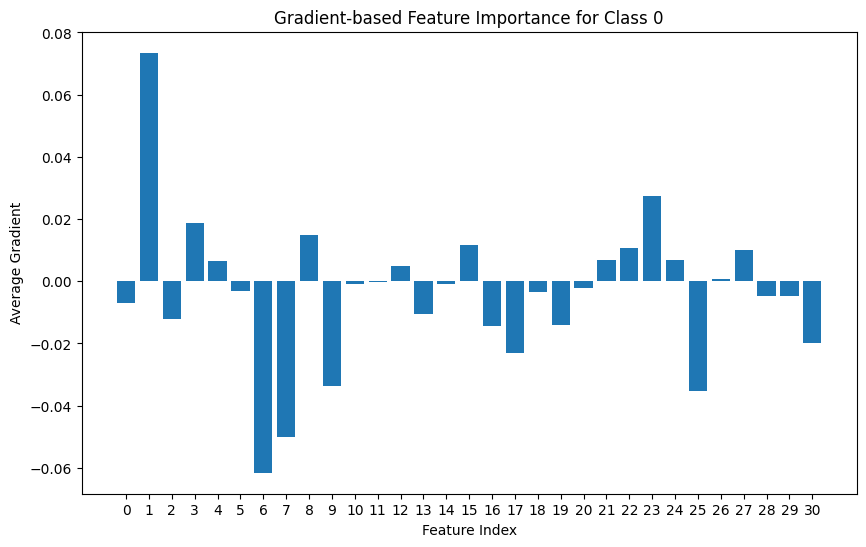

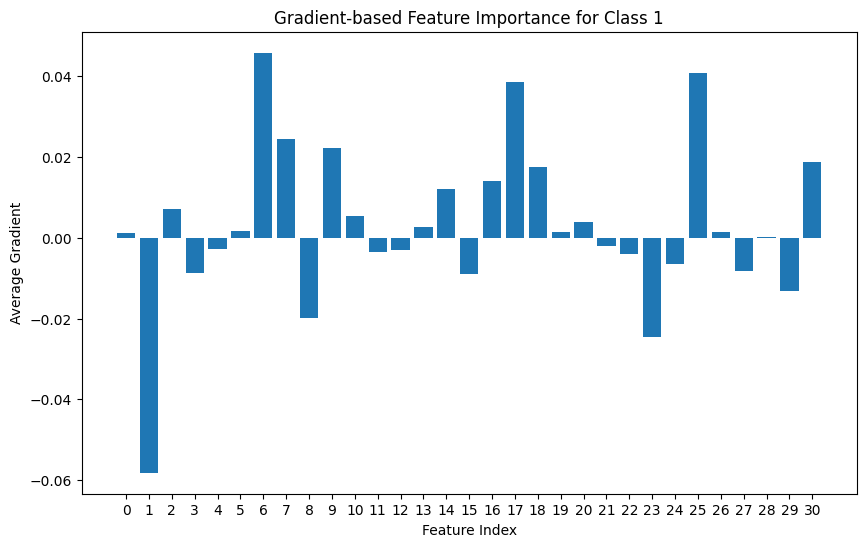

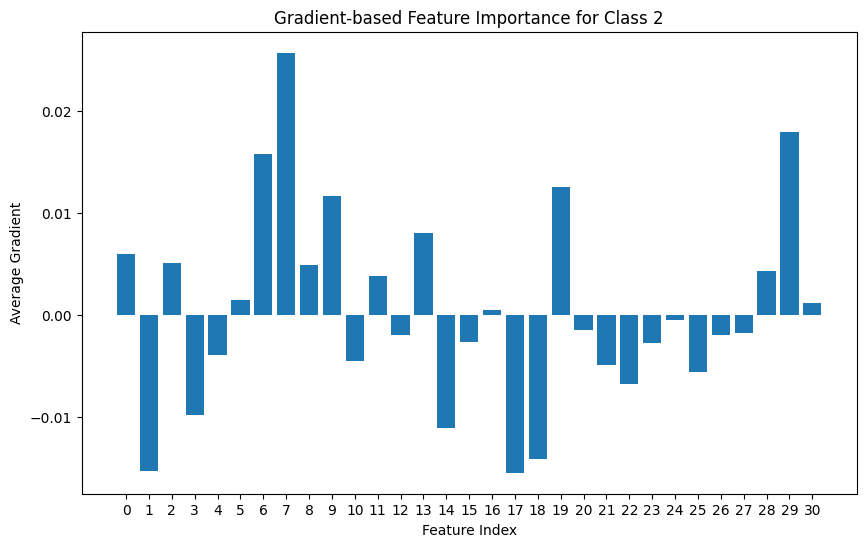

In [ ]:
#@title Gradient-based Feature Importance for multiple samples Target 1 as One-hot
def compute_feature_importance(samples, class_idx):
    gradients_sum = np.zeros(samples.shape[1])

    for sample in samples:
        input_sample = sample.reshape(1, -1)  # Reshape to (1, number of features)
        input_tensor = tf.convert_to_tensor(input_sample, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            predictions = model3(input_tensor)
            loss = predictions[0][class_idx]  # Use the specific class's probability for loss

        gradients = tape.gradient(loss, input_tensor).numpy()
        gradients_sum += gradients[0]

    # Average gradients
    gradients_mean = gradients_sum / samples.shape[0]

    return gradients_mean

# Choose a subset of samples to analyze (you can use the entire dataset if desired)
num_samples = 1000  # Number of samples to use for computing feature importance
samples = X_y2_train_onehot[:num_samples]

# Compute and plot feature importance for each class
for class_idx in range(y2_train_categorical.shape[1]):
    feature_importance = compute_feature_importance(samples, class_idx)

    # Plot the aggregated gradients to visualize feature importance
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel('Feature Index')
    plt.ylabel('Average Gradient')
    plt.title(f'Gradient-based Feature Importance for Class {class_idx}')
    plt.xticks(range(len(feature_importance)))  # Ensure the x-axis represents feature indices correctly
    plt.show()

## **ANN Model 4: Predicting y2 using X matrix with prediction probability of y1**

In [ ]:
#@title Training NN with Target 1 as probabilities
from keras.optimizers import Adam
from keras.optimizers import SGD

# Convert labels to one-hot encoding
y2_train_categorical = to_categorical(y2_train_target)
y2_test_categorical = to_categorical(y2_test_target)


# Define the model
# model4 = Sequential()
# model4.add(Dense(50, input_dim=X_y2_train.shape[1], activation='relu'))
# model4.add(Dense(64, activation='relu'))
# model4.add(Dense(78, activation='tanh'))
# model4.add(Dense(64, activation='relu'))
# model4.add(Dense(y2_train_categorical.shape[1], activation='softmax'))

model4 = Sequential()
model4.add(Dense(50, kernel_regularizer=regularizers.l2(0.001), input_dim=X_y2_train.shape[1], activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dropout(0.2))
model4.add(Dense(78, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dropout(0.2))
model4.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dropout(0.2))
model4.add(Dense(y2_train_categorical.shape[1], activation='softmax'))


# Define the optimizer
optimizer = Adam(learning_rate=0.001)
optimizer2 = SGD(learning_rate=0.005,momentum=0.9,nesterov=True)

# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

# Train the model
history4 = model4.fit(X_y2_train, y2_train_categorical, epochs=500, batch_size=500, validation_data=(X_y2_test, y2_test_categorical))

# Evaluate the model
train_loss, train_accuracy = model4.evaluate(X_y2_train, y2_train_categorical)
test_loss, test_accuracy = model4.evaluate(X_y2_test, y2_test_categorical)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/500
7/7 [==============================] - 2s 87ms/step - loss: 1.3958 - accuracy: 0.3253 - val_loss: 1.3352 - val_accuracy: 0.2853
Epoch 2/500
7/7 [==============================] - 0s 23ms/step - loss: 1.3573 - accuracy: 0.3457 - val_loss: 1.3160 - val_accuracy: 0.3245
Epoch 3/500
7/7 [==============================] - 0s 22ms/step - loss: 1.3146 - accuracy: 0.3949 - val_loss: 1.2970 - val_accuracy: 0.3072
Epoch 4/500
7/7 [==============================] - 0s 25ms/step - loss: 1.2819 - accuracy: 0.4419 - val_loss: 1.2789 - val_accuracy: 0.3339
Epoch 5/500
7/7 [==============================] - 0s 29ms/step - loss: 1.2570 - accuracy: 0.4888 - val_loss: 1.2531 - val_accuracy: 0.4624
Epoch 6/500
7/7 [==============================] - 0s 24ms/step - loss: 1.2217 - accuracy: 0.5354 - val_loss: 1.2219 - val_accuracy: 0.5972
Epoch 7/500
7/7 [==============================] - 0s 20ms/step - loss: 1.1869 - accuracy: 0.6007 - val_loss: 1.1846 - val_accuracy: 0.6897
Epoch 8/500
7/7 [===

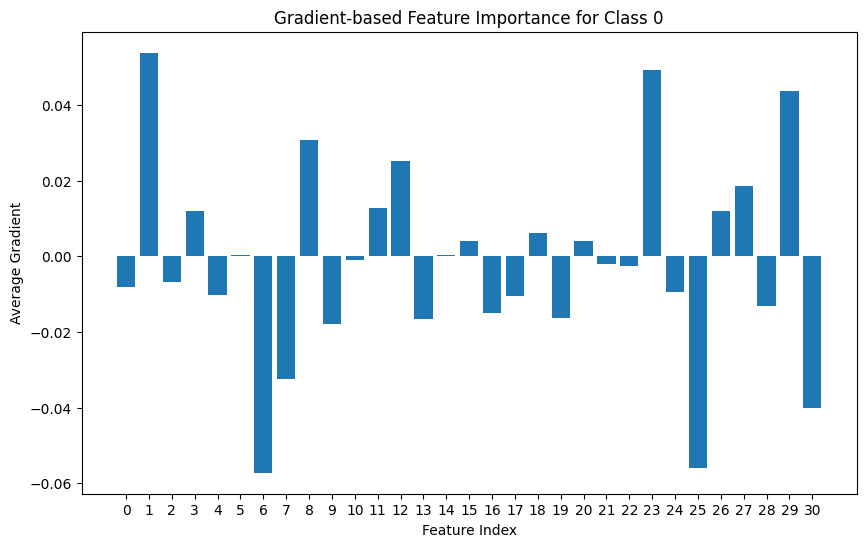

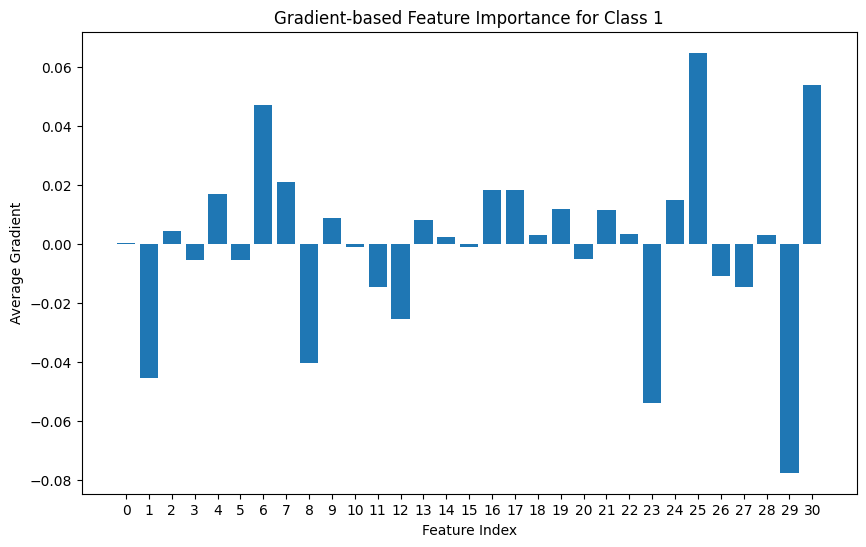

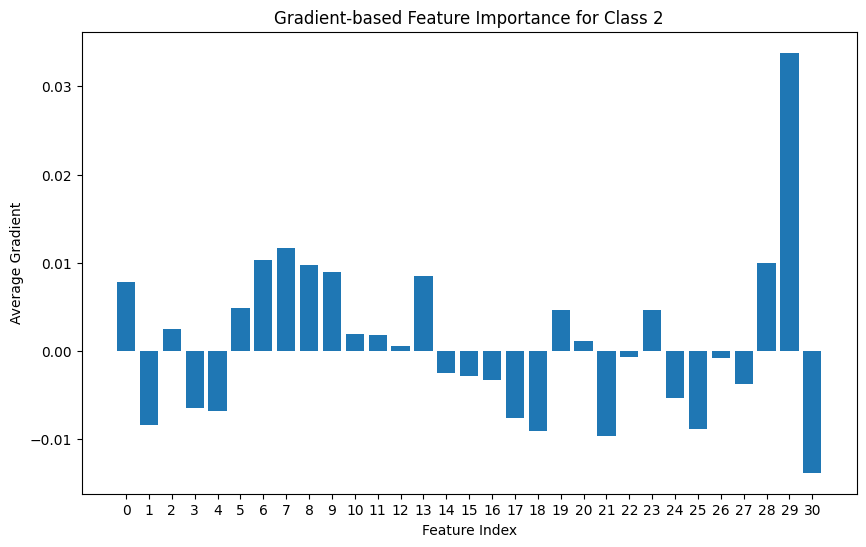

In [ ]:
#@title Gradient-based Feature Importance for multiple samples Target 1 as probabilities
def compute_feature_importance(samples, class_idx):
    gradients_sum = np.zeros(samples.shape[1])

    for sample in samples:
        input_sample = sample.reshape(1, -1)  # Reshape to (1, number of features)
        input_tensor = tf.convert_to_tensor(input_sample, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            predictions = model4(input_tensor)
            loss = predictions[0][class_idx]  # Use the specific class's probability for loss

        gradients = tape.gradient(loss, input_tensor).numpy()
        gradients_sum += gradients[0]

    # Average gradients
    gradients_mean = gradients_sum / samples.shape[0]

    return gradients_mean

# Choose a subset of samples to analyze (you can use the entire dataset if desired)
num_samples = 1000  # Number of samples to use for computing feature importance
samples = X_y2_train[:num_samples]

# Compute and plot feature importance for each class
for class_idx in range(y2_train_categorical.shape[1]):
    feature_importance = compute_feature_importance(samples, class_idx)

    # Plot the aggregated gradients to visualize feature importance
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xlabel('Feature Index')
    plt.ylabel('Average Gradient')
    plt.title(f'Gradient-based Feature Importance for Class {class_idx}')
    plt.xticks(range(len(feature_importance)))  # Ensure the x-axis represents feature indices correctly
    plt.show()

## ANN Model Plots

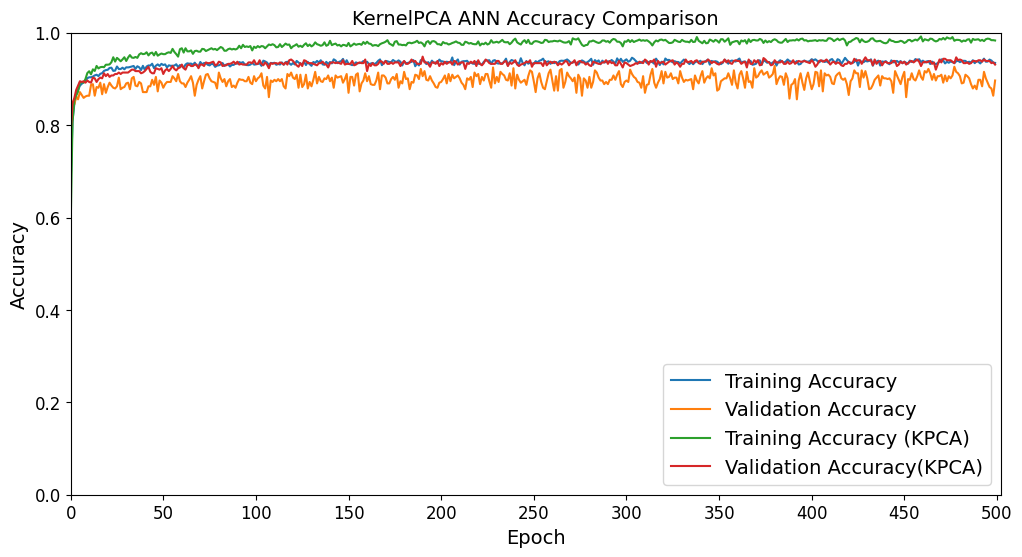

In [ ]:
#@title Plot Accuracy for KernelPCA
plt.subplots(figsize=(12,6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_kpca.history['accuracy'], label='Training Accuracy (KPCA)')
plt.plot(history_kpca.history['val_accuracy'], label='Validation Accuracy(KPCA)')
plt.title('KernelPCA ANN Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
xticks = range(0, 503, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 1.2, 0.2)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fontsize=14)
plt.show()

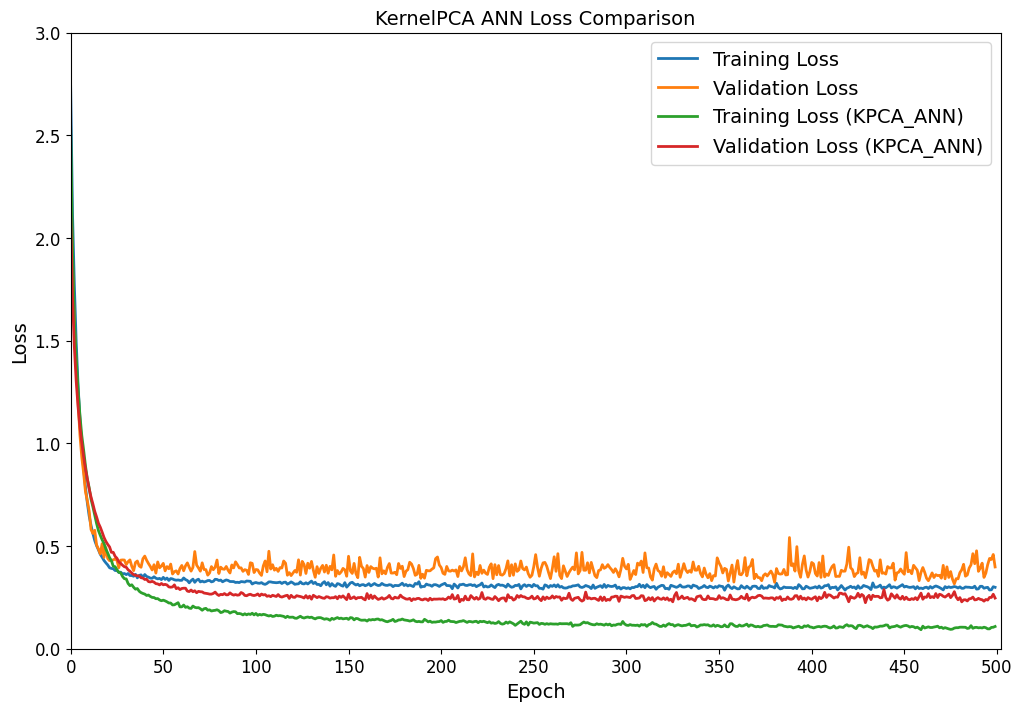

In [ ]:
#@title Plot Loss for KernelPCA
plt.subplots(figsize=(12,8))
plt.plot(history1.history['loss'], label='Training Loss', linewidth=2.0)
plt.plot(history1.history['val_loss'], label='Validation Loss', linewidth=2.0)
plt.plot(history_kpca.history['loss'], label='Training Loss (KPCA_ANN)', linewidth=2.0)
plt.plot(history_kpca.history['val_loss'], label='Validation Loss (KPCA_ANN)', linewidth=2.0)
plt.title('KernelPCA ANN Loss Comparison', fontsize=14)
plt.xlabel('Epoch',  fontsize=14)
plt.ylabel('Loss',  fontsize=14)
xticks = range(0, 502, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 3.5, 0.5)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 3)
plt.legend(loc="upper right", fontsize=14)
plt.show()

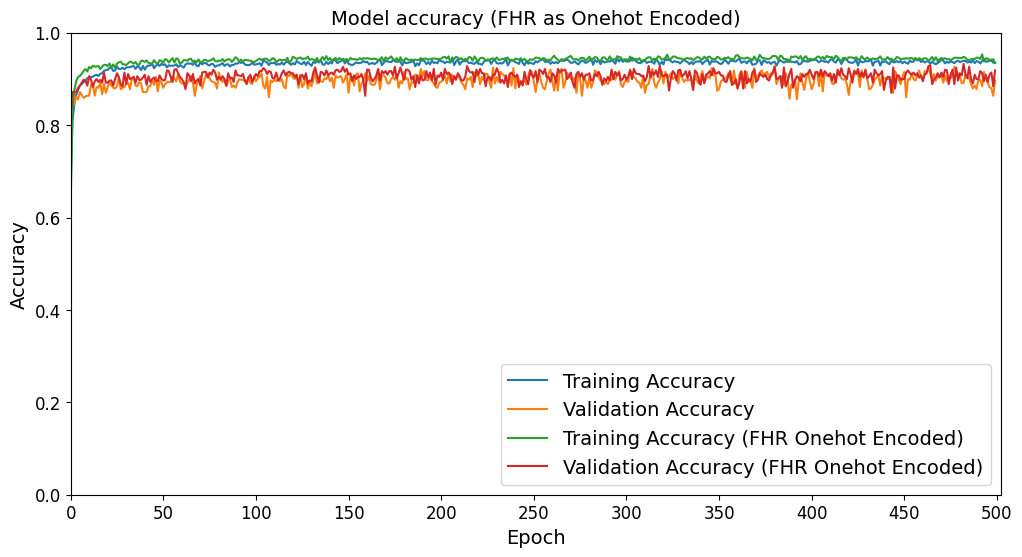

In [ ]:
#@title Plot Accuracy FHR Onehot Encoded
plt.subplots(figsize=(12,6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history3.history['accuracy'], label='Training Accuracy (FHR Onehot Encoded)')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy (FHR Onehot Encoded)')
plt.title('Model accuracy (FHR as Onehot Encoded)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
xticks = range(0, 503, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 1.2, 0.2)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fontsize=14)
plt.show()

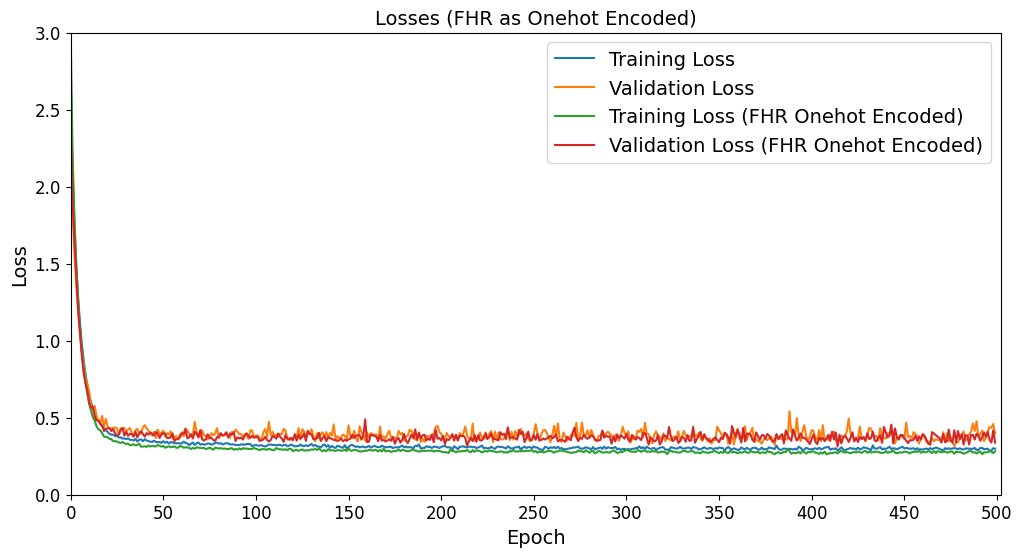

In [ ]:
#@title Plot Loss FHR Onehot Encoded
plt.subplots(figsize=(12,6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history3.history['loss'], label='Training Loss (FHR Onehot Encoded)')
plt.plot(history3.history['val_loss'], label='Validation Loss (FHR Onehot Encoded)')
plt.title('Losses (FHR as Onehot Encoded)', fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('Loss',fontsize=14)
xticks = range(0, 503, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 3.5, 0.5)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 3)
plt.legend(fontsize=14)
plt.show()

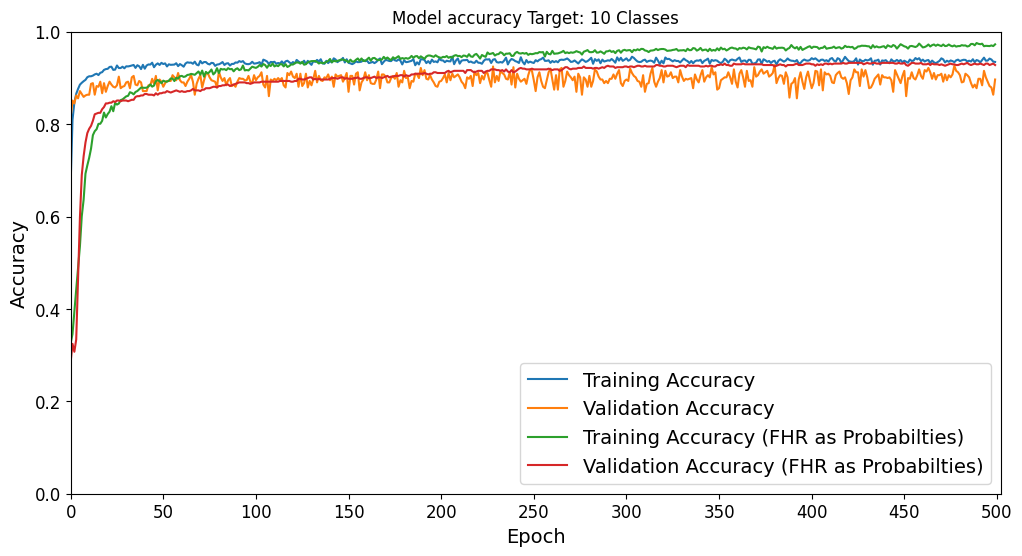

In [ ]:
#@title Plot Accuracy FHR as Probabilities
plt.subplots(figsize=(12,6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history4.history['accuracy'], label='Training Accuracy (FHR as Probabilties)')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy (FHR as Probabilties)')
plt.title('Model accuracy Target: 10 Classes')
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch',fontsize=14)
xticks = range(0, 503, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 1.2, 0.2)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fontsize=14)
plt.show()

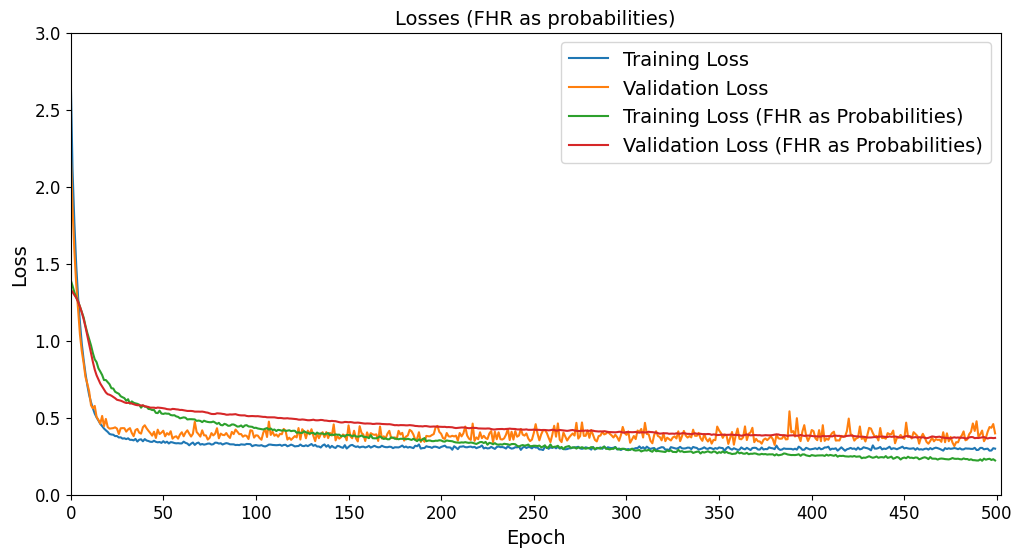

In [ ]:
#@title Plot Loss FHR as Probabilities
plt.subplots(figsize=(12,6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.plot(history4.history['loss'], label='Training Loss (FHR as Probabilities)')
plt.plot(history4.history['val_loss'], label='Validation Loss (FHR as Probabilities)')
plt.title('Losses (FHR as probabilities)', fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.ylabel('Loss',fontsize=14)
xticks = range(0, 503, 50)
plt.xticks(xticks, fontsize=12)
plt.xlim(0,502)
yticks = np.arange(0, 3.5, 0.5)
plt.yticks(yticks, fontsize=12)
plt.ylim(0, 3)
plt.legend(fontsize=14)
plt.show()

# **Model Training and Testing: Light Gradient Boosted Model (LGBM)**

In [ ]:
#@title Retrieve train test split data
filepath = "/content/drive/MyDrive/A0_DS397/Computational"

X1_train = pd.read_csv(f"{filepath}/X1_train.csv")
X1_test = pd.read_csv(f"{filepath}/X1_test.csv")
y1_train = pd.read_csv(f"{filepath}/y1_train.csv")
y1_test = pd.read_csv(f"{filepath}/y1_test.csv")

X2_train = pd.read_csv(f"{filepath}/X2_train.csv")
X2_test = pd.read_csv(f"{filepath}/X2_test.csv")
y2_train = pd.read_csv(f"{filepath}/y2_train.csv")
y2_test = pd.read_csv(f"{filepath}/y2_test.csv")


In [ ]:
#@title Fix Labels
y1_train = y1_train-1
y1_test = y1_test-1
y2_train = y2_train-1
y2_test = y2_test-1

# Convert y dataframes into list of integers
y1_train = y1_train['0'].tolist()
y1_train = [int(x) for x in y1_train]

y1_test = y1_test['0'].tolist()
y1_test = [int(x) for x in y1_test]

y2_train = y2_train['0'].tolist()

y2_test = y2_test['0'].tolist()

y1 = np.r_[y1_train,y1_test]
y2 = np.r_[y2_train,y2_test]

## **LGBM Model 1: Predicting y2 using X matrix**

In [ ]:
# # Define the objective function for Optuna
# def objective(trial):
#     var_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'is_unbalance': True,
#     }

#     fixed_params = {
#         'objective': 'multiclass',
#         'is_unbalance': True,
#         'boosting': 'dart',
#         'num_boost_round': 100,
#         'early_stopping_rounds': 10
#     }

#     params = {**var_params, **fixed_params}
#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),       # Standardize the features
#         ('lgbm', lgb.LGBMClassifier(**params))  # LightGBM classifier with hyperparameters
#     ])

#     # Perform cross-validation
#     scores = cross_val_score(pipeline, X2_train, y2_train, cv=3, scoring='f1_weighted')

#     # Return the average accuracy score
#     return scores.mean()

# # Do optimization
# optimize_y2 = optuna.create_study(direction='maximize')
# optimize_y2.optimize(objective, n_trials=100)


In [ ]:
# y2_best_params = optimize_y2.best_params
# print("Best Hyperparameters:", y2_best_params)

In [ ]:
#Hard-coded best parameters
y2_best_params = {'n_estimators': 193, 'learning_rate': 0.0865245359873105, 'num_leaves': 22, 'max_depth': 6, 'min_child_samples': 10, 'subsample': 0.65498775487153, 'colsample_bytree': 0.7411304663032825}

In [ ]:
# Get the best hyperparameters

fixed_params = {
    'objective': 'multiclass',
    'is_unbalance': True,
    'boosting': 'dart',
    'num_boost_round': 100,
    'early_stopping_rounds': 10
}

y2_params = {**fixed_params, **y2_best_params}


In [ ]:
# # Define custom feature names
# feature_names = ['baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations',
#                  'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_of_short_term_variability',
#                  'abnormal_long_term_variability', 'mean_of_long_term_variability', 'histogram_width', 'low_freq_of_the_histogram',
#                  'high_freq_of_the_histogram', 'number_of_histogram_peaks', 'number_of_histogram_zeros', 'histogram_mode', 'histogram_mean',
#                  'histogram_median', 'histogram_variance', 'histogram_tendency']


In [ ]:
# Define the final pipeline with the best hyperparameters
y2_pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardize the features
    ('lgbm', lgb.LGBMClassifier(**y2_params))  # LightGBM classifier with optimized hyperparameters
])


# Fit the final pipeline to the training data
y2_pipeline.fit(X2_train, y2_train)

# Predict on the test set
y2_test_pred = y2_pipeline.predict(X2_test)

# Predict on the test set
y2_train_pred = y2_pipeline.predict(X2_train)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -0.250739
[LightGBM] [Info] Start training from score -1.972469
[LightGBM] [Info] Start training from score -2.493004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
# Calculate accuracy
y2_train_accuracy = accuracy_score(y2_train, y2_train_pred)
print(f"Train Accuracy: {y2_train_accuracy}")

y2_test_accuracy = accuracy_score(y2_test, y2_test_pred)
print(f"Test Accuracy: {y2_test_accuracy}")

# Evaluate the model
print('Classification Report:')
print(classification_report(y2_test, y2_test_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9482758620689655
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       497
           1       0.86      0.80      0.83        88
           2       0.92      0.92      0.92        53

    accuracy                           0.95       638
   macro avg       0.92      0.90      0.91       638
weighted avg       0.95      0.95      0.95       638



<Figure size 6000x1500 with 0 Axes>

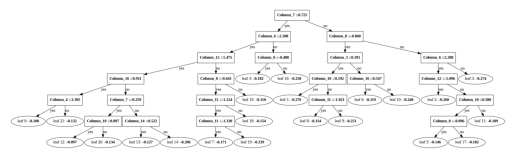

In [ ]:
plt.figure(figsize=(20, 5), dpi=300)
lgb_model = y2_pipeline.named_steps['lgbm']
lgb.plot_tree(lgb_model, tree_index=0, orientation='vertical')
plt.show()

## **LGBM Model 2: Predicting y1 using X matrix (Reference for model 3 and 4)**

In [ ]:
# # Define the objective function for Optuna
# def objective(trial):
#     var_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
#     }

#     fixed_params = {
#         'objective': 'multiclass',
#         'is_unbalance': True,
#         'boosting': 'dart',
#         'num_boost_round': 100,
#         'early_stopping_rounds': 10
#     }

#     params = {**var_params, **fixed_params}

#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),       # Standardize the features
#         ('lgbm', lgb.LGBMClassifier(**params))  # LightGBM classifier with hyperparameters
#     ])

#     # Perform cross-validation
#     scores = cross_val_score(pipeline, X1_train, y1_train, cv=3, scoring='f1_weighted')

#     # Return the average f1_weighted score
#     return scores.mean()

# # Do optimization
# optimize_y1 = optuna.create_study(direction='maximize')
# optimize_y1.optimize(objective, n_trials=100)

In [ ]:
# # Get the best hyperparameters
# y1_best_params = optimize_y1.best_params
# print("Best Hyperparameters:", y1_best_params)

In [ ]:
#Hard-coded best parameter
y1_best_params = {'n_estimators': 53, 'learning_rate': 0.04890565871246302, 'num_leaves': 68, 'max_depth': 8, 'min_child_samples': 30, 'subsample': 0.5406083229904223, 'colsample_bytree': 0.751881094074127}


In [ ]:
fixed_params = {
    'objective': 'multiclass',
    'is_unbalance': True,
    'boosting': 'dart',
    'num_boost_round': 100,
    'early_stopping_rounds': 10
}

y1_params = {**fixed_params, **y1_best_params}

# Define the final pipeline with the best hyperparameters
y1_pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardize the features
    ('lgbm', lgb.LGBMClassifier(**y1_params))  # LightGBM classifier with optimized hyperparameters
])

# Fit the final pipeline to the training data
y1_pipeline.fit(X1_train, y1_train)

# Predict on the test set
y1_test_pred = y1_pipeline.predict(X1_test)

# Predict on the test set
y1_train_pred = y1_pipeline.predict(X1_train)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1194
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 20
[LightGBM] [Info] Start training from score -1.710477
[LightGBM] [Info] Start training from score -1.301301
[LightGBM] [Info] Start training from score -3.694270
[LightGBM] [Info] Start training from score -3.262137
[LightGBM] [Info] Start tra

In [ ]:
# Calculate accuracy
y1_train_accuracy = accuracy_score(y1_train, y1_train_pred)
print(f"Train Accuracy: {y1_train_accuracy}")

y1_test_accuracy = accuracy_score(y1_test, y1_test_pred)
print(f"Test Accuracy: {y1_test_accuracy}")

# Evaluate the model
print('Classification Report:')
print(classification_report(y1_test, y1_test_pred))

Train Accuracy: 0.9717741935483871
Test Accuracy: 0.8714733542319749
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       115
           1       0.88      0.89      0.89       174
           2       0.69      0.69      0.69        16
           3       1.00      0.75      0.86        24
           4       0.79      0.52      0.63        21
           5       0.85      0.88      0.86       100
           6       0.87      0.99      0.93        76
           7       1.00      0.88      0.93        32
           8       0.86      0.86      0.86        21
           9       0.93      0.88      0.90        59

    accuracy                           0.87       638
   macro avg       0.87      0.82      0.84       638
weighted avg       0.87      0.87      0.87       638



## **LGBM  Model 3: Predicting y2 using X matrix with One-Hot Encoded prediction of y1**

In [ ]:
X2y1_train_pred = y1_pipeline.predict(X2_train)
X2y1_test_pred = y1_pipeline.predict(X2_test)

OHEncoder = OneHotEncoder(sparse=False)
X2y1_train_pred_expanded = OHEncoder.fit_transform(X2y1_train_pred.reshape(-1, 1))
X2y1_test_pred_expanded = OHEncoder.transform(X2y1_test_pred.reshape(-1, 1))

Xy1_train = np.c_[X2_train,X2y1_train_pred_expanded]
Xy1_test = np.c_[X2_test,X2y1_test_pred_expanded]


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


In [ ]:
# # Define the objective function for Optuna
# def objective(trial):
#     var_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'is_unbalance': True,
#     }


#     fixed_params = {
#         'objective': 'multiclass',
#         'is_unbalance': True,
#         'boosting': 'dart',
#         'num_boost_round': 100,
#         'early_stopping_rounds': 10
#     }

#     params = {**var_params,**fixed_params}

#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),       # Standardize the features
#         ('lgbm', lgb.LGBMClassifier(**params))  # LightGBM classifier with hyperparameters
#     ])

#     # Perform cross-validation
#     scores = cross_val_score(pipeline, Xy1_train, y2_train, cv=3, scoring='f1_weighted')

#     # Return the average accuracy score
#     return scores.mean()

# # Do optimization
# optimize_y2_chain1 = optuna.create_study(direction='maximize')
# optimize_y2_chain1.optimize(objective, n_trials=100)


In [ ]:
# # Get the best hyperparameters
# y2_chain1_best_params = optimize_y2_chain1.best_params

# print("Best Hyperparameters:", y2_chain1_best_params)

In [ ]:
y2_chain1_best_params = {'n_estimators': 141, 'learning_rate': 0.07029038775490722, 'num_leaves': 59, 'max_depth': 5, 'min_child_samples': 11, 'subsample': 0.8124917845439794, 'colsample_bytree': 0.9051977808572805}


In [ ]:
fixed_params = {
    'objective': 'multiclass',
    'is_unbalance': True,
    'boosting': 'dart',
    'num_boost_round': 100,
    'early_stopping_rounds': 10
}

y2_chain1_params = {**y2_chain1_best_params,**fixed_params}

In [ ]:
# Define the final pipeline with the best hyperparameters
y2_chain1_pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardize the features
    ('lgbm', lgb.LGBMClassifier(**y2_chain1_params))  # LightGBM classifier with optimized hyperparameters
])

# Fit the final pipeline to the training data
y2_chain1_pipeline.fit(Xy1_train, y2_train)

# Predict on the train set
y2_chain1_train_pred = y2_chain1_pipeline.predict(Xy1_train)

# Predict on the test set
y2_chain1_test_pred = y2_chain1_pipeline.predict(Xy1_test)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1216
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 30
[LightGBM] [Info] Start training from score -0.250739
[LightGBM] [Info] Start training from score -1.972469
[LightGBM] [Info] Start training from score -2.493004
[LightGBM] [Warni

In [ ]:
# Calculate accuracy
y2_chain1_train_accuracy = accuracy_score(y2_train, y2_chain1_train_pred)
print(f"Train Accuracy: {y2_chain1_train_accuracy}")

y2_chain1_test_accuracy = accuracy_score(y2_test, y2_chain1_test_pred)
print(f"Test Accuracy: {y2_chain1_test_accuracy}")

# Evaluate the model
print('Classification Report:')
print(classification_report(y2_test, y2_chain1_test_pred))

Train Accuracy: 0.9926075268817204
Test Accuracy: 0.9717868338557993
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       497
           1       0.96      0.85      0.90        88
           2       0.96      0.98      0.97        53

    accuracy                           0.97       638
   macro avg       0.97      0.94      0.95       638
weighted avg       0.97      0.97      0.97       638



<Figure size 6000x1500 with 0 Axes>

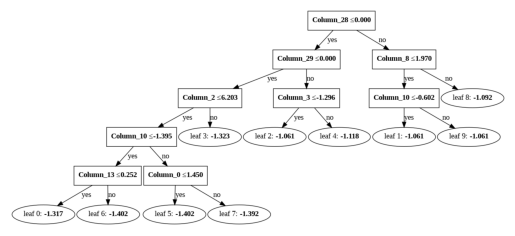

In [ ]:
plt.figure(figsize=(20, 5), dpi=300)
lgb_model = y2_chain1_pipeline.named_steps['lgbm']
lgb.plot_tree(lgb_model, tree_index=2, orientation='vertical')
plt.show()

## **LGBM Model 4: Predicting y2 using X matrix with prediction probability of y1**

In [ ]:
X2y1_train_pred_proba = y1_pipeline.predict_proba(X2_train)
X2y1proba_train = np.c_[X2_train,X2y1_train_pred_proba]

X2y1_test_pred_proba = y1_pipeline.predict_proba(X2_test)
X2y1proba_test = np.c_[X2_test,X2y1_test_pred_proba]

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


In [ ]:
# # Define the objective function for Optuna
# def objective(trial):
#     var_params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 200),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#         'is_unbalance': True,
#     }


#     fixed_params = {
#         'objective': 'multiclass',
#         'is_unbalance': True,
#         'boosting': 'dart',
#         'num_boost_round': 100,
#         'early_stopping_rounds': 10
#     }

#     params = {**var_params,**fixed_params}

#     pipeline = Pipeline([
#         ('scaler', StandardScaler()),       # Standardize the features
#         ('lgbm', lgb.LGBMClassifier(**params))  # LightGBM classifier with hyperparameters
#     ])

#     # Perform cross-validation
#     scores = cross_val_score(pipeline, X2y1proba_train, y2_train, cv=3, scoring='f1_weighted')

#     # Return the average accuracy score
#     return scores.mean()

# # Do optimization
# optimize_y2_chain2 = optuna.create_study(direction='maximize')
# optimize_y2_chain2.optimize(objective, n_trials=100)


In [ ]:
# # Get the best hyperparameters
# y2_chain2_best_params = optimize_y2_chain2.best_params

# print("Best Hyperparameters:", y2_chain2_best_params)

In [ ]:
y2_chain2_best_params = {'n_estimators': 75, 'learning_rate': 0.06131471473108952, 'num_leaves': 68, 'max_depth': 7, 'min_child_samples': 26, 'subsample': 0.7066405083623067, 'colsample_bytree': 0.8606106755269808}

In [ ]:
fixed_params = {
    'objective': 'multiclass',
    'is_unbalance': True,
    'boosting': 'dart',
    'num_boost_round': 100,
    'early_stopping_rounds': 10
}

y2_chain2_params = {**y2_chain2_best_params,**fixed_params}

In [ ]:
# Define the final pipeline with the best hyperparameters
y2_chain2_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', lgb.LGBMClassifier(**y2_chain2_params))
])

# Fit the final pipeline to the training data
y2_chain2_pipeline.fit(X2y1proba_train, y2_train)

# Predict on the train set
y2_chain2_train_pred = y2_chain2_pipeline.predict(X2y1proba_train)

# Predict on the test set
y2_chain2_test_pred = y2_chain2_pipeline.predict(X2y1proba_test)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] early_stopping_round is set=10, early_stopping_rounds=10 will be ignored. Current value: early_stopping_round=10
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3736
[LightGBM] [Info] Number of data points in the train set: 1488, number of used features: 30
[LightGBM] [Info] Start training from score -0.250739
[LightGBM] [Info] Start training from score -1.972469
[LightGBM] [Info] Start training from score -2.493004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [ ]:
# Calculate accuracy
y2_chain2_train_accuracy = accuracy_score(y2_train, y2_chain2_train_pred)
print(f"Train Accuracy: {y2_chain2_train_accuracy}")

y2_chain2_test_accuracy = accuracy_score(y2_test, y2_chain2_test_pred)
print(f"Test Accuracy: {y2_chain2_test_accuracy}")

# Evaluate the model
print('Classification Report:')
print(classification_report(y2_test, y2_chain2_test_pred))

Train Accuracy: 0.9926075268817204
Test Accuracy: 0.9749216300940439
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       497
           1       0.95      0.88      0.91        88
           2       0.98      0.98      0.98        53

    accuracy                           0.97       638
   macro avg       0.97      0.95      0.96       638
weighted avg       0.97      0.97      0.97       638



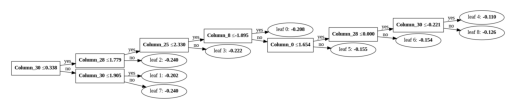

In [ ]:
lgb_model = y2_chain2_pipeline.named_steps['lgbm']
lgb.plot_tree(lgb_model, tree_index=0)
plt.show()

# **Post Hoc Analysis**

## **Analysis of Results**

In [ ]:
# Compute confusion matrices of LGBM
LGBM_cm1_train = confusion_matrix(y2_train, y2_train_pred)
LGBM_cm2_train = confusion_matrix(y2_train, y2_chain1_train_pred)
LGBM_cm3_train = confusion_matrix(y2_train, y2_chain2_train_pred)

LGBM_cm1_test = confusion_matrix(y2_test, y2_test_pred)
LGBM_cm2_test = confusion_matrix(y2_test, y2_chain1_test_pred)
LGBM_cm3_test = confusion_matrix(y2_test, y2_chain2_test_pred)

In [ ]:
# Assuming your ANN models output probabilities, convert them to class labels
ANN_pred1_train = np.argmax(model1.predict(X2_train_scaled), axis=1)
ANN_pred2_train = np.argmax(model3.predict(X_y2_train_onehot), axis=1)
ANN_pred3_train = np.argmax(model4.predict(X_y2_train), axis=1)

ANN_pred1_test = np.argmax(model1.predict(X2_test_scaled), axis=1)
ANN_pred2_test = np.argmax(model3.predict(X_y2_test_onehot), axis=1)
ANN_pred3_test = np.argmax(model4.predict(X_y2_test), axis=1)

# Compute confusion matrices of ANN with converted class labels
ANN_cm1_train = confusion_matrix(y2_train_target, ANN_pred1_train)
ANN_cm2_train = confusion_matrix(y2_train_target, ANN_pred2_train)
ANN_cm3_train = confusion_matrix(y2_train_target, ANN_pred3_train)

ANN_cm1_test = confusion_matrix(y2_test_target, ANN_pred1_test)
ANN_cm2_test = confusion_matrix(y2_test_target, ANN_pred2_test)
ANN_cm3_test = confusion_matrix(y2_test_target, ANN_pred3_test)

20/20 [==============================] - 0s 2ms/step


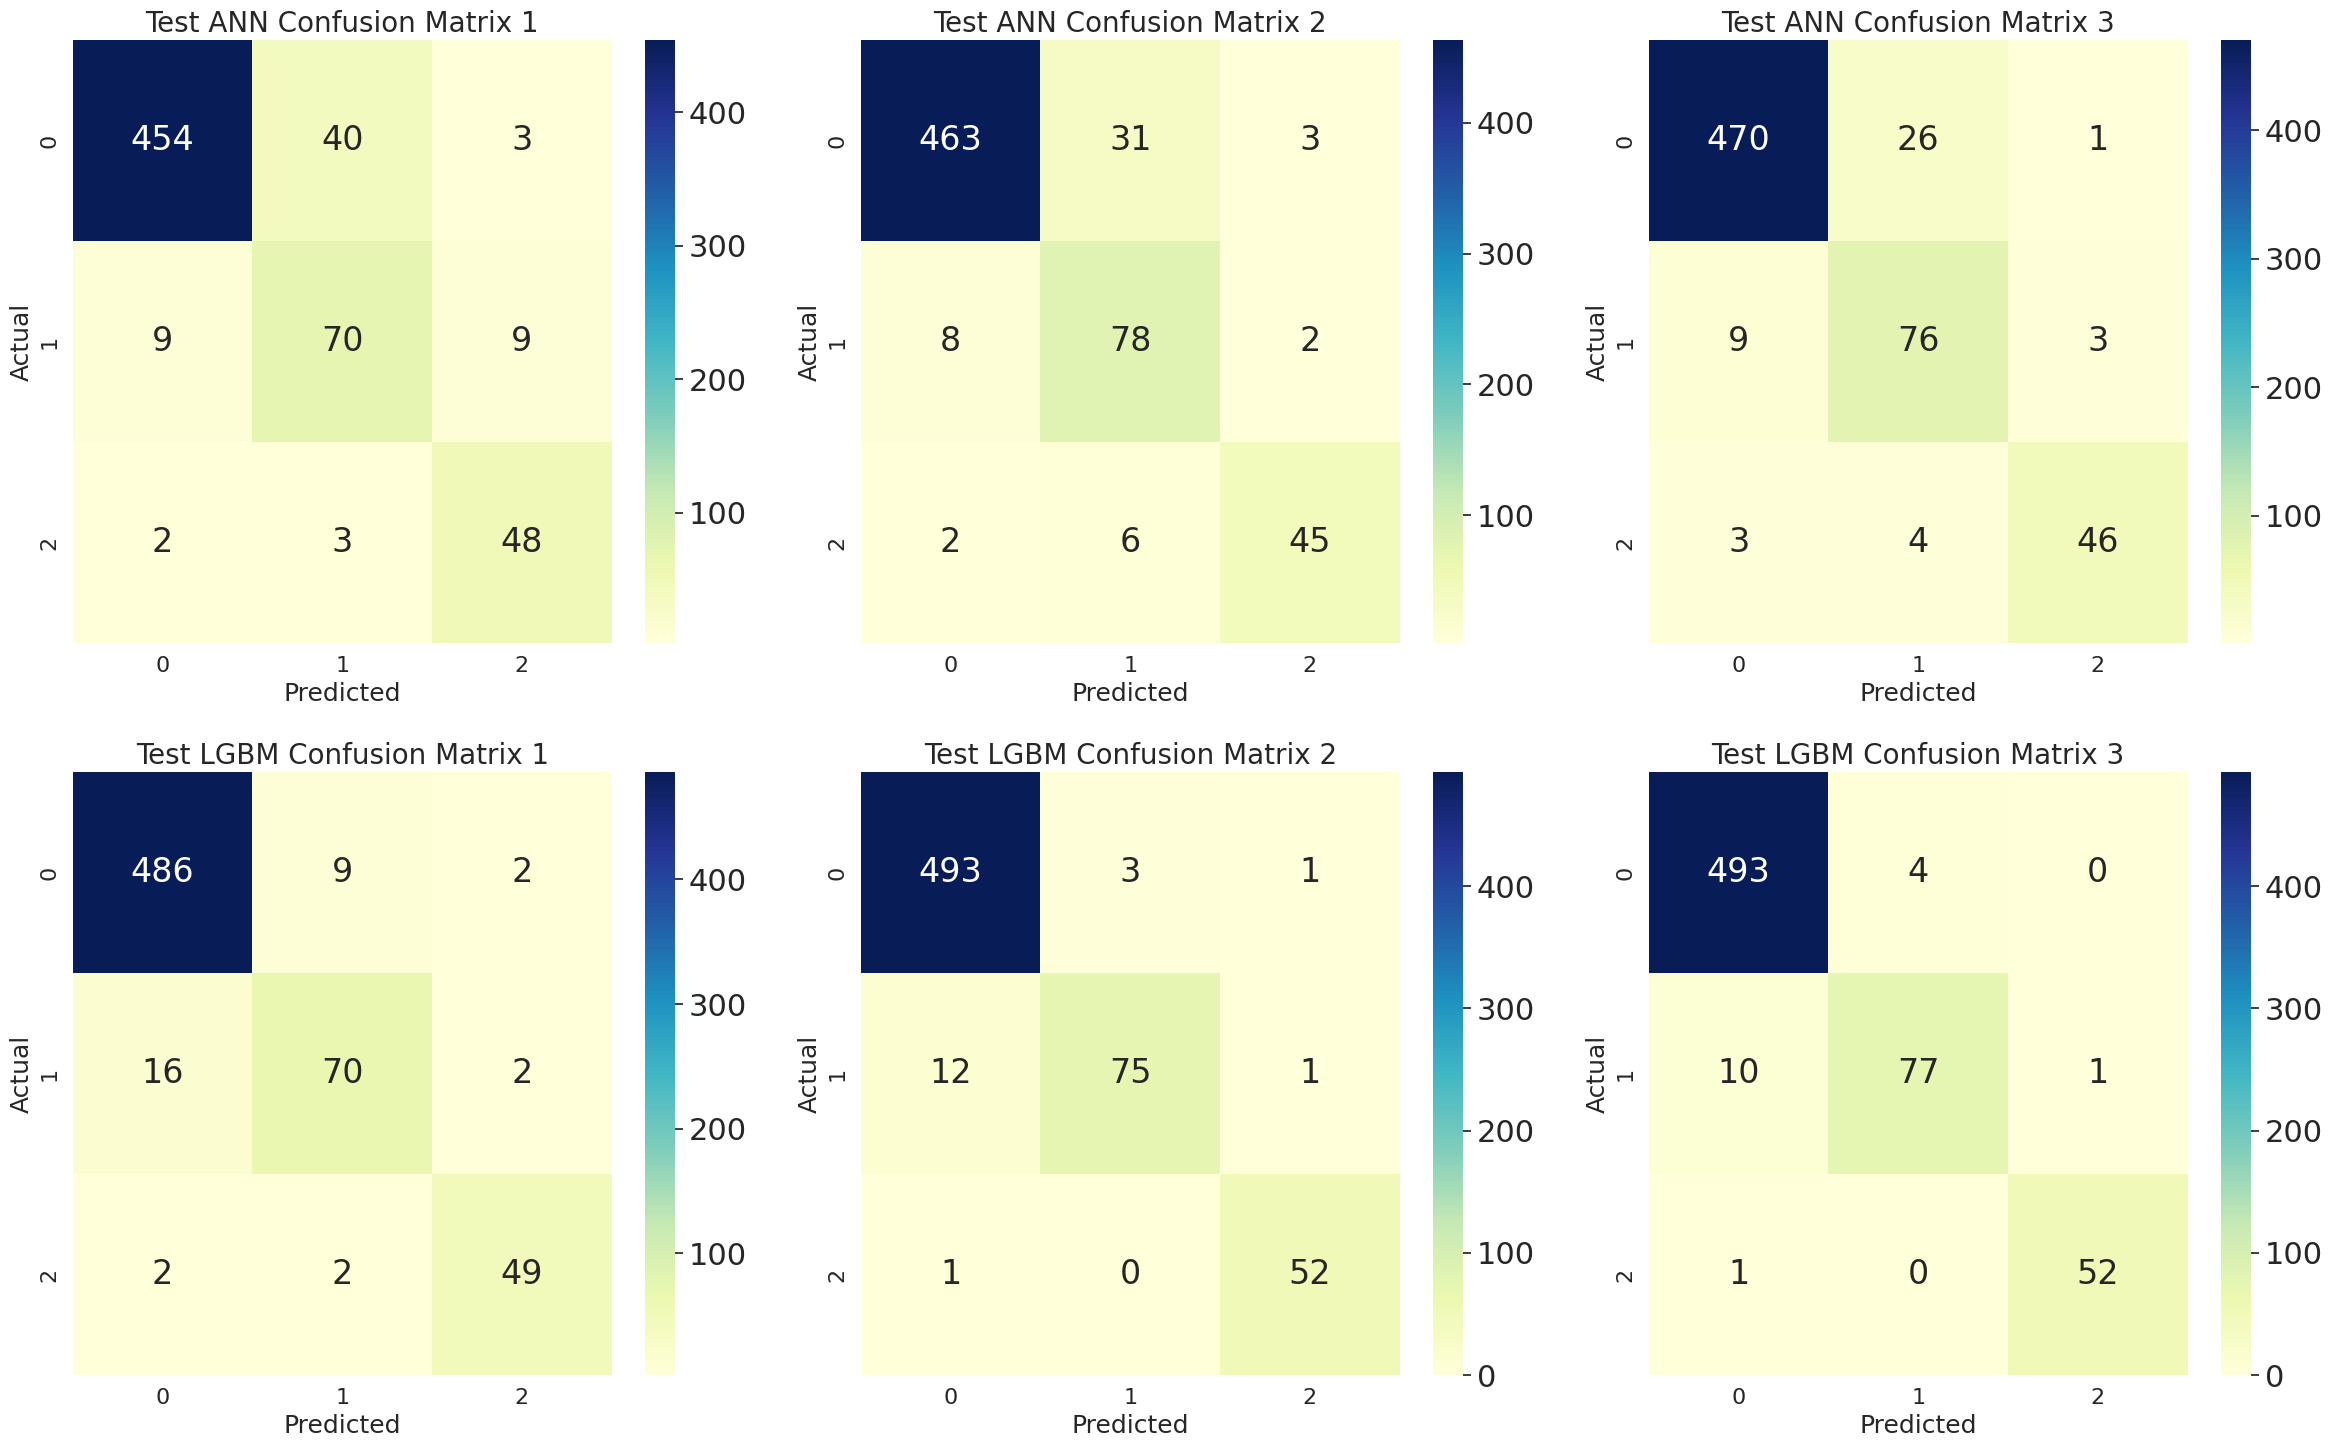

In [ ]:
# Create subplots for test confusion matrices
fig2, axes2 = plt.subplots(2, 3, figsize=(24, 15))

sns.set(font_scale=2.0)  # increase annotation font size

# Plot test ANN confusion matrix
sns.heatmap(ANN_cm1_test, annot=True, fmt="d", ax=axes2[0, 0], cmap="YlGnBu")
axes2[0, 0].set_title("Test ANN Confusion Matrix 1", fontsize=20)
axes2[0, 0].set_xlabel("Predicted", fontsize=18)
axes2[0, 0].set_ylabel("Actual", fontsize=18)
axes2[0, 0].tick_params(axis='both', which='major', labelsize=16)


sns.heatmap(ANN_cm2_test, annot=True, fmt="d", ax=axes2[0, 1], cmap="YlGnBu")
axes2[0, 1].set_title("Test ANN Confusion Matrix 2", fontsize=20)
axes2[0, 1].set_xlabel("Predicted", fontsize=18)
axes2[0, 1].set_ylabel("Actual", fontsize=18)
axes2[0, 1].tick_params(axis='both', which='major', labelsize=16)

sns.heatmap(ANN_cm3_test, annot=True, fmt="d", ax=axes2[0, 2], cmap="YlGnBu")
axes2[0, 2].set_title("Test ANN Confusion Matrix 3", fontsize=20)
axes2[0, 2].set_xlabel("Predicted", fontsize=18)
axes2[0, 2].set_ylabel("Actual", fontsize=18)
axes2[0, 2].tick_params(axis='both', which='major', labelsize=16)

sns.heatmap(LGBM_cm1_test, annot=True, fmt="d", ax=axes2[1, 0], cmap="YlGnBu")
axes2[1, 0].set_title("Test LGBM Confusion Matrix 1", fontsize=20)
axes2[1, 0].set_xlabel("Predicted", fontsize=18)
axes2[1, 0].set_ylabel("Actual", fontsize=18)
axes2[1, 0].tick_params(axis='both', which='major', labelsize=16)

sns.heatmap(LGBM_cm2_test, annot=True, fmt="d", ax=axes2[1, 1], cmap="YlGnBu")
axes2[1, 1].set_title("Test LGBM Confusion Matrix 2", fontsize=20)
axes2[1, 1].set_xlabel("Predicted", fontsize=18)
axes2[1, 1].set_ylabel("Actual", fontsize=18)
axes2[1, 1].tick_params(axis='both', which='major', labelsize=16)

sns.heatmap(LGBM_cm3_test, annot=True, fmt="d", ax=axes2[1, 2], cmap="YlGnBu")
axes2[1, 2].set_title("Test LGBM Confusion Matrix 3", fontsize=20)
axes2[1, 2].set_xlabel("Predicted", fontsize=18)
axes2[1, 2].set_ylabel("Actual", fontsize=18)
axes2[1, 2].tick_params(axis='both', which='major', labelsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score


# # List of models and their predictions
# models = {
#     'LGBM Independent': y2_test_pred,
#     'LGBM Chain OneHot': y2_chain1_test_pred,
#     'LGBM Chain Proba': y2_chain2_test_pred
# }


# # Initialize list to store results
# results = []


# y2_test_target

# # Iterate over models and calculate metrics
# for model_name, predictions in models.items():
#     accuracy = accuracy_score(y2_test, predictions)
#     weighted_f1 = f1_score(y2_test, predictions, average='weighted')

#     # Class-specific metrics
#     precision = precision_score(y2_test, predictions, average=None)
#     recall = recall_score(y2_test, predictions, average=None)
#     f1 = f1_score(y2_test, predictions, average=None)

#     results.append({'Scoring Category': 'Accuracy', 'Method': model_name, 'Score': accuracy})
#     results.append({'Scoring Category': 'Weighted F1', 'Method': model_name, 'Score': weighted_f1})

#     for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
#         results.append({'Scoring Category': f'Precision Class {i}', 'Method': model_name, 'Score': p})
#         results.append({'Scoring Category': f'Recall Class {i}', 'Method': model_name, 'Score': r})
#         results.append({'Scoring Category': f'F1 Class {i}', 'Method': model_name, 'Score': f})




# # List of models and their predictions
# models = {
#     'ANN Independent': ANN_pred1_test,
#     'ANN Chain OneHot': ANN_pred2_test,
#     'ANN Chain Proba': ANN_pred3_test
# }


# y2_test_target

# # Iterate over models and calculate metrics
# for model_name, predictions in models.items():
#     accuracy = accuracy_score(y2_test_target, predictions)
#     weighted_f1 = f1_score(y2_test_target, predictions, average='weighted')

#     # Class-specific metrics
#     precision = precision_score(y2_test_target, predictions, average=None)
#     recall = recall_score(y2_test_target, predictions, average=None)
#     f1 = f1_score(y2_test_target, predictions, average=None)

#     results.append({'Scoring Category': 'Accuracy', 'Method': model_name, 'Score': accuracy})
#     results.append({'Scoring Category': 'Weighted F1', 'Method': model_name, 'Score': weighted_f1})

#     for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
#         results.append({'Scoring Category': f'Precision Class {i}', 'Method': model_name, 'Score': p})
#         results.append({'Scoring Category': f'Recall Class {i}', 'Method': model_name, 'Score': r})
#         results.append({'Scoring Category': f'F1 Class {i}', 'Method': model_name, 'Score': f})


# # Convert results to DataFrame
# Results = pd.DataFrame(results)

# print(Results)


     Scoring Category            Method     Score
0            Accuracy  LGBM Independent  0.948276
1         Weighted F1  LGBM Independent  0.947493
2   Precision Class 0  LGBM Independent  0.964286
3      Recall Class 0  LGBM Independent  0.977867
4          F1 Class 0  LGBM Independent  0.971029
..                ...               ...       ...
61     Recall Class 1   ANN Chain Proba  0.863636
62         F1 Class 1   ANN Chain Proba  0.783505
63  Precision Class 2   ANN Chain Proba  0.920000
64     Recall Class 2   ANN Chain Proba  0.867925
65         F1 Class 2   ANN Chain Proba  0.893204

[66 rows x 3 columns]


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score


# List of models and their predictions
models = {
    'LGBM Independent': y2_test_pred,
    'LGBM Chain OneHot': y2_chain1_test_pred,
    'LGBM Chain Proba': y2_chain2_test_pred
}


# Initialize list to store results
results = []


y2_test_target

targets = ['Normal','Suspect','Pathologic']

# Iterate over models and calculate metrics
for model_name, predictions in models.items():
    accuracy = accuracy_score(y2_test, predictions)
    weighted_f1 = f1_score(y2_test, predictions, average='weighted')

    # Class-specific metrics
    # precision = precision_score(y2_test, predictions, average=None)
    recall = recall_score(y2_test, predictions, average=None)
    # f1 = f1_score(y2_test, predictions, average=None)

    results.append({'Scoring Category': 'Accuracy', 'Method': model_name, 'Score': accuracy})
    results.append({'Scoring Category': 'Weighted F1', 'Method': model_name, 'Score': weighted_f1})

    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        results.append({'Scoring Category': f'Recall Class {targets[i]}', 'Method': model_name, 'Score': r})

# List of models and their predictions
models = {
    'ANN Independent': ANN_pred1_test,
    'ANN Chain OneHot': ANN_pred2_test,
    'ANN Chain Proba': ANN_pred3_test
}


y2_test_target

# Iterate over models and calculate metrics
for model_name, predictions in models.items():
    accuracy = accuracy_score(y2_test_target, predictions)
    weighted_f1 = f1_score(y2_test_target, predictions, average='weighted')

    # Class-specific metrics
    # precision = precision_score(y2_test_target, predictions, average=None)
    recall = recall_score(y2_test_target, predictions, average=None)
    # f1 = f1_score(y2_test_target, predictions, average=None)

    results.append({'Scoring Category': 'Accuracy', 'Method': model_name, 'Score': accuracy})
    results.append({'Scoring Category': 'Weighted F1', 'Method': model_name, 'Score': weighted_f1})

    for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
        # results.append({'Scoring Category': f'Precision Class {i}', 'Method': model_name, 'Score': p})
        results.append({'Scoring Category': f'Recall Class {targets[i]}', 'Method': model_name, 'Score': r})
        # results.append({'Scoring Category': f'F1 Class {i}', 'Method': model_name, 'Score': f})


# Convert results to DataFrame
Results = pd.DataFrame(results)

print(Results)


           Scoring Category             Method     Score
0                  Accuracy   LGBM Independent  0.948276
1               Weighted F1   LGBM Independent  0.947493
2       Recall Class Normal   LGBM Independent  0.977867
3      Recall Class Suspect   LGBM Independent  0.795455
4   Recall Class Pathologic   LGBM Independent  0.924528
5                  Accuracy  LGBM Chain OneHot  0.971787
6               Weighted F1  LGBM Chain OneHot  0.971173
7       Recall Class Normal  LGBM Chain OneHot  0.991952
8      Recall Class Suspect  LGBM Chain OneHot  0.852273
9   Recall Class Pathologic  LGBM Chain OneHot  0.981132
10                 Accuracy   LGBM Chain Proba  0.974922
11              Weighted F1   LGBM Chain Proba  0.974517
12      Recall Class Normal   LGBM Chain Proba  0.991952
13     Recall Class Suspect   LGBM Chain Proba  0.875000
14  Recall Class Pathologic   LGBM Chain Proba  0.981132
15                 Accuracy    ANN Independent  0.896552
16              Weighted F1    

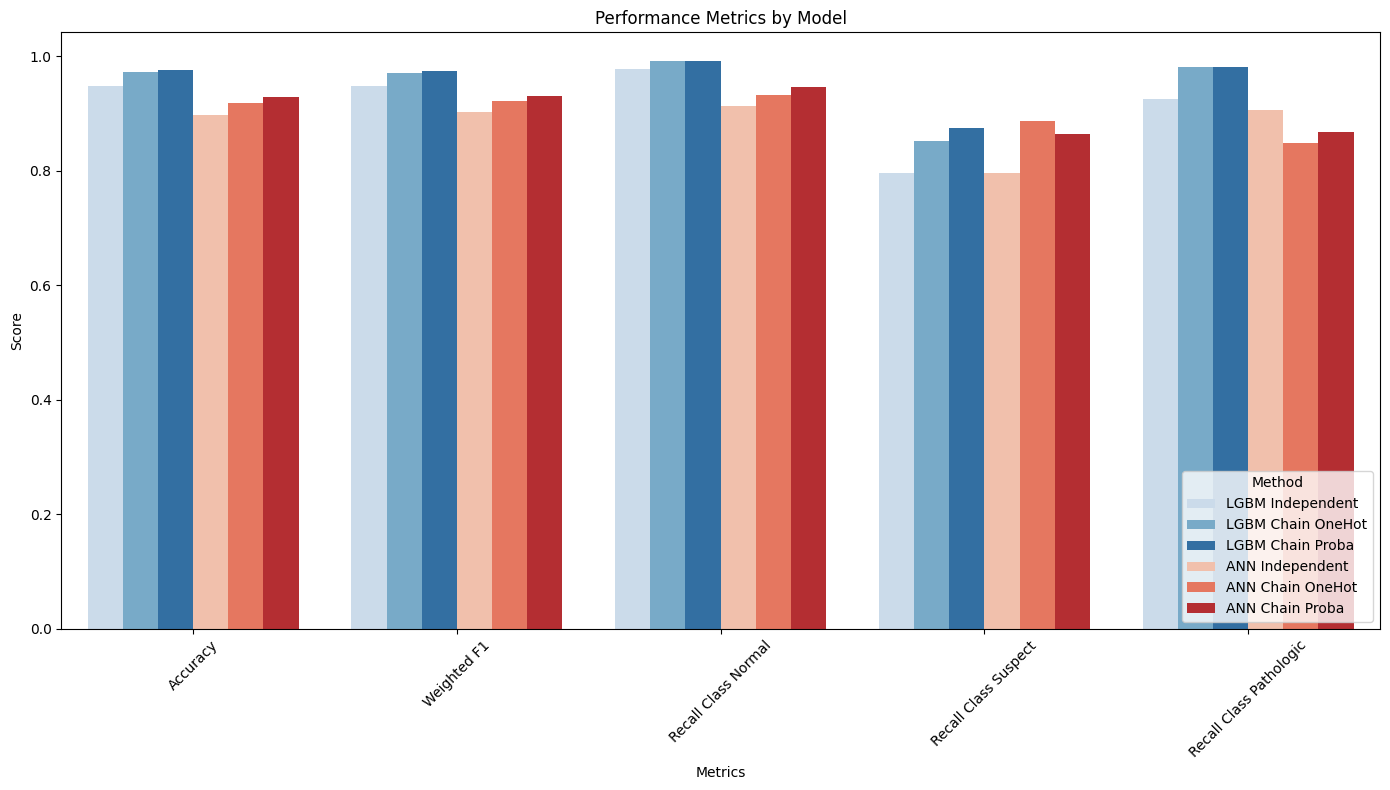

           Scoring Category             Method     Score
0                  Accuracy   LGBM Independent  0.948276
1               Weighted F1   LGBM Independent  0.947493
2       Recall Class Normal   LGBM Independent  0.977867
3      Recall Class Suspect   LGBM Independent  0.795455
4   Recall Class Pathologic   LGBM Independent  0.924528
5                  Accuracy  LGBM Chain OneHot  0.971787
6               Weighted F1  LGBM Chain OneHot  0.971173
7       Recall Class Normal  LGBM Chain OneHot  0.991952
8      Recall Class Suspect  LGBM Chain OneHot  0.852273
9   Recall Class Pathologic  LGBM Chain OneHot  0.981132
10                 Accuracy   LGBM Chain Proba  0.974922
11              Weighted F1   LGBM Chain Proba  0.974517
12      Recall Class Normal   LGBM Chain Proba  0.991952
13     Recall Class Suspect   LGBM Chain Proba  0.875000
14  Recall Class Pathologic   LGBM Chain Proba  0.981132
15                 Accuracy    ANN Independent  0.896552
16              Weighted F1    

In [ ]:
import seaborn as sns

# Define custom colors
base_color_1 = sns.color_palette("Blues", 3)  # First group colors
base_color_2 = sns.color_palette("Reds", 3)   # Second group colors
custom_colors = base_color_1 + base_color_2

# Plot the grouped bar chart with custom colors
def plot_custom_grouped_bar_chart(df, x, y, hue, title, xlabel, ylabel):
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=df, x=x, y=y, hue=hue, palette=custom_colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=hue, loc="lower right")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot the chart
plot_custom_grouped_bar_chart(
    Results,
    x='Scoring Category',
    y='Score',
    hue='Method',
    title='Performance Metrics by Model',
    xlabel='Metrics',
    ylabel='Score'
)

print(Results)


## **Permutation Importance Analysis**

In [ ]:
!pip install ucimlrepo

In [ ]:
#Get row headers
from ucimlrepo import fetch_ucirepo
cardiotocography = fetch_ucirepo(id=193)
hdr = cardiotocography.data.headers[:-2]
print(hdr.shape)
print(hdr)

(21,)
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency'],
      dtype='object')


In [ ]:
from sklearn.inspection import permutation_importance

y2_perm_imp = permutation_importance(y2_pipeline, X2_test, y2_test, n_repeats=100, random_state=42)
X2y1proba_perm_imp = permutation_importance(y2_chain2_pipeline, X2y1proba_test, y2_test, n_repeats=100, random_state=42)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Curren

In [ ]:
addtl_hdr = ['1','2','3','4','5','6','7','8','9','10']

hdr2 = hdr.to_list()+addtl_hdr

hdr2 = pd.Index(hdr2)

# .append(addtl_hdr)

print(hdr2)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10'],
      dtype='object')


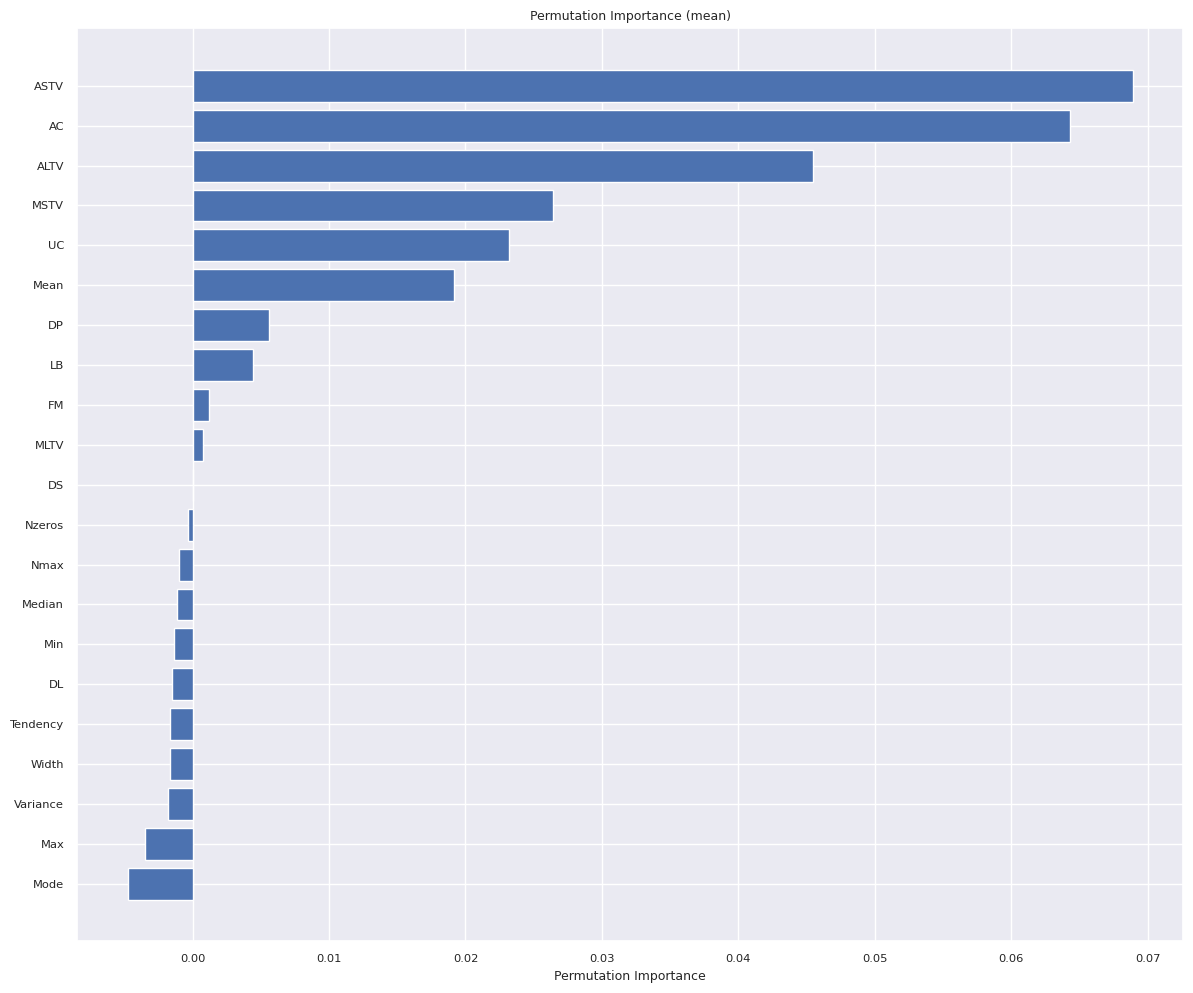

In [ ]:
# Create a figure and subplots
fig, ax2 = plt.subplots(1, 1, figsize=(12, 10))  # 2 rows, 1 column

sns.set(font_scale=.750)  # increase annotation font size

# Plot permutation importance
sorted_idx = y2_perm_imp.importances_mean.argsort()
ax2.barh(hdr[sorted_idx], y2_perm_imp.importances_mean[sorted_idx])


# Adjust layout

plt.xlabel("Permutation Importance")
plt.title("Permutation Importance (mean)")

plt.tight_layout()

# Show the plot
plt.show()

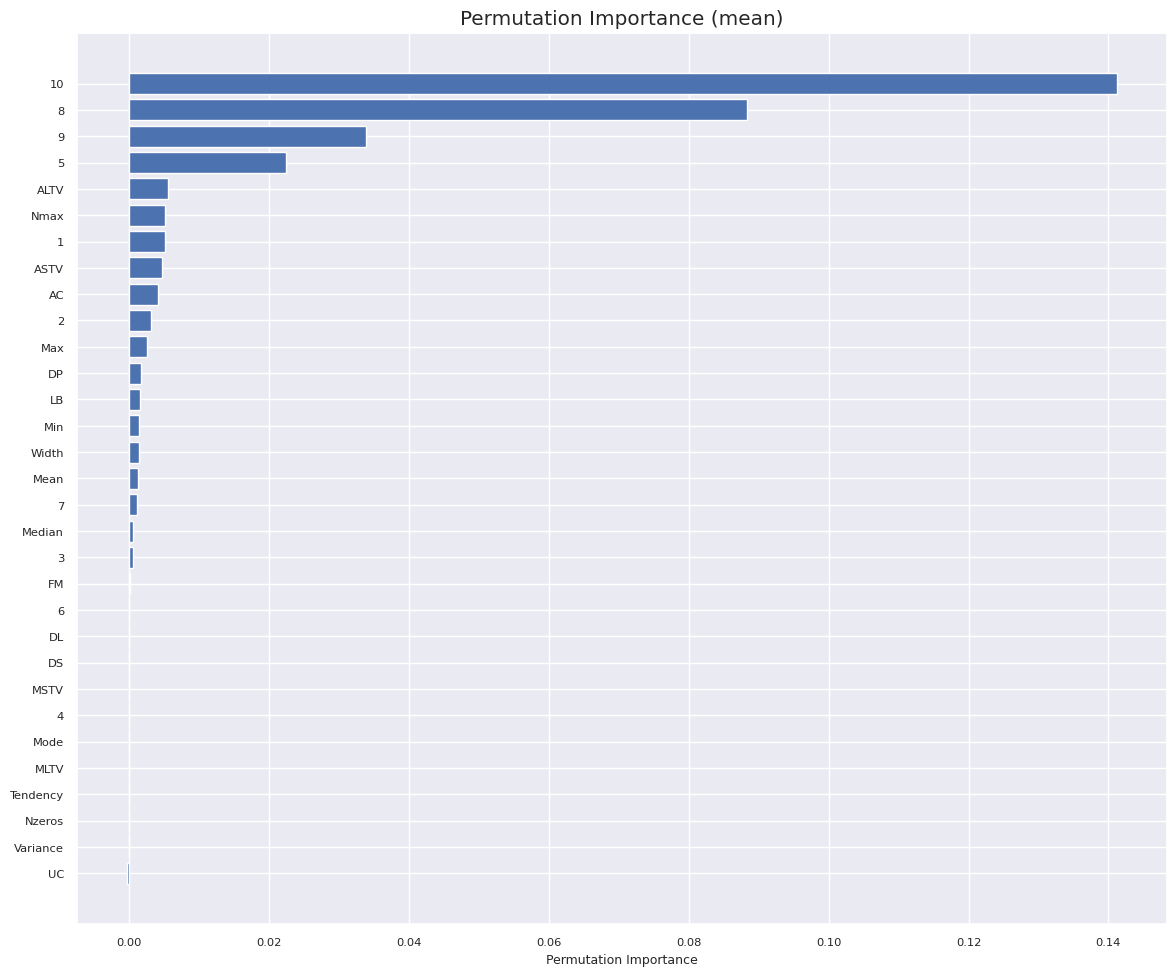

In [ ]:
# Create a figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(12, 10))  # 2 rows, 1 column

sns.set(font_scale=1.20)
# Plot permutation importance
sorted_idx = X2y1proba_perm_imp.importances_mean.argsort()
ax1.barh(hdr2[sorted_idx], X2y1proba_perm_imp.importances_mean[sorted_idx])


# Adjust layout

plt.xlabel("Permutation Importance")
plt.title("Permutation Importance (mean)")

plt.tight_layout()

# Show the plot
plt.show()